In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
mpl.rcParams

['/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-f6d1a/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/srv/dask/lib', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/lib-dynload', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/IPython/extensions', '/scratch/malvesga

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

#norm_to_1fb = True
norm_to_1fb = False

lepton_type = 'muon'
#lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

plot_separate_syst_uncertainties = False

save_figures = False

bkg_MC_mix_protons = False

# run_tables = False

{'muon': {'2017B': 4.799881474, '2017C1': 5.785813941, '2017C2': 3.786684323, '2017D': 4.247682053, '2017E': 9.312832062, '2017F1': 1.738905587, '2017F2': 8.125575961, '2017F3': 3.674404546}, 'electron': {'2017B': 4.594096155565198, '2017C1': 5.521298099245362, '2017C2': 3.6135646891210857, '2017D': 4.0518639103567, '2017E': 8.906848461089172, '2017F1': 1.6584516422062712, '2017F2': 7.749629938012412, '2017F3': 3.504400870870218}}
Luminosity 2017 muon: 41.471779946999995
Luminosity 2017 electron: 39.60015376646642
{'muon': {'2018A': 12.103512482, '2018B1': 6.3798061, '2018B2': 0.40141386, '2018C': 6.524227381, '2018D1': 19.877577, '2018D2': 10.414449}, 'electron': {'2018A': 12.103189833, '2018B1': 6.379806, '2018B2': 0.40141386, '2018C': 6.527251329, '2018D1': 19.876804, '2018D2': 10.414449}}
Luminosity 2018 muon: 55.700985822999996
Luminosity 2018 electron: 55.702914022


### Event selection

In [3]:
def tau21_ddt_calculation(df, lepton_type, label_jet=None):
    
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    jet0_tau21_ = ( df.loc[ :, "jet0_tau2"] / df.loc[ :, "jet0_tau1"] )
    
    M_ = 0. ##M is the slope of the tau21 versus rhoprime1
    rhoprime1_ = np.log((((df.loc[ :, "jet0_corrmass" + label_jet_])**2)/(df.loc[ :, "jet0_pt" + label_jet_])))
    if lepton_type == 'muon':
        #M_ = -0.06549078537121121 
        M_ = -0.06985584011450555
    if lepton_type == 'electron':
        #M_ = -0.05984253738963618    
        M_ = -0.057877831836395534   
    jet0_tau21_ddt_ = jet0_tau21_ - (M_*rhoprime1_)
    
    return jet0_tau21_, rhoprime1_, jet0_tau21_ddt_

In [4]:
def select_events( df_events, lepton_type, max_num_tracks = 4, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi
    
    jet0_tau21_, rhoprime1_, jet0_tau21_ddt_ = tau21_ddt_calculation( df_events, lepton_type )
    
    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    if lepton_type == 'muon':
        msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    elif lepton_type == 'electron':
        msk_met_ = ( df_events.loc[ :, "met"] >= 100.0 )  
    
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )

    msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
                         ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )

    msk_tau21_       = ( jet0_tau21_ddt_ <= 0.7 )
#     msk_tau21_       = ( jet0_tau21_ <= 0.6 )
    
    
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) ) #& 
                         #( df_events.loc[ :, "R_MWW_MX" + label_xiCMS_ ] >= 0.80 ) & ( np.abs( df_events.loc[ :, "Diff_YWW_YX" + label_xiCMS_ ] <= 0.60 ) ) )
    
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )
    
    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )

    msk_nprotons_ = ( ( df_events.loc[ :, "nprotons_arm0" ] <= 3 ) & ( df_events.loc[ :, "nprotons_arm1" ] <= 3 ) )
    
    masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
               msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_, msk_nprotons_ ]
    
#     masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
#                msk_pruned_mass_, msk_bjet_veto_, msk_xiCMS_,
#                msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_, msk_nprotons_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
                        "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks", "NProtons" ]
    
#     selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
#                         "PrunedMass", "BJet_Veto", "Xi_CMS",
#                         "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks", "NProtons" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Signal

In [5]:
load_signal = True

labels_signals = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
#         labels_signals = [ "GGToWW-AQGC-muon-A0W1e-6", "GGToWW-AQGC-muon-A0W2e-6", "GGToWW-AQGC-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-muon-A0W1e-6", "GGToWW-AQGC-2017-muon-A0W2e-6", "GGToWW-AQGC-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-electron-A0W1e-6", "GGToWW-AQGC-electron-A0W2e-6", "GGToWW-AQGC-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-electron-A0W1e-6", "GGToWW-AQGC-2017-electron-A0W2e-6", "GGToWW-AQGC-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-2018-muon-A0W5e-7", "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-2018-electron-A0W5e-7", "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
    
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
if load_signal:
#     base_path_ = "output"
    base_path_ = "output_19-06"
    #base_path_ = "output_new"
    for label_ in labels_signals:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )           
            df_counts_signals[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [6]:
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ].columns.values
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ][ ['pileupWeight','xi','random','arm','ismultirp', 'eff_proton_all'] ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2018-electron-A0W1e-6'
df_signals_protons_multiRP_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    55        548   10111487040465804063 0              147.0       0.4   
    60        593   11479252221660711580 0              144.0       0.4   
...                                                       ...       ...   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9932      99320 8072610517918790459  0              130.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0           0.0  236.454941   
    25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    55        548   10111487040465804063 0           0.0  211.374191   
    60        593   11479252221660711580 0           0.0  225.833420   
...                                                  ...         ...   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9932      99320 8072610517918790459  0           0.0  396.427917   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0     -0.605854 -0.769534   
    25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    55        548   10111487040465804063 0     -1.255503 -2.017078   
    60        593   11479252221660711580 0      1.460313  1.167191   
...                                                  ...       ...   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9932      99320 8072610517918790459  0      0.270221  1.273853   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0       291.459412   71.138802   
    25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    55        548   10111487040465804063 0       404.987579   10.673149   
    60        593   11479252221660711580 0       520.812378   82.395920   
...                                                     ...         ...   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9932      99320 8072610517918790459  0       425.057953   76.337906   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   10        98    11108945275985346800 0          76.202141   0.250948  ...   
    2

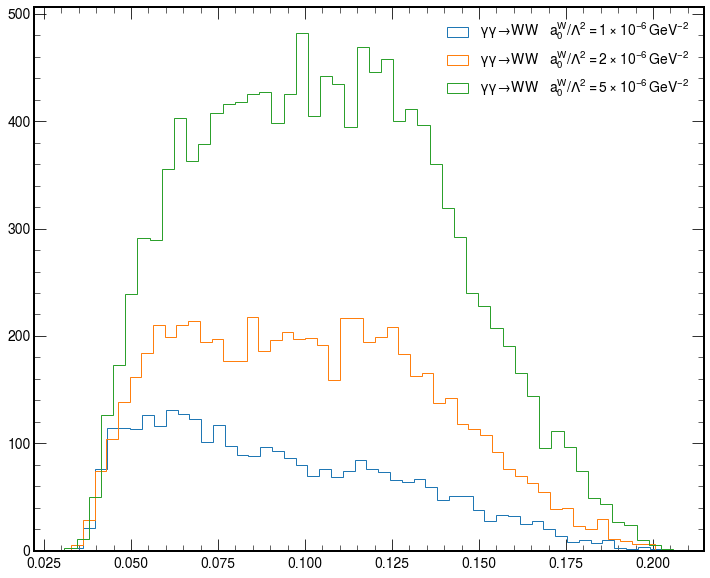

In [7]:
labels_samples = {
    "GGToWW-AQGC-A0W5e-7": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-7} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}
labels_samples[ "GGToWW-AQGC-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

if load_signal:
    fig = plt.figure( figsize=(12,10) )
    for label_ in labels_signals: 
        plt.hist( df_signals_protons_multiRP_index[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
    plt.legend( loc='best', fontsize=14 )

In [8]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_events[ label_ ], lepton_type)
    print(jet0_tau21)
    df_signals_protons_multiRP_events[ label_ ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_events[ label_ ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    10         98     11108945275985346800  0        0.381254
     25         246    6732049695921593490   0        0.535855
     48         473    8749266920161569861   0        0.783188
     55         548    10111487040465804063  0        0.727052
     60         593    11479252221660711580  0        0.251434
                                                        ...   
     9921       99203  4631958745543777280   0        0.420730
     9932       99320  8072610517918790459   0        0.507713
     9958       99577  8240557362429832909   0        0.154599
     9967       99661  9457232060636232257   0        0.464635
     9999       99982  2401133407686114619   0        0.744811
Length: 656, dtype: float32
run  lumiblock  event  hash_id               slice
1    1          1      6025467297070359873   0        0.427520
     9          83     9682424406092831890   0        0.405102
     36         352    11063565833745523790  0     

### Ouf of acceptance protons

### Signal with pileup/data protons

In [9]:
labels_signals_mix_protons = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
df_counts_signals_mix_protons = {}
df_signals_protons_multiRP_mix_protons_index = {}
df_signals_protons_multiRP_mix_protons_events = {}
if load_signal:
#     base_path_ = "output"
    base_path_ = "output_19-06"
    #base_path_ = "output_new"
    for label_ in labels_signals_mix_protons:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [10]:
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_index[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6'
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   23        225   16117075621652718218 0              135.0       0.4   
    29        288   18054212537147359308 0              136.0       0.4   
    124       1237  11341540916269789665 0              135.0       0.4   
    1171      11705 15101903612985965066 0              138.0       0.4   
    1229      12288 14208905075143831460 0              136.0       0.4   
...                                                       ...       ...   
    9402      94017 10221819517804654206 0              152.0       0.4   
    9441      94402 8899934964589349827  0              152.0       0.4   
    9770      97700 5716820381342743681  0              150.0       0.4   
    9841      98405 14595287732367557387 0              152.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   23        225   16117075621652718218 0           0.0   224.395172   
    29        288   18054212537147359308 0           0.0   600.643005   
    124       1237  11341540916269789665 0           0.0   305.686859   
    1171      11705 15101903612985965066 0           0.0   970.521362   
    1229      12288 14208905075143831460 0           0.0   361.927490   
...                                                  ...          ...   
    9402      94017 10221819517804654206 0           0.0   408.605743   
    9441      94402 8899934964589349827  0           0.0  1090.305420   
    9770      97700 5716820381342743681  0           0.0   589.358276   
    9841      98405 14595287732367557387 0           0.0   948.215515   
    9958      99577 8240557362429832909  0           0.0   504.915619   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   23        225   16117075621652718218 0      0.522624  1.827582   
    29        288   18054212537147359308 0     -1.163432  1.592878   
    124       1237  11341540916269789665 0     -1.242432 -1.548884   
    1171      11705 15101903612985965066 0     -0.139592 -2.487285   
    1229      12288 14208905075143831460 0     -1.151652  1.357224   
...                                                  ...       ...   
    9402      94017 10221819517804654206 0      0.339534 -0.069974   
    9441      94402 8899934964589349827  0      0.086002 -1.042168   
    9770      97700 5716820381342743681  0     -1.445047 -0.045028   
    9841      98405 14595287732367557387 0     -0.464048  0.318042   
    9958      99577 8240557362429832909  0      0.494322  0.503134   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   23        225   16117075621652718218 0       274.283295  75.488983   
    29        288   18054212537147359308 0      1062.808228  71.336639   
    124       1237  11341540916269789665 0       583.895569  85.282921   
    1171      11705 15101903612985965066 0       985.998718  40.548241   
    1229      12288 14208905075143831460 0       636.761780  70.415459   
...                                                     ...        ...   
    9402      94017 10221819517804654206 0       445.485474  84.636322   
    9441      94402 8899934964589349827  0      1104.276733  80.021210   
    9770      97700 5716820381342743681  0      1324.873657  76.667091   
    9841      98405 14595287732367557387 0      1065.339722  80.890800   
    9958      99577 8240557362429832909  0       574.826660  68.721405   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   23        225   16117075621652718218 0          80.707939   0.403162  ...   
    2

In [11]:
for label_ in labels_signals_mix_protons:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_mix_protons_events[ label_ ], lepton_type)
    print(jet0_tau21)
    df_signals_protons_multiRP_mix_protons_events[ label_ ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_mix_protons_events[ label_ ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    23         225    16117075621652718218  0        0.264766
     29         288    18054212537147359308  0        0.502703
     124        1237   11341540916269789665  0        0.308037
     1171       11705  15101903612985965066  0        0.545233
     1229       12288  14208905075143831460  0        0.292755
                                                        ...   
     9402       94017  10221819517804654206  0        0.600003
     9441       94402  8899934964589349827   0        0.481488
     9770       97700  5716820381342743681   0        0.535868
     9841       98405  14595287732367557387  0        0.352631
     9958       99577  8240557362429832909   0        0.154599
Length: 849, dtype: float32
run  lumiblock  event  hash_id               slice
1    73         724    15526263596175512943  0        0.416793
     81         805    18434070272466401557  0        0.455220
     1005       10045  10220519577270607620  0     

### Signal with event mixing (signal and pileup protons)

In [12]:
df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_events_categories = {}
# base_path_ = "output"
base_path_ = "output_19-06"
#base_path_ = "output_new"
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-signal-plus-mix-events-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            print ( key_ )
            df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
            df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-2018-muon-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


In [13]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
# columns__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values
# columns_electron__ = columns__[ [ key_.find( "electron" ) >= 0 for key_ in columns__ ] ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ columns_electron__ ]
df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   12        111   14940096560224219535 0              137.0       0.4   
    23        225   16117075621652718218 0              135.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    29        288   18054212537147359308 0              136.0       0.4   
    37        370   10692117927175392854 0              148.0       0.4   
...                                                       ...       ...   
    9965      99649 12600364760128522343 0              144.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
              99666 12762805257830093162 0              155.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   12        111   14940096560224219535 0           0.0  969.150513   
    23        225   16117075621652718218 0           0.0  224.395172   
    25        246   6732049695921593490  0           0.0  569.114075   
    29        288   18054212537147359308 0           0.0  600.643005   
    37        370   10692117927175392854 0           0.0  595.387756   
...                                                  ...         ...   
    9965      99649 12600364760128522343 0           0.0  210.314880   
    9967      99661 9457232060636232257  0           0.0  292.841248   
              99666 12762805257830093162 0           0.0  607.864502   
    9997      99969 7562332171816749490  0           0.0  664.096069   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   12        111   14940096560224219535 0      0.370003 -1.598713   
    23        225   16117075621652718218 0      0.522624  1.827582   
    25        246   6732049695921593490  0      1.052705  2.353809   
    29        288   18054212537147359308 0     -1.163432  1.592878   
    37        370   10692117927175392854 0      0.868450  1.677564   
...                                                  ...       ...   
    9965      99649 12600364760128522343 0     -0.006899 -3.099224   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
              99666 12762805257830093162 0     -0.316360  0.524719   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   12        111   14940096560224219535 0      1044.282837   73.893799   
    23        225   16117075621652718218 0       274.283295   75.488983   
    25        246   6732049695921593490  0       927.567322  103.537247   
    29        288   18054212537147359308 0      1062.808228   71.336639   
    37        370   10692117927175392854 0       843.323303   71.869919   
...                                                     ...         ...   
    9965      99649 12600364760128522343 0       218.505249   51.212227   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
              99666 12762805257830093162 0       645.346863   66.479370   
    9997      99969 7562332171816749490  0       888.332031   71.488083   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   12        111   14940096560224219535 0          78.452606   0.099928  ...   
    2

In [14]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ], lepton_type)
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    12         111    14940096560224219535  0        0.396965
     23         225    16117075621652718218  0        0.264766
     25         246    6732049695921593490   0        0.535855
     29         288    18054212537147359308  0        0.502703
     37         370    10692117927175392854  0        0.626381
                                                        ...   
     9965       99649  12600364760128522343  0        0.457332
     9967       99661  9457232060636232257   0        0.464635
                99666  12762805257830093162  0        0.310159
     9997       99969  7562332171816749490   0        0.270275
     9999       99982  2401133407686114619   0        0.744811
Length: 1566, dtype: float32
run  lumiblock  event  hash_id               slice
1    1          1      6025467297070359873   0        0.427520
                6      10609183141893179091  0        0.324167
     2          11     1599534692892089245   0    

In [15]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ], lepton_type)
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    25         246    6732049695921593490   0        0.535855
     48         473    8749266920161569861   0        0.783188
     64         636    1889158458402674605   0        0.328845
     71         706    10284919335476110625  0        0.466170
     77         762    898270863651217580    0        0.676442
                                                        ...   
     9917       99167  7037532472275048024   0        0.416577
     9921       99203  4631958745543777280   0        0.420730
     9958       99577  8240557362429832909   0        0.154599
     9967       99661  9457232060636232257   0        0.464635
     9999       99982  2401133407686114619   0        0.744811
Length: 411, dtype: float32
run  lumiblock  event  hash_id               slice
1    1          1      6025467297070359873   0        0.427520
     36         352    11063565833745523790  0        0.787095
     47         464    10906853598427727415  0     

In [16]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         1     6025467297070359873  0              152.0       0.4   
              5     17914030557506065524 0              152.0       0.4   
    2         11    14339887669900922026 0              152.0       0.4   
    10        94    5614015831340831688  0              130.0       0.4   
    15        147   4227373173570343758  0              131.0       0.4   
...                                                       ...       ...   
    9982      99815 14679017106024212832 0              150.0       0.4   
    9983      99829 15996250320384990619 0              150.0       0.4   
    9988      99877 5231953877877861726  0              131.0       0.4   
    9997      99961 3971670346507210725  0              152.0       0.4   
    9998      99980 901970392954609542   0              130.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   1         1     6025467297070359873  0           0.0  539.313782   
              5     17914030557506065524 0           0.0  556.002380   
    2         11    14339887669900922026 0           0.0  748.580688   
    10        94    5614015831340831688  0           0.0  614.761841   
    15        147   4227373173570343758  0           0.0  308.504089   
...                                                  ...         ...   
    9982      99815 14679017106024212832 0           0.0  343.350494   
    9983      99829 15996250320384990619 0           0.0  519.210144   
    9988      99877 5231953877877861726  0           0.0  345.757507   
    9997      99961 3971670346507210725  0           0.0  409.752472   
    9998      99980 901970392954609542   0           0.0  479.305237   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         1     6025467297070359873  0      0.511294 -2.601843   
              5     17914030557506065524 0      0.795675  1.186237   
    2         11    14339887669900922026 0     -0.386914  1.900301   
    10        94    5614015831340831688  0     -0.458296 -0.819831   
    15        147   4227373173570343758  0     -1.421553 -3.136043   
...                                                  ...       ...   
    9982      99815 14679017106024212832 0      1.071831 -2.593346   
    9983      99829 15996250320384990619 0      0.928095  2.721429   
    9988      99877 5231953877877861726  0     -0.358238  2.119616   
    9997      99961 3971670346507210725  0      0.919408 -2.444236   
    9998      99980 901970392954609542   0     -0.130415 -2.532144   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   1         1     6025467297070359873  0       622.202393   82.876419   
              5     17914030557506065524 0       749.874329   80.319191   
    2         11    14339887669900922026 0       811.269897   76.375458   
    10        94    5614015831340831688  0       689.578186   72.975319   
    15        147   4227373173570343758  0       679.683167   18.943466   
...                                                     ...         ...   
    9982      99815 14679017106024212832 0       569.053650   66.718567   
    9983      99829 15996250320384990619 0       767.582214   76.323929   
    9988      99877 5231953877877861726  0       373.465637    9.578989   
    9997      99961 3971670346507210725  0       604.256409   74.262604   
    9998      99980 901970392954609542   0       499.754211  106.943733   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         1     6025467297070359873  0          88.576218   0.195883  ...   
     

In [17]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ], lepton_type)
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    55         548    10111487040465804063  0        0.727052
     102        1012   3261322430295409192   0        0.261514
     176        1753   6574637482246563246   0        0.431415
     206        2056   3471706120662577493   0        0.673657
     246        2458   9693195791745234741   0        0.497397
                                                        ...   
     9852       98516  3331970026829399013   0        0.755357
     9870       98693  12293205995114717539  0        0.815296
     9873       98726  5549407172083963592   0        0.684028
     9876       98759  5155927611239620215   0        0.410818
     9965       99649  12600364760128522343  0        0.457332
Length: 308, dtype: float32
run  lumiblock  event  hash_id               slice
1    2          11     1599534692892089245   0        0.217395
     17         168    7169832593342699966   0        0.501843
     22         217    11022842247057889934  0     

In [18]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         8     2622332326560339455  0              152.0       0.4   
    8         72    16121576129804024315 0              130.0       0.4   
    14        132   13666057879713431447 0              153.0       0.4   
              138   17352706423929806798 0              153.0       0.4   
    18        177   683558136969847291   0              131.0       0.4   
...                                                       ...       ...   
    9962      99616 11946281847938898299 0              144.0       0.4   
    9968      99680 17631400360546717515 0              140.0       0.4   
    9969      99688 12025701201764481843 0              130.0       0.4   
    9990      99896 12762955129906661053 0              130.0       0.4   
    9993      99923 8645810709966289029  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   1         8     2622332326560339455  0           0.0  874.190308   
    8         72    16121576129804024315 0           0.0  566.358704   
    14        132   13666057879713431447 0           0.0  525.797180   
              138   17352706423929806798 0           0.0  772.665771   
    18        177   683558136969847291   0           0.0  540.825989   
...                                                  ...         ...   
    9962      99616 11946281847938898299 0           0.0  677.172180   
    9968      99680 17631400360546717515 0           0.0  503.506317   
    9969      99688 12025701201764481843 0           0.0  356.583710   
    9990      99896 12762955129906661053 0           0.0  724.536194   
    9993      99923 8645810709966289029  0           0.0  629.822754   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         8     2622332326560339455  0      0.290269 -2.929739   
    8         72    16121576129804024315 0     -0.249886 -0.127141   
    14        132   13666057879713431447 0     -1.054925  2.816919   
              138   17352706423929806798 0      0.705973  2.530859   
    18        177   683558136969847291   0      0.415272  1.675895   
...                                                  ...       ...   
    9962      99616 11946281847938898299 0      0.894600  1.191533   
    9968      99680 17631400360546717515 0     -0.123415  2.982986   
    9969      99688 12025701201764481843 0      1.133827  0.209728   
    9990      99896 12762955129906661053 0     -0.793500 -1.626442   
    9993      99923 8645810709966289029  0      0.841221 -0.947452   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         8     2622332326560339455  0       921.402771  77.229576   
    8         72    16121576129804024315 0       592.318726  72.049355   
    14        132   13666057879713431447 0       853.794739  79.272484   
              138   17352706423929806798 0       981.949341  79.801300   
    18        177   683558136969847291   0       597.565308  82.252670   
...                                                     ...        ...   
    9962      99616 11946281847938898299 0       972.629456  53.617931   
    9968      99680 17631400360546717515 0       516.470215  69.780937   
    9969      99688 12025701201764481843 0       619.182983  68.227463   
    9990      99896 12762955129906661053 0       971.475220  67.077652   
    9993      99923 8645810709966289029  0       873.413635  79.016388   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         8     2622332326560339455  0          82.164307   0.123864  ...   
    8         72  

In [19]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   2         18    1471569441331514540  0              152.0       0.4   
    10        93    956155314035181089   0              130.0       0.4   
    14        133   5638611270907306575  0              153.0       0.4   
              137   5495613486922224125  0              153.0       0.4   
    24        239   15243986583681141080 0              152.0       0.4   
...                                                       ...       ...   
    9957      99568 6618061765294218237  0              144.0       0.4   
    9965      99645 8856217023497594478  0              148.0       0.4   
    9968      99675 17055311396768057349 0              140.0       0.4   
    9975      99743 9658567250092275074  0              153.0       0.4   
    9998      99978 18145029928505587843 0              130.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   2         18    1471569441331514540  0           0.0  737.473083   
    10        93    956155314035181089   0           0.0  787.783752   
    14        133   5638611270907306575  0           0.0  506.359833   
              137   5495613486922224125  0           0.0  298.645508   
    24        239   15243986583681141080 0           0.0  292.096924   
...                                                  ...         ...   
    9957      99568 6618061765294218237  0           0.0  800.321167   
    9965      99645 8856217023497594478  0           0.0  309.252014   
    9968      99675 17055311396768057349 0           0.0  469.700592   
    9975      99743 9658567250092275074  0           0.0  509.669434   
    9998      99978 18145029928505587843 0           0.0  296.335602   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   2         18    1471569441331514540  0     -0.166503 -1.198985   
    10        93    956155314035181089   0      0.942961 -0.507144   
    14        133   5638611270907306575  0     -0.608850  1.363998   
              137   5495613486922224125  0     -1.552441 -1.252229   
    24        239   15243986583681141080 0     -1.003785  1.414187   
...                                                  ...       ...   
    9957      99568 6618061765294218237  0     -0.247225 -3.141126   
    9965      99645 8856217023497594478  0     -1.728527  2.303792   
    9968      99675 17055311396768057349 0     -0.312304 -1.457375   
    9975      99743 9658567250092275074  0     -1.062782 -2.437593   
    9998      99978 18145029928505587843 0     -1.206756  0.360607   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   2         18    1471569441331514540  0       760.050293  79.144104   
    10        93    956155314035181089   0      1173.797974  89.802307   
    14        133   5638611270907306575  0       611.337158  67.009743   
              137   5495613486922224125  0       744.676025  90.777321   
    24        239   15243986583681141080 0       461.626373  74.076576   
...                                                     ...        ...   
    9957      99568 6618061765294218237  0       834.938721  72.668114   
    9965      99645 8856217023497594478  0       900.766113  20.132595   
    9968      99675 17055311396768057349 0       501.473480  72.426208   
    9975      99743 9658567250092275074  0       833.237122  63.417290   
    9998      99978 18145029928505587843 0       545.865784  59.453480   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   2         18    1471569441331514540  0          84.331406   0.158082  ...   
    10        93  

In [20]:
for label_ in labels_signals:
    jet0_tau21, rhoprime1, jet0_tau21_ddt = tau21_ddt_calculation(df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ], lepton_type)
    print(jet0_tau21)
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ][ "jet0_tau21" ] = jet0_tau21
    df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ][ "jet0_tau21_ddt" ] = jet0_tau21_ddt

run  lumiblock  event  hash_id               slice
1    23         225    16117075621652718218  0        0.264766
     29         288    18054212537147359308  0        0.502703
     37         370    10692117927175392854  0        0.626381
     71         709    4676223549337254784   0        0.838467
     77         766    17962299504231434552  0        0.532876
                                                        ...   
     9907       99062  15807698640954966335  0        0.277638
     9924       99237  9203419173436402190   0        0.406844
     9950       99495  2957068745989974777   0        0.259948
     9965       99643  591237960468817212    0        0.577379
     9997       99969  7562332171816749490   0        0.270275
Length: 426, dtype: float32
run  lumiblock  event  hash_id               slice
1    24         235    8773957142391718439   0        0.247681
     27         265    11822651181570732361  0        0.312400
     52         511    8237324747237665092   0     

In [21]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   11        109   10853673095455684220 0              136.0       0.4   
    13        124   15899677185661353177 0              148.0       0.4   
    17        162   15347558046692260678 0              156.0       0.4   
              168   11690413593039232775 0              156.0       0.4   
    18        175   3732762793879563732  0              131.0       0.4   
...                                                       ...       ...   
    9980      99797 15649466501784969651 0              148.0       0.4   
              99800 16318291560135062456 0              148.0       0.4   
    9982      99814 9696233943113644218  0              150.0       0.4   
    9988      99874 17790164492046418654 0              131.0       0.4   
    9997      99964 3255649066454345609  0              152.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   11        109   10853673095455684220 0           0.0   884.233643   
    13        124   15899677185661353177 0           0.0  1140.101440   
    17        162   15347558046692260678 0           0.0  1186.924927   
              168   11690413593039232775 0           0.0  1046.990967   
    18        175   3732762793879563732  0           0.0   568.248047   
...                                                  ...          ...   
    9980      99797 15649466501784969651 0           0.0  1097.442749   
              99800 16318291560135062456 0           0.0   566.612976   
    9982      99814 9696233943113644218  0           0.0   786.550964   
    9988      99874 17790164492046418654 0           0.0   254.436218   
    9997      99964 3255649066454345609  0           0.0   831.142517   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   11        109   10853673095455684220 0     -0.629181 -2.831286   
    13        124   15899677185661353177 0      0.477754  1.358757   
    17        162   15347558046692260678 0     -0.187058 -1.635495   
              168   11690413593039232775 0      0.241512 -2.891159   
    18        175   3732762793879563732  0     -0.625594 -0.603977   
...                                                  ...       ...   
    9980      99797 15649466501784969651 0      0.505109 -1.816645   
              99800 16318291560135062456 0      1.134641 -0.661860   
    9982      99814 9696233943113644218  0      0.094223  2.764426   
    9988      99874 17790164492046418654 0     -1.839596 -0.400012   
    9997      99964 3255649066454345609  0     -0.274230  0.518878   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   11        109   10853673095455684220 0      1071.227783  77.223755   
    13        124   15899677185661353177 0      1277.530518  12.752056   
    17        162   15347558046692260678 0      1216.112427  79.676842   
              168   11690413593039232775 0      1083.863037  71.851166   
    18        175   3732762793879563732  0       689.041077  58.876301   
...                                                     ...        ...   
    9980      99797 15649466501784969651 0      1247.450073  78.010262   
              99800 16318291560135062456 0       980.222961  79.423332   
    9982      99814 9696233943113644218  0       794.836487  54.309883   
    9988      99874 17790164492046418654 0       822.535583   4.631587   
    9997      99964 3255649066454345609  0       871.412598  81.244156   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   11        109   10853673095455684220 0          82.304237   0.089120  ...   
    1

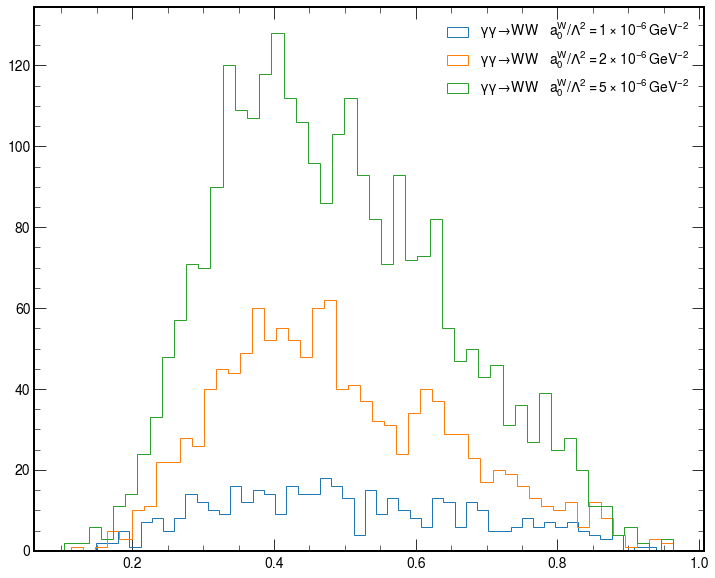

In [22]:
fig = plt.figure( figsize=(12,10) )
for label_ in labels_signals:
    plt.hist( df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]["jet0_tau21"], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
plt.legend( loc='best', fontsize=14 )

### Select events (signal)

In [23]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label_ in labels_signals:
    print ( label_ )
    df_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
    print ( df_events__.shape[0] )
#     df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events__
            
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ] = {}
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
        print ( cat__ )
        df_events__ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ]
        print ( df_events__.shape[0] )
        df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
        print ( df_selected_events__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                print ( df_selected_events__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

GGToWW-AQGC-2018-muon-A0W1e-6
1566
538
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 1566, 'Muon': 1566, 'Jet': 1447, 'Jet_Muon': 1447, 'MET': 1328, 'Jet_MET': 1299, 'PrunedMass': 968, 'Tau21': 791, 'BJet_Veto': 791, 'Xi_CMS': 736, 'WLeptonic': 730, 'Jet_WLeptonic': 730, 'MWW': 725, 'ExtraTracks': 556, 'NProtons': 538}
jet
{'label_jet': '_jes_up'}
538
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 1566, 'Muon': 1566, 'Jet': 1463, 'Jet_Muon': 1463, 'MET': 1342, 'Jet_MET': 1313, 'PrunedMass': 974, 'Tau21': 795, 'BJet_Veto': 795, 'Xi_CMS': 737, 'WLeptonic': 728, 'Jet_WLeptonic': 728, 'MWW': 723, 'ExtraTracks': 556, 'NProtons': 538}
{'label_jet': '_jes_dw'}
539
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Vet

1355
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 3578, 'Muon': 3578, 'Jet': 3450, 'Jet_Muon': 3450, 'MET': 3222, 'Jet_MET': 3105, 'PrunedMass': 2433, 'Tau21': 1990, 'BJet_Veto': 1990, 'Xi_CMS': 1848, 'WLeptonic': 1840, 'Jet_WLeptonic': 1840, 'MWW': 1837, 'ExtraTracks': 1397, 'NProtons': 1355}
jet
{'label_jet': '_jes_up'}
1342
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 3578, 'Muon': 3578, 'Jet': 3471, 'Jet_Muon': 3471, 'MET': 3239, 'Jet_MET': 3121, 'PrunedMass': 2436, 'Tau21': 1991, 'BJet_Veto': 1991, 'Xi_CMS': 1834, 'WLeptonic': 1825, 'Jet_WLeptonic': 1825, 'MWW': 1820, 'ExtraTracks': 1384, 'NProtons': 1342}
{'label_jet': '_jes_dw'}
1363
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 

480
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 1249, 'Muon': 1249, 'Jet': 1226, 'Jet_Muon': 1226, 'MET': 1167, 'Jet_MET': 1121, 'PrunedMass': 886, 'Tau21': 728, 'BJet_Veto': 728, 'Xi_CMS': 636, 'WLeptonic': 635, 'Jet_WLeptonic': 635, 'MWW': 634, 'ExtraTracks': 486, 'NProtons': 480}
GGToWW-AQGC-2018-muon-A0W5e-6
7451
2994
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 7451, 'Muon': 7451, 'Jet': 7375, 'Jet_Muon': 7375, 'MET': 6887, 'Jet_MET': 6665, 'PrunedMass': 5268, 'Tau21': 4324, 'BJet_Veto': 4324, 'Xi_CMS': 3953, 'WLeptonic': 3945, 'Jet_WLeptonic': 3945, 'MWW': 3942, 'ExtraTracks': 3089, 'NProtons': 2994}
jet
{'label_jet': '_jes_up'}
2966
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 

1070
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2678, 'Muon': 2678, 'Jet': 2673, 'Jet_Muon': 2673, 'MET': 2516, 'Jet_MET': 2429, 'PrunedMass': 1922, 'Tau21': 1593, 'BJet_Veto': 1593, 'Xi_CMS': 1371, 'WLeptonic': 1370, 'Jet_WLeptonic': 1370, 'MWW': 1370, 'ExtraTracks': 1090, 'NProtons': 1070}
jet
{'label_jet': '_jes_up'}
1054
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2678, 'Muon': 2678, 'Jet': 2674, 'Jet_Muon': 2674, 'MET': 2517, 'Jet_MET': 2430, 'PrunedMass': 1925, 'Tau21': 1594, 'BJet_Veto': 1594, 'Xi_CMS': 1354, 'WLeptonic': 1353, 'Jet_WLeptonic': 1353, 'MWW': 1353, 'ExtraTracks': 1074, 'NProtons': 1054}
{'label_jet': '_jes_dw'}
1077
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 

In [24]:
import json
samples_info = None
if data_sample == '2017':
    samples_info = json.load( open( 'samples_info_2017.json' ) )
elif data_sample == '2018':
#     samples_info = json.load( open( 'samples_info_2018.json' ) )
#     samples_info = json.load( open( 'samples_info_UL.json' ) )
    samples_info = json.load( open( 'samples_info_UL18_XSDB.json' ) )
samples_info

{'FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0': [100000.0, 0.045393, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0': [100000.0, 0.058313, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0': [100000.0, 0.148122, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_2e-5_semi_pt0': [99000.0, 0.16477, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_5e-6_semi_pt0': [100000.0, 0.049199, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_8e-6_semi_pt0': [100000.0, 0.061404, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_0_semi_pt0': [262999.0, 0.0409705, 1.0, 6],
 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8': [306142140.0, 831.76, 1.0, 800],
 'WW_TuneCP5_13TeV-pythia8': [15679000.0, 75.95, 1.0, 800],
 'WZ_TuneCP5_13TeV-pythia8': [7940000.0, 27.59, 1.0, 800],
 'ZZ_TuneCP5_13TeV-pythia8': [3526000.0, 12.17, 1.0, 800],
 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8': [19366000.0,
  3.549,
  1.0,
  800],
 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8': [178756000.0,
  115.3,
  1.0,
  800],

In [25]:
lumi_periods = None
if data_sample == '2017':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2017[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2017[ 'electron' ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2018[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2018[ 'electron' ]
    
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )

#labels_signals = [ "GGToWW-AQGC-test-A0W1e-6", "GGToWW-AQGC-test-A0W2e-6", "GGToWW-AQGC-test-A0W5e-6" ]
sample_names = {}
if data_sample == '2017':
#     sample_names[ "GGToWW-AQGC-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    if lepton_type == 'muon':
        sample_names[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    if lepton_type == 'electron':
        sample_names[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
        sample_names[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
elif data_sample == '2018':
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = ""
    if lepton_type == 'muon':
        sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = ""
    if lepton_type == 'electron':
        sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
        sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
    
norm_factors = {}
for label_ in labels_signals:
    print ( label_ )
    print ( samples_info[ sample_names[ label_ ] ] )
    sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names[ label_ ] ]
    sample_cross_section_ = sample_cross_section_ * sel_eff_
    if norm_to_1fb:
        sample_cross_section_ = 1.e-03
#     if data_sample == '2018':
#         sample_cross_section_ *= ( 0.14271*(1.174) )
    print ( sample_cross_section_ )
    norm_factors[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
    print ( norm_factors[ label_ ] )
    norm_factors_product_ = np.product( norm_factors[ label_ ] )
#     df_signals_protons_multiRP_events[ label_ ].loc[ :, "norm" ] = norm_factors_product_
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
    for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
        print ( variation__ )
        df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        print ( cat__ )
#     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#         print ( cat__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ].loc[ :, "norm" ] = norm_factors_product_
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            print ( variation__ )
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

55.700985822999996
GGToWW-AQGC-2018-muon-A0W1e-6
[100000.0, 0.045393, 1.0, 6]
0.045393
[5.57009858e-04 4.53930000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W2e-6
[100000.0, 0.058313, 1.0, 6]
0.058313
[5.57009858e-04 5.83130000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W5e-6
[100000.0, 0.148122, 1.0, 6]
0.148122
[5.57009858e-04 1.48122000e+02 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1prot

/tmp/ipykernel_631/837452522.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
/tmp/ipykernel_631/837452522.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
/tmp/ipykernel_631/837452522.py:74: SettingWithCopyWarning: 
A value is trying to be set on

In [26]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
print ( df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values )

['crossingAngle' 'betaStar' 'instLumi' 'jet0_pt' 'jet0_eta' 'jet0_phi'
 'jet0_energy' 'jet0_mass' 'jet0_corrmass' 'jet0_tau1' 'jet0_tau2'
 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz' 'calo_met' 'met' 'met_x'
 'met_y' 'met_phi' 'nVertices' 'num_bjets_ak8' 'num_bjets_ak4'
 'num_jets_ak4' 'pfcand_nextracks' 'pfcand_nextracks_noDRl' 'recoMWhad'
 'recoMWlep' 'recoMWlep_metJER_Up' 'recoMWlep_metJER_Down'
 'recoMWlep_metJES_Up' 'recoMWlep_metJES_Down' 'recoMWW'
 'recoMWW_metJER_Up' 'recoMWW_metJER_Down' 'recoMWW_metJES_Up'
 'recoMWW_metJES_Down' 'recoRapidityWW' 'dphiWW' 'WLeptonicPt'
 'WLeptonicPt_metJER_Up' 'WLeptonicPt_metJER_Down' 'WLeptonicPt_metJES_Up'
 'WLeptonicPt_metJES_Down' 'WLeptonicEta' 'WLeptonicPhi' 'muon0_pt'
 'muon0_eta' 'muon0_phi' 'muon0_energy' 'muon0_charge' 'muon0_iso'
 'muon0_dxy' 'muon0_dz' 'muon0_trackerLayersWithMeasurement'
 'muon0_Roccor' 'muon0_deltaRoccor' 'run_mc' 'pileupWeight'
 'mc_pu_trueinteractions' 'mcWeight' 'prefiring_weight'
 'prefiring_weight_up' 'pre

In [27]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_jes_up" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   29        288   18054212537147359308 0              136.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    102       1012  3261322430295409192  0              152.0       0.4   
    124       1237  11341540916269789665 0              135.0       0.4   
    176       1753  6574637482246563246  0              131.0       0.4   
...                                                       ...       ...   
    9924      99237 9203419173436402190  0              135.0       0.4   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   29        288   18054212537147359308 0           0.0  600.643005   
    71        706   10284919335476110625 0           0.0  568.194763   
    102       1012  3261322430295409192  0           0.0  234.084747   
    124       1237  11341540916269789665 0           0.0  305.686859   
    176       1753  6574637482246563246  0           0.0  331.528229   
...                                                  ...         ...   
    9924      99237 9203419173436402190  0           0.0  946.327698   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9997      99969 7562332171816749490  0           0.0  664.096069   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   29        288   18054212537147359308 0     -1.163432  1.592878   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    102       1012  3261322430295409192  0      0.887100  0.166378   
    124       1237  11341540916269789665 0     -1.242432 -1.548884   
    176       1753  6574637482246563246  0      0.242380 -2.997694   
...                                                  ...       ...   
    9924      99237 9203419173436402190  0     -0.329563  2.162265   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   29        288   18054212537147359308 0      1062.808228  71.336639   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    102       1012  3261322430295409192  0       344.697906  80.358170   
    124       1237  11341540916269789665 0       583.895569  85.282921   
    176       1753  6574637482246563246  0       356.552185  75.002182   
...                                                     ...        ...   
    9924      99237 9203419173436402190  0      1003.785400  80.694183   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9997      99969 7562332171816749490  0       888.332031  71.488083   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   29        288   18054212537147359308 0          79.506950   0.207752  ...   
    71        706 

In [28]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'pileupWeight' ] ]

pileupWeight
run lumiblock event hash_id              slice              
1   71        706   10284919335476110625 0          0.992863
    301       3008  8473333272413352264  0          1.006624
    457       4565  16890764284145850910 0          0.966407
    487       4862  12160033784165724945 0          1.001758
    522       5214  3956811151856015395  0          0.981289
...                                                      ...
    9769      97682 3629188191985195522  0          0.992863
    9854      98531 4701928513134197201  0          1.142475
    9917      99167 7037532472275048024  0          1.003386
    9958      99577 8240557362429832909  0          1.125987
    9967      99661 9457232060636232257  0          0.998228

[126 rows x 1 columns]

In [29]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_id"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_muon_id  sf_muon_id_unc  \
run lumiblock event hash_id              slice                               
1   71        706   10284919335476110625 0        0.996643        0.000380   
    301       3008  8473333272413352264  0        0.995961        0.000578   
    457       4565  16890764284145850910 0        0.996643        0.000380   
    487       4862  12160033784165724945 0        0.996446        0.000738   
    522       5214  3956811151856015395  0        0.996643        0.000380   
...                                                    ...             ...   
    9769      97682 3629188191985195522  0        0.996643        0.000380   
    9854      98531 4701928513134197201  0        0.996643        0.000380   
    9917      99167 7037532472275048024  0        0.996643        0.000380   
    9958      99577 8240557362429832909  0        0.996643        0.000380   
    9967      99661 9457232060636232257  0        0.996643        0.000380   

                                                sf_muon_id_up  sf_muon_id_dw  
run lumiblock event hash_id              slice                                
1   71        706   10284919335476110625 0           0.997023       0.996263  
    301       3008  8473333272413352264  0           0.996539       0.995383  
    457       4565  16890764284145850910 0           0.997023       0.996263  
    487       4862  12160033784165724945 0           0.997184       0.995708  
    522       5214  3956811151856015395  0           0.997023       0.996263  
...                                                       ...            ...  
    9769      97682 3629188191985195522  0           0.997023       0.996263  
    9854      98531 4701928513134197201  0           0.997023       0.996263  
    9917      99167 7037532472275048024  0           0.997023       0.996263  
    9958      99577 8240557362429832909  0           0.997023       0.996263  
    9967      99661 9457232060636232257  0           0.997023       0.996263  

[126 rows x 4 columns]

In [30]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_trigger"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_muon_trigger  \
run lumiblock event hash_id              slice                    
1   71        706   10284919335476110625 0             0.973937   
    301       3008  8473333272413352264  0             1.005186   
    457       4565  16890764284145850910 0             0.977448   
    487       4862  12160033784165724945 0             0.979695   
    522       5214  3956811151856015395  0             0.973937   
...                                                         ...   
    9769      97682 3629188191985195522  0             0.973937   
    9854      98531 4701928513134197201  0             0.973937   
    9917      99167 7037532472275048024  0             0.973937   
    9958      99577 8240557362429832909  0             0.973937   
    9967      99661 9457232060636232257  0             0.973937   

                                                sf_muon_trigger_unc  \
run lumiblock event hash_id              slice                        
1   71        706   10284919335476110625 0                 0.001784   
    301       3008  8473333272413352264  0                 0.000654   
    457       4565  16890764284145850910 0                 0.001090   
    487       4862  12160033784165724945 0                 0.000285   
    522       5214  3956811151856015395  0                 0.001784   
...                                                             ...   
    9769      97682 3629188191985195522  0                 0.001784   
    9854      98531 4701928513134197201  0                 0.001784   
    9917      99167 7037532472275048024  0                 0.001784   
    9958      99577 8240557362429832909  0                 0.001784   
    9967      99661 9457232060636232257  0                 0.001784   

                                                sf_muon_trigger_up  \
run lumiblock event hash_id              slice                       
1   71        706   10284919335476110625 0                0.975721   
    301       3008  8473333272413352264  0                1.005840   
    457       4565  16890764284145850910 0                0.978537   
    487       4862  12160033784165724945 0                0.979980   
    522       5214  3956811151856015395  0                0.975721   
...                                                            ...   
    9769      97682 3629188191985195522  0                0.975721   
    9854      98531 4701928513134197201  0                0.975721   
    9917      99167 7037532472275048024  0                0.975721   
    9958      99577 8240557362429832909  0                0.975721   
    9967      99661 9457232060636232257  0                0.975721   

                                                sf_muon_trigger_dw  
run lumiblock event hash_id              slice                      
1   71        706   10284919335476110625 0                0.972153  
    301       3008  8473333272413352264  0                1.004532  
    457       4565  16890764284145850910 0                0.976358  
    487       4862  12160033784165724945 0                0.979410  
    522       5214  3956811151856015395  0                0.972153  
...                                                            ...  
    9769      97682 3629188191985195522  0                0.972153  
    9854      98531 4701928513134197201  0                0.972153  
    9917      99167 7037532472275048024  0                0.972153  
    9958      99577 8240557362429832909  0                0.972153  
    9967      99661 9457232060636232257  0                0.972153  

[126 rows x 4 columns]

In [31]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'eff_proton_var_up', 'eff_proton_var_dw' ] ]

eff_proton_var_up  \
run lumiblock event hash_id              slice                      
1   71        706   10284919335476110625 0               1.030212   
    301       3008  8473333272413352264  0               1.020600   
    457       4565  16890764284145850910 0               1.020600   
    487       4862  12160033784165724945 0               1.030212   
    522       5214  3956811151856015395  0               1.030212   
...                                                           ...   
    9769      97682 3629188191985195522  0               1.022100   
    9854      98531 4701928513134197201  0               1.030212   
    9917      99167 7037532472275048024  0               1.020600   
    9958      99577 8240557362429832909  0               1.030212   
    9967      99661 9457232060636232257  0               1.030212   

                                                eff_proton_var_dw  
run lumiblock event hash_id              slice                     
1   71        706   10284919335476110625 0               0.969788  
    301       3008  8473333272413352264  0               0.979400  
    457       4565  16890764284145850910 0               0.979400  
    487       4862  12160033784165724945 0               0.969788  
    522       5214  3956811151856015395  0               0.969788  
...                                                           ...  
    9769      97682 3629188191985195522  0               0.977900  
    9854      98531 4701928513134197201  0               0.969788  
    9917      99167 7037532472275048024  0               0.979400  
    9958      99577 8240557362429832909  0               0.969788  
    9967      99661 9457232060636232257  0               0.969788  

[126 rows x 2 columns]

In [32]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down' ] ]

prefiring_weight  \
run lumiblock event hash_id              slice                     
1   71        706   10284919335476110625 0              0.995184   
    301       3008  8473333272413352264  0              0.995184   
    457       4565  16890764284145850910 0              0.995184   
    487       4862  12160033784165724945 0              0.995184   
    522       5214  3956811151856015395  0              0.995184   
...                                                          ...   
    9769      97682 3629188191985195522  0              0.995184   
    9854      98531 4701928513134197201  0              0.995184   
    9917      99167 7037532472275048024  0              0.995184   
    9958      99577 8240557362429832909  0              0.995184   
    9967      99661 9457232060636232257  0              0.995184   

                                                prefiring_weight_up  \
run lumiblock event hash_id              slice                        
1   71        706   10284919335476110625 0                 0.994133   
    301       3008  8473333272413352264  0                 0.994133   
    457       4565  16890764284145850910 0                 0.994133   
    487       4862  12160033784165724945 0                 0.994133   
    522       5214  3956811151856015395  0                 0.994133   
...                                                             ...   
    9769      97682 3629188191985195522  0                 0.994133   
    9854      98531 4701928513134197201  0                 0.994133   
    9917      99167 7037532472275048024  0                 0.994133   
    9958      99577 8240557362429832909  0                 0.994133   
    9967      99661 9457232060636232257  0                 0.994133   

                                                prefiring_weight_down  
run lumiblock event hash_id              slice                         
1   71        706   10284919335476110625 0                   0.996234  
    301       3008  8473333272413352264  0                   0.996234  
    457       4565  16890764284145850910 0                   0.996234  
    487       4862  12160033784165724945 0                   0.996234  
    522       5214  3956811151856015395  0                   0.996234  
...                                                               ...  
    9769      97682 3629188191985195522  0                   0.996234  
    9854      98531 4701928513134197201  0                   0.996234  
    9917      99167 7037532472275048024  0                   0.996234  
    9958      99577 8240557362429832909  0                   0.996234  
    9967      99661 9457232060636232257  0                   0.996234  

[126 rows x 3 columns]

In [33]:
variations_weights_ = [ "nom" ]

if lepton_type == 'muon':
    variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_id_ )
    variations_weights_sf_muon_trigger_ = [ "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_trigger_ )
elif lepton_type == 'electron':
    variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_id_ )
    variations_weights_sf_electron_trigger_ = [ "sf_electron_trigger_up", "sf_electron_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_trigger_ )

variations_weights_sf_prefiring_ = [ "sf_prefiring_up", "sf_prefiring_dw" ]
variations_weights_.extend( variations_weights_sf_prefiring_ )

variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
variations_weights_.extend( variations_weights_proton_eff_ )

var_names_sf_lepton_id__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom", 
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
        
    var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
    var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
        
    var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
    var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"

var_names_sf_trigger__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_id_up", "sf_muon_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_muon_trigger"
        
    var_names_sf_trigger__[ "sf_muon_trigger_up" ] = "sf_muon_trigger_up"
    var_names_sf_trigger__[ "sf_muon_trigger_dw" ] = "sf_muon_trigger_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_id_up", "sf_electron_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_electron_trigger"
        
    var_names_sf_trigger__[ "sf_electron_trigger_up" ] = "sf_electron_trigger_up"
    var_names_sf_trigger__[ "sf_electron_trigger_dw" ] = "sf_electron_trigger_dw"

var_names_sf_prefiring__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_muon_id_up", "sf_muon_id_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_electron_id_up", "sf_electron_id_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
var_names_sf_prefiring__[ "sf_prefiring_up" ] = "prefiring_weight_up"
var_names_sf_prefiring__[ "sf_prefiring_dw" ] = "prefiring_weight_down"

var_names_proton_eff__ = {}
var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

print ( variations_weights_ )
print ( var_names_sf_lepton_id__ )
print ( var_names_sf_trigger__ )
print ( var_names_sf_prefiring__ )
print ( var_names_proton_eff__)

weights_mc = {}
weights_sig_plus_mix_2protons = {}
weights_sig_plus_mix_categories = {}
# weights_out_acceptance_misreconstructed = {}
for label_ in labels_signals:
    print ( label_ )
    weights_mc[ label_ ] = {}
    weights_sig_plus_mix_2protons[ label_ ] = {}
    weights_sig_plus_mix_categories[ label_ ] = {}
    
    for var_weights_ in variations_weights_:
#         weights_mc[ label_ ][ var_weights_ ] = ( df_signals_protons_multiRP_events[ label_ ][ "norm" ] * 
#                                                  df_signals_protons_multiRP_events[ label_ ][ "pileupWeight" ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ var_names_sf_muon_id__[ var_weights_ ] ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_proton_all" ] *
#                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_signals_protons_multiRP_events[ label_ ][ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_multitrack" ] )

    #     weights_sig_plus_mix_2protons[ label_ ] = ( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "norm" ] * 
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "pileupWeight" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "sf_muon_id" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_proton_all" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_strictzero" ] )
        weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ] = {}
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
            df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ]
#             weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                        df_selected_events__[ "pileupWeight" ] *
#                                                                                        df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                        ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                        df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                       df_selected_events__[ "pileupWeight" ] *
                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                       df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                                       df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
            if data_sample == '2017':
                weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] *
                                                                                           df_selected_events__[ "eff_strictzero" ] )


        weights_sig_plus_mix_categories[ label_ ][ var_weights_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
            print ( cat__ )
    #         weights_sig_plus_mix_categories[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                               df_selected_events__[ "pileupWeight" ] *
    #                                                               df_selected_events__[ "sf_muon_id" ] *
    #                                                               df_selected_events__[ "eff_proton_all" ] *
    #                                                               df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ] = {}
            for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
                df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
#                 weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                                       df_selected_events__[ "pileupWeight" ] *
#                                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                                       df_selected_events__[ "eff_strictzero" ] )
                weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                                      df_selected_events__[ "pileupWeight" ] *
                                                                                                      df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                                      df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                                                      df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                                                      ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
                if data_sample == '2017':
                    weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] *
                                                                                                          df_selected_events__[ "eff_strictzero" ] )

    #     weights_out_acceptance_misreconstructed[ label_ ] = {}
    #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
    #         print ( cat__ )
    #         df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ]
    #         weights_out_acceptance_misreconstructed[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                                       df_selected_events__[ "pileupWeight" ] *
    #                                                                       df_selected_events__[ "sf_muon_id" ] *
    #                                                                       df_selected_events__[ "eff_proton_all" ] *
    #                                                                       df_selected_events__[ "eff_multitrack" ] )
        
print ( weights_mc )
print ( weights_sig_plus_mix_2protons )
print ( weights_sig_plus_mix_categories )
# print ( weights_out_acceptance_misreconstructed )

['nom', 'sf_muon_id_up', 'sf_muon_id_dw', 'sf_muon_trigger_up', 'sf_muon_trigger_dw', 'sf_prefiring_up', 'sf_prefiring_dw', 'proton_eff_up', 'proton_eff_dw']
{'nom': 'sf_muon_id', 'proton_eff_up': 'sf_muon_id', 'proton_eff_dw': 'sf_muon_id', 'sf_prefiring_up': 'sf_muon_id', 'sf_prefiring_dw': 'sf_muon_id', 'sf_muon_trigger_up': 'sf_muon_id', 'sf_muon_trigger_dw': 'sf_muon_id', 'sf_muon_id_up': 'sf_muon_id_up', 'sf_muon_id_dw': 'sf_muon_id_dw'}
{'nom': 'sf_muon_trigger', 'proton_eff_up': 'sf_muon_trigger', 'proton_eff_dw': 'sf_muon_trigger', 'sf_prefiring_up': 'sf_muon_trigger', 'sf_prefiring_dw': 'sf_muon_trigger', 'sf_muon_id_up': 'sf_muon_trigger', 'sf_muon_id_dw': 'sf_muon_trigger', 'sf_muon_trigger_up': 'sf_muon_trigger_up', 'sf_muon_trigger_dw': 'sf_muon_trigger_dw'}
{'nom': 'prefiring_weight', 'proton_eff_up': 'prefiring_weight', 'proton_eff_dw': 'prefiring_weight', 'sf_muon_id_up': 'prefiring_weight', 'sf_muon_id_dw': 'prefiring_weight', 'sf_muon_trigger_up': 'prefiring_weight',

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'2protons_sig': {'_nom': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.024250
     301        3008   8473333272413352264   0        0.025358
     457        4565   16890764284145850910  0        0.023689
     487        4862   12160033784165724945  0        0.024607
     522        5214   3956811151856015395   0        0.023967
                                                        ...   
     9769       97682  3629188191985195522   0        0.024250
     9854       98531  4701928513134197201   0        0.027904
     9917       99167  7037532472275048024   0        0.024507
     9958       99577  8240557362429832909   0        0.027502
     9967       99661  9457232060636232257   0        0.024381
Length: 126, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.024250
     301        3008   84733332724

In [34]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = {}
weights_sig_plus_mix_categories_concat = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = {}
weights_sig_plus_mix_categories_concat_skip_sig = {}
for label_ in labels_signals:
    print ( label_ )
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ] = {}
    weights_sig_plus_mix_categories_concat[ label_ ] = {}
    weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ] = {}
        weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ] = {}
        
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__ = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__ = {}
    weights_sig_plus_mix_categories__ = {}
    weights_sig_plus_mix_categories_skip_sig__ = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories__[ var_weights_ ] = {}
        weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ] = {}
    idx_cat__ = 0
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            if idx_cat__ == 0:
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] = {}
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] = {}
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] = {}
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
            for var_weights_ in variations_weights_:
                weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
            if cat__ != '2protons_sig':
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
        idx_cat__ += 1

    for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__:
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] )
        for var_weights_ in variations_weights_:
            weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] )
            weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
    print ( weights_sig_plus_mix_categories_concat[ label_ ] )
    print ( weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] )

GGToWW-AQGC-2018-muon-A0W1e-6
{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    71         706    10284919335476110625  0        0.024250
                   301        3008   8473333272413352264   0        0.025358
                   457        4565   16890764284145850910  0        0.023689
                   487        4862   12160033784165724945  0        0.024607
                   522        5214   3956811151856015395   0        0.023967
                                                                      ...   
2protons_mix  1    9746       97451  6134505061019035923   0        0.028783
                   9885       98850  13945724781513137301  0        0.025486
                   9907       99062  15807698640954966335  0        0.024223
                   9924       99237  9203419173436402190   0        0.023990
                   9997       99969  7562332171816749490   0        0.025877
Length: 538, dtype: float64, '_jes_up':  

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    52         518    8644475448256328373   0        0.031589
                   73         728    2472394711421382474   0        0.031133
                   130        1294   14314490683350305090  0        0.029844
                   172        1720   15350973206359911762  0        0.031582
                   269        2687   4658257567357900832   0        0.030833
                                                                      ...   
2protons_mix  1    9906       99051  1753889397238654583   0        0.031865
                   9928       99274  7136154201283652823   0        0.035466
                   9932       99312  11031251045785505181  0        0.033664
                   9959       99587  10887923264128904079  0        0.031659
                   9992       99920  16465507394660264032  0        0.031776
Length: 1355, dtype: float64, '_jes_up':               run  lumiblock  

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    1          1      6025467297070359873   0        0.081773
                   2          11     14339887669900922026  0        0.079222
                   34         331    3010845467042626086   0        0.084785
                   50         497    16935041806298036800  0        0.080126
                   124        1233   8164031697374246314   0        0.071405
                                                                      ...   
2protons_mix  1    9951       99504  9104402618417556905   0        0.070554
                   9968       99679  6454304085125989987   0        0.082062
                   9980       99797  15649466501784969651  0        0.082062
                   9982       99814  9696233943113644218   0        0.073325
                   9997       99964  3255649066454345609   0        0.079953
Length: 2994, dtype: float64, '_jes_up':               run  lumiblock  

In [35]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
        
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   29        288   18054212537147359308 0              136.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    102       1012  3261322430295409192  0              152.0       0.4   
    124       1237  11341540916269789665 0              135.0       0.4   
    176       1753  6574637482246563246  0              131.0       0.4   
...                                                       ...       ...   
    9924      99237 9203419173436402190  0              135.0       0.4   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   29        288   18054212537147359308 0           0.0  600.643005   
    71        706   10284919335476110625 0           0.0  568.194763   
    102       1012  3261322430295409192  0           0.0  234.084747   
    124       1237  11341540916269789665 0           0.0  305.686859   
    176       1753  6574637482246563246  0           0.0  331.528229   
...                                                  ...         ...   
    9924      99237 9203419173436402190  0           0.0  946.327698   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9997      99969 7562332171816749490  0           0.0  664.096069   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   29        288   18054212537147359308 0     -1.163432  1.592878   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    102       1012  3261322430295409192  0      0.887100  0.166378   
    124       1237  11341540916269789665 0     -1.242432 -1.548884   
    176       1753  6574637482246563246  0      0.242380 -2.997694   
...                                                  ...       ...   
    9924      99237 9203419173436402190  0     -0.329563  2.162265   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   29        288   18054212537147359308 0      1062.808228  71.336639   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    102       1012  3261322430295409192  0       344.697906  80.358170   
    124       1237  11341540916269789665 0       583.895569  85.282921   
    176       1753  6574637482246563246  0       356.552185  75.002182   
...                                                     ...        ...   
    9924      99237 9203419173436402190  0      1003.785400  80.694183   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9997      99969 7562332171816749490  0       888.332031  71.488083   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   29        288   18054212537147359308 0          79.506950   0.207752  ...   
    71        706 

In [36]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   71        706   10284919335476110625 0              147.0   
                 301       3008  8473333272413352264  0              152.0   
                 457       4565  16890764284145850910 0              130.0   
                 487       4862  12160033784165724945 0              143.0   
                 522       5214  3956811151856015395  0              154.0   
...                                                                    ...   
2protons_mix 1   9746      97451 6134505061019035923  0              146.0   
                 9885      98850 13945724781513137301 0              148.0   
                 9907      99062 15807698640954966335 0              135.0   
                 9924      99237 9203419173436402190  0              135.0   
                 9997      99969 7562332171816749490  0              142.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.4   
                 301       3008  8473333272413352264  0           0.4   
                 457       4565  16890764284145850910 0           0.4   
                 487       4862  12160033784165724945 0           0.4   
                 522       5214  3956811151856015395  0           0.4   
...                                                               ...   
2protons_mix 1   9746      97451 6134505061019035923  0           0.4   
                 9885      98850 13945724781513137301 0           0.4   
                 9907      99062 15807698640954966335 0           0.4   
                 9924      99237 9203419173436402190  0           0.4   
                 9997      99969 7562332171816749490  0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.0   
                 301       3008  8473333272413352264  0           0.0   
                 457       4565  16890764284145850910 0           0.0   
                 487       4862  12160033784165724945 0           0.0   
                 522       5214  3956811151856015395  0           0.0   
...                                                               ...   
2protons_mix 1   9746      97451 6134505061019035923  0           0.0   
                 9885      98850 13945724781513137301 0           0.0   
                 9907      99062 15807698640954966335 0           0.0   
                 9924      99237 9203419173436402190  0           0.0   
                 9997      99969 7562332171816749490  0           0.0   

                                                                 jet0_pt  \
             run lumiblock event hash_id              slice                
2protons_sig 1   71        706   10284919335476110625 0       568.194763   
                 301       3008  8473333272413352264  0       227.315460   
                 457       4565  16890764284145850910 0       229.637680   
                 487       4862  12160033784165724945 0       306.740692   
                 522       5214  3956811151856015395  0       643.807129   
...                                                                  ...   
2protons_mix 1   9746      97451 6134505061019035923  0       397.022644   
                 9885      98850 13945724781513137301 0       365.890472   
                 9907      99062 15807698640954966335 0      1217.315796   
                 9924      99237 9203419173436402190  0       946.327698   
                 9997      99969 7562332171816749490  0       664.096069   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_si

In [37]:
df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
msk_columns_R_MWW_MX_ = [ key_.find( 'R_MWW_MX' ) >= 0 for key_ in df__.columns ]
columns_R_MWW_MX_ = df__.columns[ msk_columns_R_MWW_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_R_MWW_MX_ )
df__[ columns_ ]

period  \
             run lumiblock event hash_id              slice           
2protons_sig 1   71        706   10284919335476110625 0       2018A   
                 301       3008  8473333272413352264  0      2018D2   
                 457       4565  16890764284145850910 0      2018D2   
                 487       4862  12160033784165724945 0       2018C   
                 522       5214  3956811151856015395  0       2018C   
...                                                             ...   
2protons_mix 1   9746      97451 6134505061019035923  0      2018D1   
                 9885      98850 13945724781513137301 0      2018D1   
                 9907      99062 15807698640954966335 0      2018D1   
                 9924      99237 9203419173436402190  0       2018A   
                 9997      99969 7562332171816749490  0       2018A   

                                                             R_MWW_MX_nom  \
             run lumiblock event hash_id              slice                 
2protons_sig 1   71        706   10284919335476110625 0          0.875445   
                 301       3008  8473333272413352264  0          0.418452   
                 457       4565  16890764284145850910 0          0.562858   
                 487       4862  12160033784165724945 0          0.819262   
                 522       5214  3956811151856015395  0          1.017592   
...                                                                   ...   
2protons_mix 1   9746      97451 6134505061019035923  0          0.642784   
                 9885      98850 13945724781513137301 0          2.036129   
                 9907      99062 15807698640954966335 0          2.380902   
                 9924      99237 9203419173436402190  0          1.331438   
                 9997      99969 7562332171816749490  0          1.175302   

                                                             R_MWW_MX_jes_up  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.875399   
                 301       3008  8473333272413352264  0             0.418482   
                 457       4565  16890764284145850910 0             0.562779   
                 487       4862  12160033784165724945 0             0.819202   
                 522       5214  3956811151856015395  0             1.017550   
...                                                                      ...   
2protons_mix 1   9746      97451 6134505061019035923  0             0.642753   
                 9885      98850 13945724781513137301 0             2.036087   
                 9907      99062 15807698640954966335 0             2.380883   
                 9924      99237 9203419173436402190  0             1.331349   
                 9997      99969 7562332171816749490  0             1.175313   

                                                             R_MWW_MX_jes_dw  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.875488   
                 301       3008  8473333272413352264  0             0.418420   
                 457       4565  16890764284145850910 0             0.562932   
                 487       4862  12160033784165724945 0             0.819316   
                 522       5214  3956811151856015395  0             1.017627   
...                                                                      ...   
2protons_mix 1   9746      97451 6134505061019035923  0             0.642811   
                 9885      98850 13945724781513137301 0             2.036165   
                 9907      99062 15807698640954966335 0             2.380896   
                 9924      99237 9203419173436402190  0             1.331515   
                 9997      99969 7562332171816749490  0             1.175285   

                                                     

In [38]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm0 1   102       1012  3261322430295409192  0              152.0   
                     176       1753  6574637482246563246  0              131.0   
                     246       2458  9693195791745234741  0              155.0   
                     522       5212  16176255125140643642 0              154.0   
                     565       5646  3991961072879684800  0              152.0   
...                                                                        ...   
2protons_mix     1   9746      97451 6134505061019035923  0              146.0   
                     9885      98850 13945724781513137301 0              148.0   
                     9907      99062 15807698640954966335 0              135.0   
                     9924      99237 9203419173436402190  0              135.0   
                     9997      99969 7562332171816749490  0              142.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   102       1012  3261322430295409192  0           0.4   
                     176       1753  6574637482246563246  0           0.4   
                     246       2458  9693195791745234741  0           0.4   
                     522       5212  16176255125140643642 0           0.4   
                     565       5646  3991961072879684800  0           0.4   
...                                                                   ...   
2protons_mix     1   9746      97451 6134505061019035923  0           0.4   
                     9885      98850 13945724781513137301 0           0.4   
                     9907      99062 15807698640954966335 0           0.4   
                     9924      99237 9203419173436402190  0           0.4   
                     9997      99969 7562332171816749490  0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   102       1012  3261322430295409192  0           0.0   
                     176       1753  6574637482246563246  0           0.0   
                     246       2458  9693195791745234741  0           0.0   
                     522       5212  16176255125140643642 0           0.0   
                     565       5646  3991961072879684800  0           0.0   
...                                                                   ...   
2protons_mix     1   9746      97451 6134505061019035923  0           0.0   
                     9885      98850 13945724781513137301 0           0.0   
                     9907      99062 15807698640954966335 0           0.0   
                     9924      99237 9203419173436402190  0           0.0   
                     9997      99969 7562332171816749490  0           0.0   

                                                                     jet0_pt  \
                 run lumiblock event hash_id              slice                
1proton_sig_Arm0 1   102       1012  3261322430295409192  0       234.084747   
                     176       1753  6574637482246563246  0       331.528229   
                     246       2458  9693195791745234741  0       484.041595   
                     522       5212  16176255125140643642 0       301.995209   
                     565       5646  3991961072879684800  0      1117.602417   
...                                                                      ...   
2protons_mix     1   9746      97451 6134505061019035923  0       397.022644   
                     9885      98850 13945724781513137301 0       365.890472   
                     9907      99062 15807698640954966335 0      1217.315796   
                     9924      99237 9203419173436402190  0       946.327698   
                     9997      999

### Plot signal

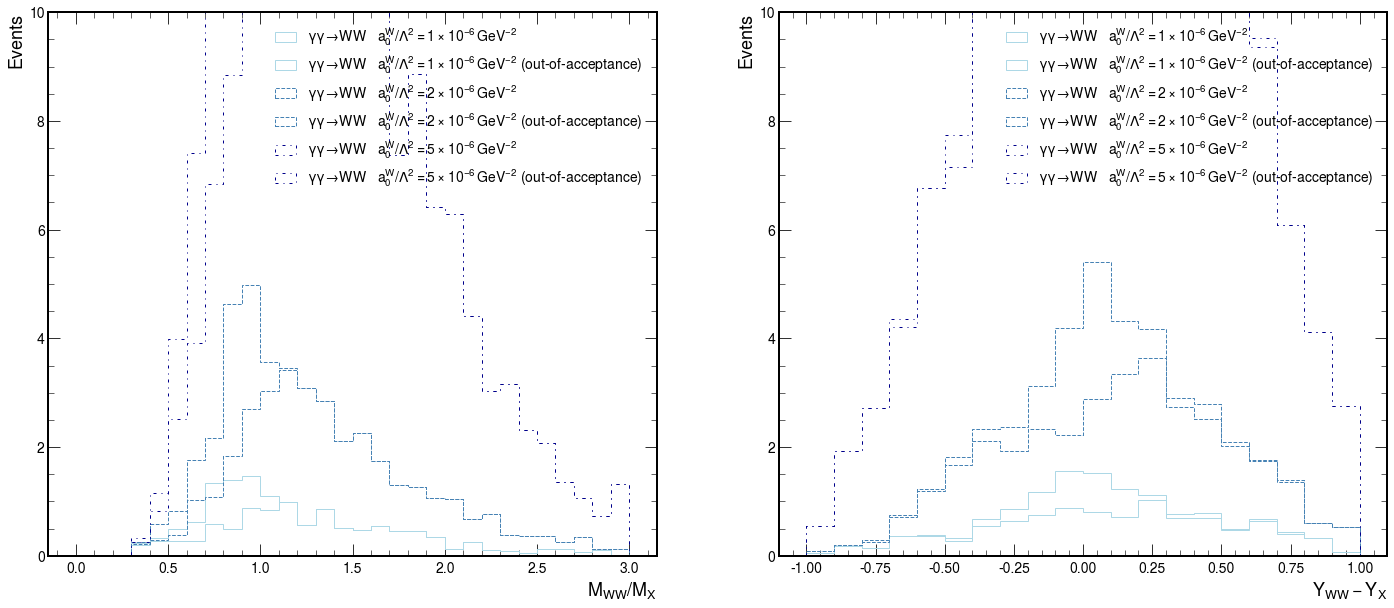

In [39]:
variation__ = "_nom"
var_str__ = {}
# var_str__[ "_nom" ] = "_nom_nom"
var_str__[ "_nom" ] = "_nom"
var_weights__ = "nom"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

for idx_, label_ in enumerate( labels_signals ):
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=30, range=(0.,3.) )
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=30, range=(0.,3.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=20, range=(-1.,1.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=14 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=14 )
    
axes[0].set_ylim( (0.,10.) )
axes[1].set_ylim( (0.,10.) )

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Electron_2018.png", bbox_inches='tight' )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


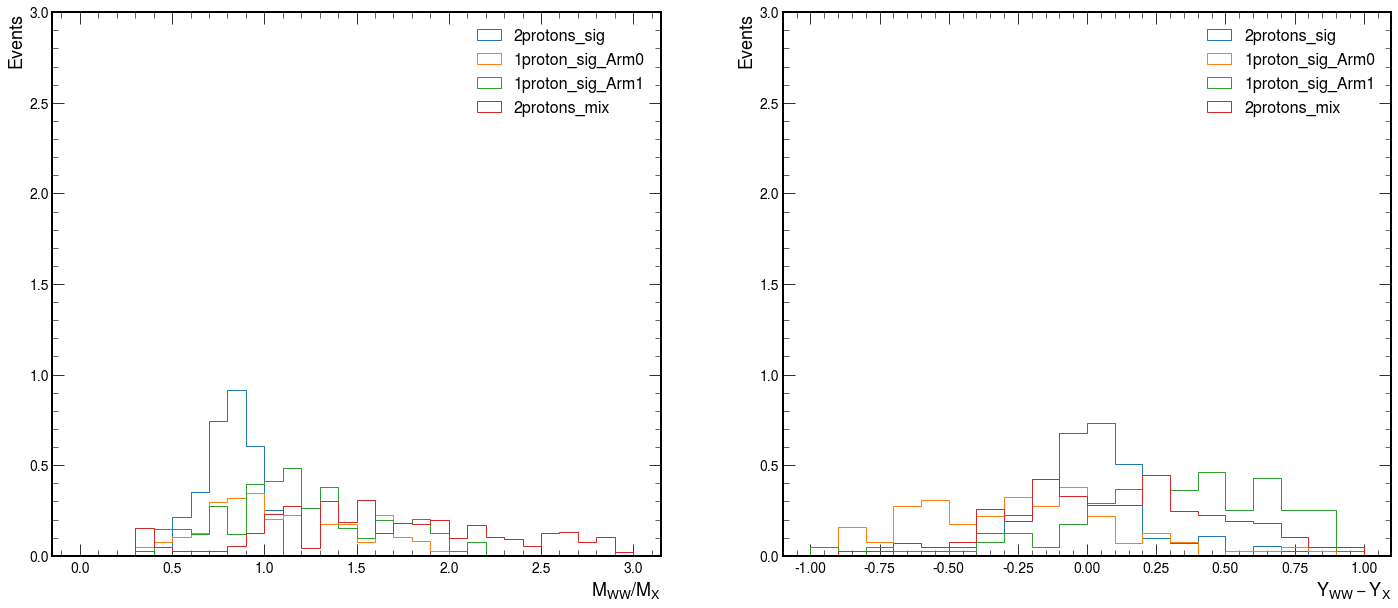

In [40]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 3. )
axes[1].set_ylim( 0., 3. )

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.png", bbox_inches='tight' )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


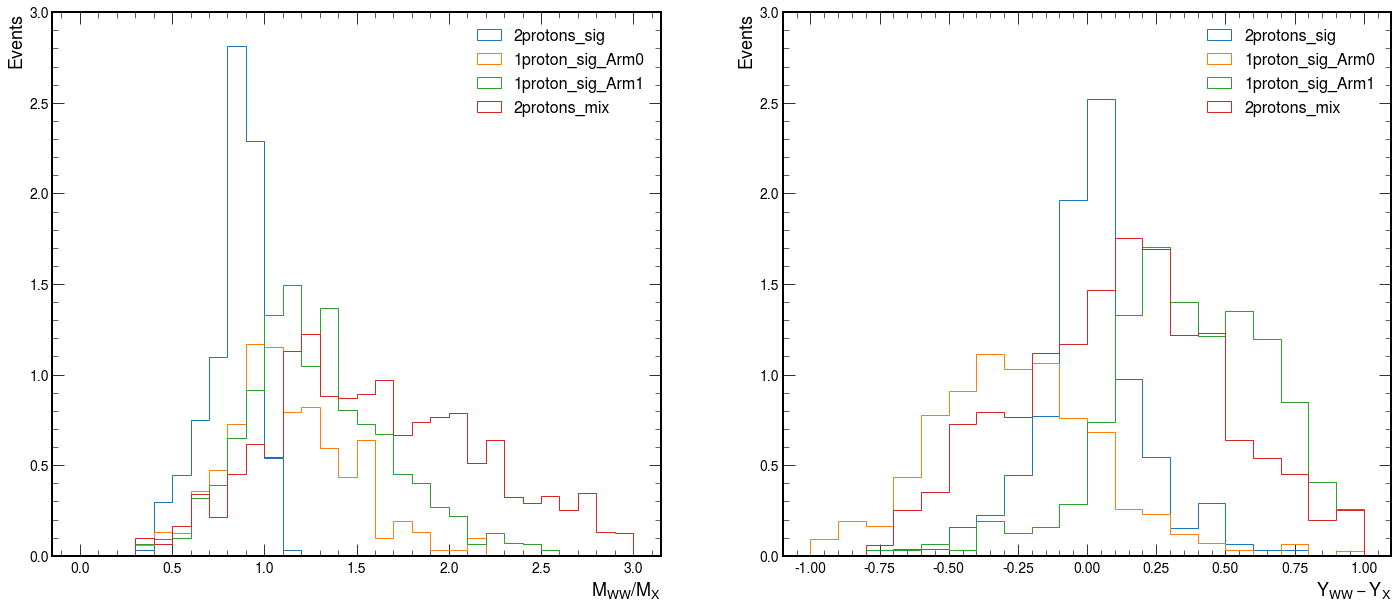

In [41]:
label_ = ""
coupling_str_ = "A0W2e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 3. )
axes[1].set_ylim( 0., 3. )

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.png", bbox_inches='tight' )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


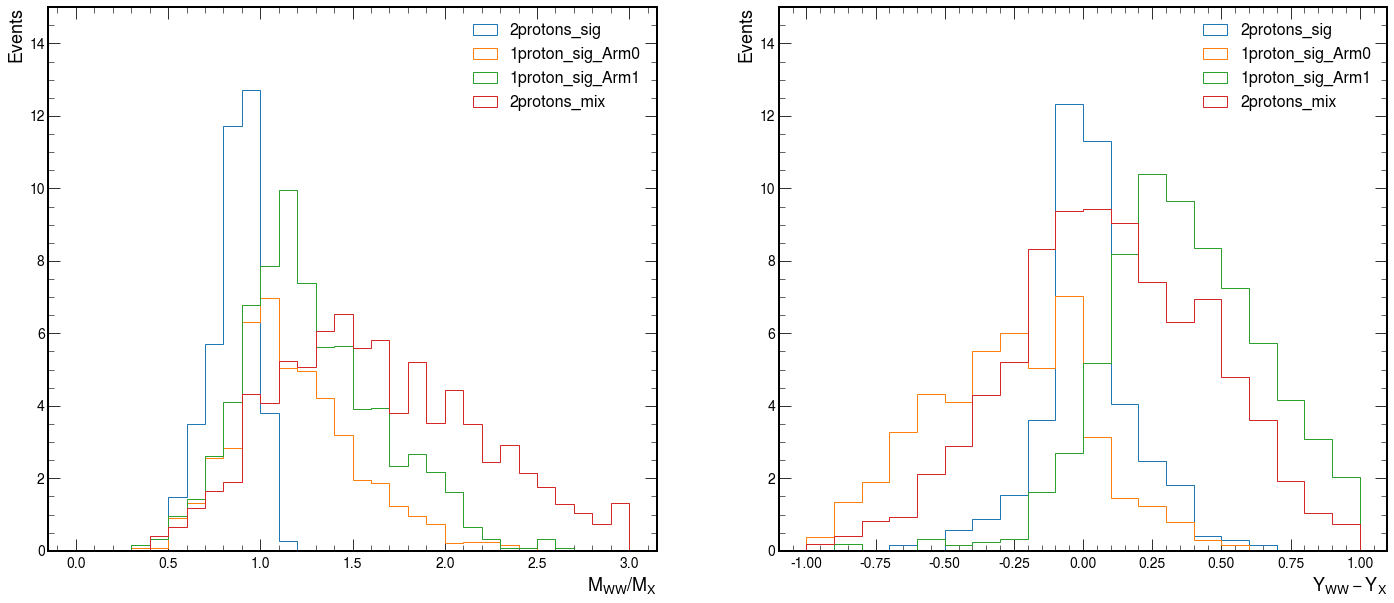

In [42]:
label_ = ""
coupling_str_ = "A0W5e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 15. )
axes[1].set_ylim( 0., 15. )

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories-Electron_2018.png", bbox_inches='tight' )

In [43]:
if lepton_type == 'muon':
    row_labels = ["GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6"]
elif lepton_type == 'electron':
    row_labels = ["GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6"]

table = pd.DataFrame(index=row_labels, columns=['2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix'])

for row_label in row_labels:
    #num_entries_df1 = len(df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[row_label]['2protons_sig']['_nom'][ "R_MWW_MX" + var_str__[ "_nom" ] ])
    #num_entries_df2 = len(df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[row_label]['1proton_sig_Arm0']['_nom'][ "R_MWW_MX" + var_str__[ "_nom" ] ])
    #num_entries_df3 = len(df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[row_label]['1proton_sig_Arm1']['_nom'][ "R_MWW_MX" + var_str__[ "_nom" ] ])
    #num_entries_df4 = len(df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[row_label]['2protons_mix']['_nom'][ "R_MWW_MX" + var_str__[ "_nom" ] ])
    num_entries_df1 = np.sum(weights_sig_plus_mix_categories[row_label]['nom']['2protons_sig']['_nom'])
    num_entries_df2 = np.sum(weights_sig_plus_mix_categories[row_label]['nom']['1proton_sig_Arm0']['_nom'])
    num_entries_df3 = np.sum(weights_sig_plus_mix_categories[row_label]['nom']['1proton_sig_Arm1']['_nom'])
    num_entries_df4 = np.sum(weights_sig_plus_mix_categories[row_label]['nom']['2protons_mix']['_nom'])

    table.loc[row_label, '2protons_sig'] = num_entries_df1
    table.loc[row_label, '1proton_sig_Arm0'] = num_entries_df2
    table.loc[row_label, '1proton_sig_Arm1'] = num_entries_df3
    table.loc[row_label, '2protons_mix'] = num_entries_df4

pd.set_option('display.width', 1000)

print(table)

                              2protons_sig 1proton_sig_Arm0 1proton_sig_Arm1 2protons_mix
GGToWW-AQGC-2018-muon-A0W1e-6     3.150333         2.864154          3.81368     3.636972
GGToWW-AQGC-2018-muon-A0W2e-6      8.29117          8.06223        11.669347    15.341003
GGToWW-AQGC-2018-muon-A0W5e-6     39.58639         46.22466        71.058919    87.132351


In [44]:
#stop[cell]

GGToWW-AQGC-2018-muon-A0W1e-6
Number of events: 13.465138250512776 +/- 0.5819376023536678
Number of events (A): 8.413095623310177 +/- 0.46003389395384037
Number of events (B): 2.507530523970085 +/- 0.25017221112190924
Number of events (C): 2.0429175122088945 +/- 0.22764285402683457
Number of events (D): 0.5015945910236178 +/- 0.11230665714771515
0 0
GGToWW-AQGC-2018-muon-A0W2e-6
Number of events: 43.363749881564736 +/- 1.1808509365562954
Number of events (A): 32.189141043977216 +/- 1.0182436349756294
Number of events (B): 4.5549383186571895 +/- 0.38178412352127733
Number of events (C): 5.560688792530188 +/- 0.4215209391716252
Number of events (D): 1.0589817264001398 +/- 0.18479668575074043
0 1
GGToWW-AQGC-2018-muon-A0W5e-6
Number of events: 244.0023196859475 +/- 4.470494134563215
Number of events (A): 186.4575600188221 +/- 3.9094626979137024
Number of events (B): 22.526219153006934 +/- 1.3540301846116962
Number of events (C): 32.127443867538986 +/- 1.621168150591363
Number of events (D

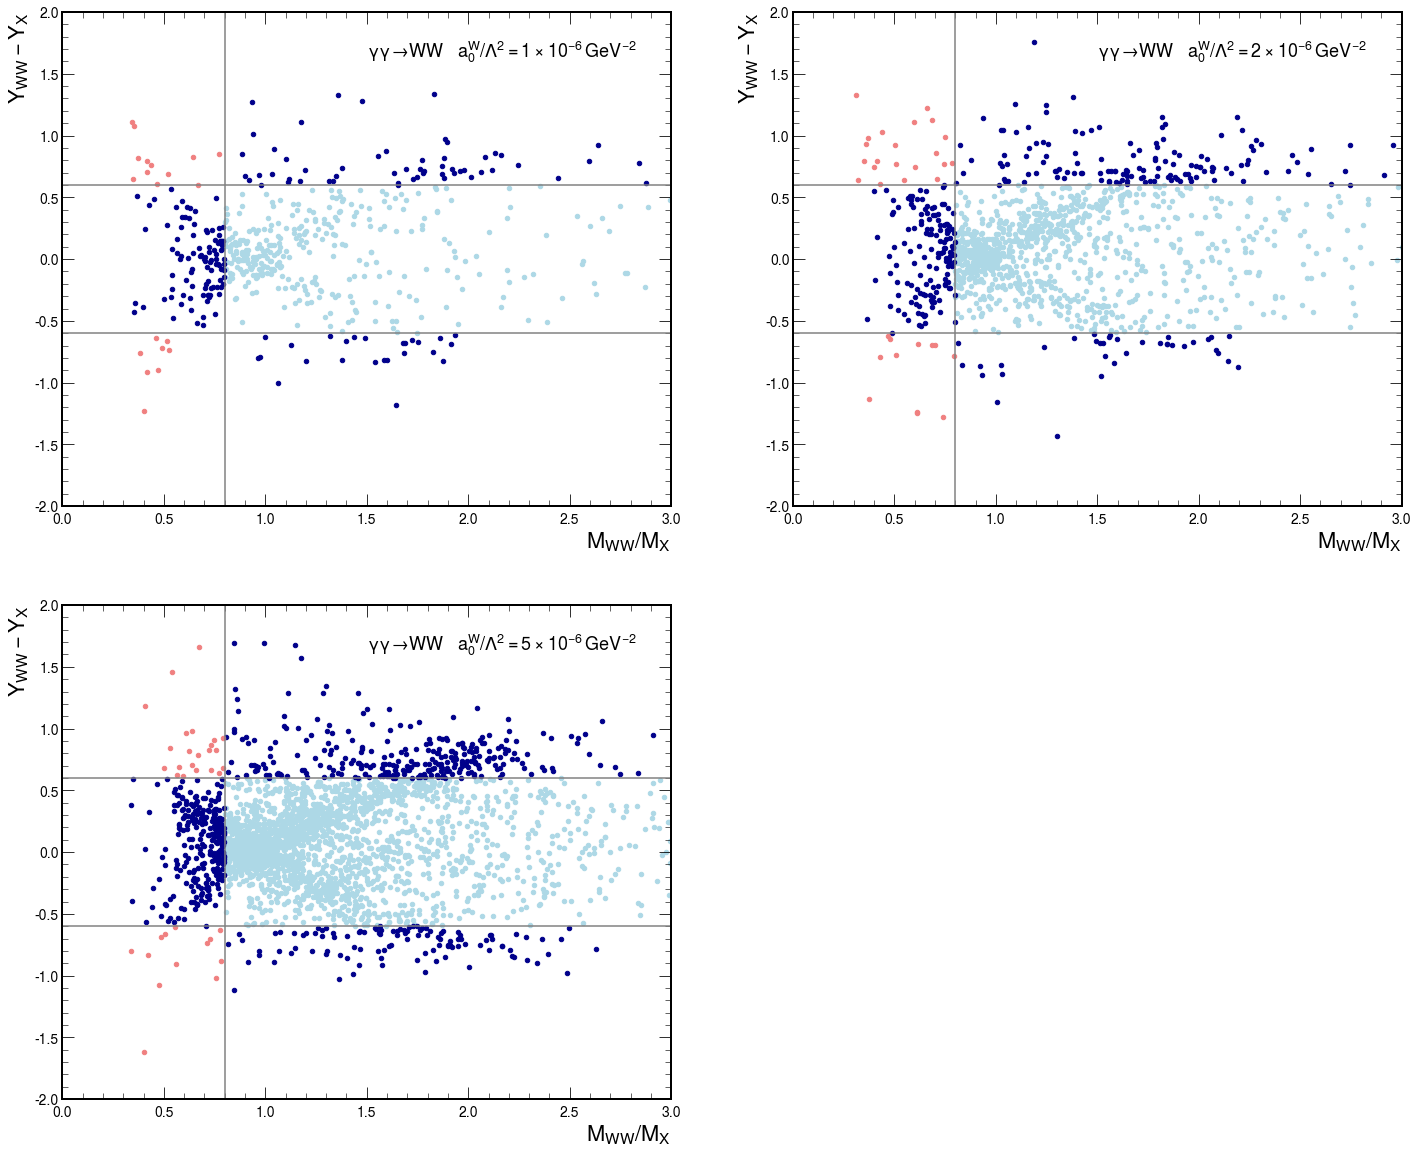

In [45]:
variation__ = "_nom"
var_weights__ = "nom"

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ]
    var1__ = ( "R_MWW_MX" + var_str__[ "_nom" ] )
    var2__ = ( "Diff_YWW_YX" + var_str__[ "_nom" ] )
    
    msk_sig_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_sig_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( weights__ )
    err_n_events_sig = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_sig_A = np.sum( weights__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights__[ msk_sig_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    if np.sum( msk_sig_A ) > 0:
        df__[ msk_sig_A ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightblue' )
    if np.sum( msk_sig_B ) > 0:
        df__[ msk_sig_B ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_C ) > 0:
        df__[ msk_sig_C ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_D ) > 0:
        df__[ msk_sig_D ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightcoral' )
    title_str_ = labels_samples[ label_ ]
    axes[ row_, col_ ].text( 0.50, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{X}$", fontsize=22 )
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0
if col_ == 1: axes[ row_, col_ ].axis('off')
    
if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal-Electron_2018.png", bbox_inches='tight' )  

### Calculate uncertainties from variations

In [46]:
from scipy.interpolate import make_interp_spline

relative_uncertainty_ = True

vars_ = {}
vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 15
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
vars_[ "R_MWW_MX" ][ "bins" ]  = 0.6 + 0.2 * np.arange( 8 )
vars_[ "R_MWW_MX" ][ "range" ] = None
vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.6, 2. )
vars_[ "R_MWW_MX" ][ "xtitle" ]  = r"$M_{WW} / M_{X}$"
vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 10
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.2 * np.arange( 11 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.4 * np.arange( 6 )
vars_[ "Diff_YWW_YX" ][ "bins" ]  = -0.6 + 0.4 * np.arange( 4 )
vars_[ "Diff_YWW_YX" ][ "range" ] = None
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1., 1. )
vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -0.60, 0.60 )
vars_[ "Diff_YWW_YX" ][ "xtitle" ]  = r"$Y_{WW} - Y_{X}$"

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,3.)
# ylim_ = (0.,5.)

color_ = "darkblue"

def plot_uncertainties_variations(df_dict, weights_dict, variables, variations, selection_dict, scale_variation, label, var_info, ylim, ylim_ratio, color, relative_uncertainty):

    __df_dict = df_dict
    __weights_dict = weights_dict
    vars_ = variables
    __variations = variations
    sel_str__ = selection_dict
#     var_weights__ = var_weights
    scale_variation_=scale_variation
    label_ = label
    vars_ = var_info
    ylim_ = ylim
    color_ = color
    relative_uncertainty_ = relative_uncertainty

    max_ = {}
    min_ = {}
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    idx_row_ = 0
    idx_col_ = 0

    fig_, axes_ = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        max_[ var__ ] = None
        min_[ var__ ] = None
        for idx_, variation__ in enumerate( __variations ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr__ = df__[ var__ + __variation__ ]
                
                arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
                arr__ = arr__.loc[ msk__ ]
                weights__ = weights__.loc[ msk__ ]
                counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

                if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
                if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
                msk__ = counts_ > max_[ var__ ]
                max_[ var__ ][ msk__ ] = counts_[ msk__ ]
                msk__ = counts_ < min_[ var__ ]
                min_[ var__ ][ msk__ ] = counts_[ msk__ ]

        print ( max_[ var__ ] )
        print ( min_[ var__ ] )
        idx_row_ = 0
        df__ = __df_dict[ label_ ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes_[idx_row_,idx_col_].hist( arr__, 
                                                           weights=weights__,
                                                           histtype='step', color=color_, linestyle="-", label="_nom",
                                                           bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes_[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        # axes_[idx_row_,idx_col_].set_ylim( -1., 1. )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( max_, min_ )

In [47]:
def calculate_uncertainties_variations(df_dict, weights_dict, variations, selection_dict, scale_variation):
    
    __df_dict = df_dict
    __weights_dict = weights_dict
    variations_ = variations
    sel_str__ = selection_dict
    scale_variation_=scale_variation
    
    sum_weights_cut = {}
    sum_weights_squared_cut = {}
    sum_weights_cut_max = {}
    sum_weights_cut_min = {}
    for label_ in labels_signals:
        print ( label_ )
        sum_weights_cut_max_ = None
        sum_weights_cut_min_ = None
        for idx_, variation__ in enumerate( variations_ ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + __variation__ ]
                arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
                sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
                if sum_weights_cut_max_ is None:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut_min_ is None:
                    sum_weights_cut_min_ = sum_weights_cut__
                if sum_weights_cut__ > sum_weights_cut_max_:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut__ < sum_weights_cut_min_:
                    sum_weights_cut_min_ = sum_weights_cut__

        df__ = __df_dict[ label_ ][ "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        weights_squared__ = ( weights__ ** 2 )
        arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
        arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
        sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
        sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
        print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
        print ( sum_weights_cut_max_ )
        print ( sum_weights_cut_min_ )
        sum_weights_cut[ label_ ] = sum_weights_cut__
        sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
        sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
        sum_weights_cut_min[ label_ ] = sum_weights_cut_min_

    print ( sum_weights_cut )
    print ( sum_weights_squared_cut )
    print ( sum_weights_cut_max )
    print ( sum_weights_cut_min )
    
    return ( sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min )

In [48]:
label_ref_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ref_ = "GGToWW-AQGC-A0W2e-6"
#         label_ref_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ref_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ref_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

#### JES

In [49]:
variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

# var_weights__ = "nom"

In [50]:
if plot_separate_syst_uncertainties:

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [51]:
max_variations = {}
min_variations = {}
if plot_separate_syst_uncertainties:
    max_variations[ "jes" ] = max_
    min_variations[ "jes" ] = min_
    print ( max_variations )
    print ( min_variations )

In [52]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
8.413095623310177 ± 0.46003389395384037
8.469665456455978
8.413095623310177
GGToWW-AQGC-2018-muon-A0W2e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
32.189141043977216 ± 1.0182436349756294
32.31832841952422
31.7645381880552
GGToWW-AQGC-2018-muon-A0W5e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
186.4575600188221 ± 3.9094626979137024
187.80905541342688
185.11684366566087
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.469665456455978, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.31832841952422, 'GGToWW-AQGC-2018-muon-A0W5e-6': 187.80905541342688}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6':

In [53]:
sum_weights = {}
for label_ in labels_signals:
    sum_weights[ label_ ] = {}
    sum_weights[ label_ ][ "central" ]        = sum_weights_cut[ label_ ]
    sum_weights[ label_ ][ "stat" ]           = np.sqrt( sum_weights_squared_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_up_jes" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jes" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 186.4575600188221, 'stat': 3.9094626979137024, 'syst_up_jes': 1.3514953946047683, 'syst_dw_jes': -1.3407163531612412}}


#### JER

In [54]:
variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

In [55]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [56]:
if plot_separate_syst_uncertainties:
    max_variations[ "jer" ] = max_
    min_variations[ "jer" ] = min_
    print ( max_variations )
    print ( min_variations )

In [57]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
8.413095623310177 ± 0.46003389395384037
8.413095623310177
8.413095623310177
GGToWW-AQGC-2018-muon-A0W2e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
32.189141043977216 ± 1.0182436349756294
32.31683815383517
32.1579445214188
GGToWW-AQGC-2018-muon-A0W5e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
186.4575600188221 ± 3.9094626979137024
186.53806876138134
186.0727685628754
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.31683815383517, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.53806876138134}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 

In [58]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_jer" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jer" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143, 'syst_up_jer': 0.12769710985795513, 'syst_dw_jer': -0.031196522558417428}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 186.4575600188221, 'stat': 3.9094626979137024, 'syst_up_jes': 1.3514953946047683, 'syst_dw_jes': -1.3407163531612412, 'syst_up_jer': 0.0805087425592319, 'syst_dw_jer': -0.38479145594669717}}


#### Lepton Id

In [59]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

In [60]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [61]:
if plot_separate_syst_uncertainties:
    if lepton_type == 'muon':
        max_variations[ "sf_muon_id" ] = max_
        min_variations[ "sf_muon_id" ] = min_
    elif lepton_type == 'electron':
        max_variations[ "sf_electron_id" ] = max_
        min_variations[ "sf_electron_id" ] = min_
    print ( max_variations )
    print ( min_variations )

In [62]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
8.413095623310177 ± 0.46003389395384037
8.417638065093595
8.408553181526763
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
32.189141043977216 ± 1.0182436349756294
32.20520585662608
32.173076231328366
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
186.4575600188221 ± 3.9094626979137024
186.54628895620536
186.36883108143883
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.417638065093595, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.20520585662608, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.54628895620536}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.408553181526763, 'GGToW

In [63]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143, 'syst_up_jer': 0.12769710985795513, 'syst_dw_jer': -0.031196522558417428, 'syst_up_sf_muon_id': 0.016064812648863835, 'syst_dw_sf_muon_id': -0.016064812648849625}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 186.4575600188221, 'stat': 3.9094626979137024, 'syst_up_jes': 1.3514953946047683, 'syst_dw_jes': -1.3407163531612412, 'syst_up_jer': 0.0805087425592319, 'syst_dw_jer': -0.38479145594669717, 'syst_up_sf_muon_id': 0.0887289373832516, 'syst_dw_sf_muon_id': -0.08872893738328003}}


#### Trigger

In [64]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

In [65]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
8.413095623310177 ± 0.46003389395384037
8.42992508529273
8.396266161327627
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
32.189141043977216 ± 1.0182436349756294
32.254060343618164
32.12422174433628
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
186.4575600188221 ± 3.9094626979137024
186.82897235515475
186.0861476824895
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.42992508529273, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.254060343618164, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.82897235515475}
{'GGToWW-AQGC-2018-muon-A0W1e-6

In [66]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982549532}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143, 'syst_up_jer': 0.12769710985795513, 'syst_dw_jer': -0.031196522558417428, 'syst_up_sf_muon_id': 0.016064812648863835, 'syst_dw_sf_muon_id': -0.016064812648849625, 'syst_up_sf_muon_trigger': 0.06491929964094822, 'syst_dw_sf_muon_trigger': -0.06491929964093401}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 186.4575600188221, 'stat': 3.9094626979137024, 'syst_up_jes': 1.3514953946047683, 'syst_dw_jes': -1.3407163531612412, 'syst_up_jer': 0.080508742559231

#### Prefiring

In [67]:
variations_weights_ = []
variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]

In [68]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
8.413095623310177 ± 0.46003389395384037
8.421371644873695
8.404819601746663
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
32.189141043977216 ± 1.0182436349756294
32.206280570566015
32.172002361734314
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
186.4575600188221 ± 3.9094626979137024
186.5979044056461
186.31721563199815
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.421371644873695, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.206280570566015, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.5979044056461}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.40481960174

In [69]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_sf_prefiring" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_sf_prefiring" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982549532, 'syst_up_sf_prefiring': 0.008276021563517588, 'syst_dw_sf_prefiring': -0.008276021563514036}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143, 'syst_up_jer': 0.12769710985795513, 'syst_dw_jer': -0.031196522558417428, 'syst_up_sf_muon_id': 0.016064812648863835, 'syst_dw_sf_muon_id': -0.016064812648849625, 'syst_up_sf_muon_trigger': 0.06491929964094822, 'syst_dw_sf_muon_trigger': -0.06491929964093401, 'syst_up_sf_prefiring': 0.01713952658879947, 'syst_dw_sf_prefiring': -0.017138682242901382}, 'GGToWW-AQ

#### Proton momentum scale

In [70]:
labels_xi_ = [ "_nom", "_p100", "_m100" ]
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    # vars_ = {}
    # vars_[ "R_MWW_MX" ] = {}
    # vars_[ "R_MWW_MX" ][ "bins" ]  = 30
    # vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
    # vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
    # # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
    # # vars_[ "R_MWW_MX" ][ "range" ] = None
    # # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
    # vars_[ "Diff_YWW_YX" ] = {}
    # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
    # vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
    # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
    # # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
    # # vars_[ "Diff_YWW_YX" ][ "range" ] = None
    # # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

    # ylim_ = (0.,0.2)
    # ylim_ = (0.,0.5)
    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    # ylim_ = (0.,3.)
    # ylim_ = (0.,5.)
    ylim_ratio_ = (-0.50,0.50)

    color_ = "darkblue"

    relative_uncertainty_ = True

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_ = {}
    min_var_xi_ = {}
    max_var_xi_["arm0"] = max_
    min_var_xi_["arm0"] = min_

In [71]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm0" ] = max_
    min_variations[ "proton_scale_arm0" ] = min_
    print ( max_variations )
    print ( min_variations )

In [72]:
variations_ = []

for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_["arm1"] = max_
    min_var_xi_["arm1"] = min_

In [73]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm1" ] = max_
    min_variations[ "proton_scale_arm1" ] = min_
    print ( max_variations )
    print ( min_variations )

In [74]:
if plot_separate_syst_uncertainties:
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes[idx_row_,idx_col_].hist( arr__,
                                                          weights=weights__,
                                                          histtype='step', color=color_, linestyle="-", label="_nom",
                                                          bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        __max__ = ( counts_ +
                    np.sqrt( ( max_var_xi_[ "arm0" ][ var__ ] - counts_ ) ** 2 +
                             ( max_var_xi_[ "arm1" ][ var__ ] - counts_ ) ** 2 ) )
        __min__ = ( counts_ -
                    np.sqrt( ( counts_ - min_var_xi_[ "arm0" ][ var__ ] ) ** 2 +
                             ( counts_ - min_var_xi_[ "arm1" ][ var__ ] ) ** 2 ) )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

In [75]:
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_p100_nom', '_m100_nom']
{'_nom_nom': '_nom', '_p100_nom': '_nom', '_m100_nom': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
8.413095623310177 ± 0.46003389395384037
8.96557629015095
7.993294150985327
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
32.189141043977216 ± 1.0182436349756294
32.7099160441229
31.328511652719875
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
186.4575600188221 ± 3.9094626979137024
190.17113824258655
182.14675871116577
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.96557629015095, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.70991

In [76]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982549532, 'syst_up_sf_prefiring': 0.008276021563517588, 'syst_dw_sf_prefiring': -0.008276021563514036, 'syst_up_proton_scale_arm0': 0.5524806668407738, 'syst_dw_proton_scale_arm0': -0.41980147232485}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143, 'syst_up_jer': 0.12769710985795513, 'syst_dw_jer': -0.031196522558417428, 'syst_up_sf_muon_id': 0.016064812648863835, 'syst_dw_sf_muon_id': -0.016064812648849625, 'syst_up_sf_muon_trigger': 0.06491929964094822, 'syst_dw_sf_muon_trigger': -0.06491929964093401, 'syst_

In [77]:
variations_ = []
for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_nom_p100', '_nom_m100']
{'_nom_nom': '_nom', '_nom_p100': '_nom', '_nom_m100': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
8.413095623310177 ± 0.46003389395384037
8.967911974097973
8.106532598909997
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
32.189141043977216 ± 1.0182436349756294
32.821776614346916
31.026125414295183
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
186.4575600188221 ± 3.9094626979137024
191.22925980087882
182.72005557064222
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.967911974097973, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.8

In [78]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982549532, 'syst_up_sf_prefiring': 0.008276021563517588, 'syst_dw_sf_prefiring': -0.008276021563514036, 'syst_up_proton_scale_arm0': 0.5524806668407738, 'syst_dw_proton_scale_arm0': -0.41980147232485, 'syst_up_proton_scale_arm1': 0.5548163507877959, 'syst_dw_proton_scale_arm1': -0.30656302440018024}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143, 'syst_up_jer': 0.12769710985795513, 'syst_dw_jer': -0.031196522558417428, 'syst_up_sf_muon_id': 0.016064812648863835, 'syst_dw_sf_muon_id': -0.016064812648849625, 'sy

In [79]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ] ** 2 )
    sum_weights[ label_ ][ "syst_dw_proton_scale" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ] ** 2 )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982549532, 'syst_up_sf_prefiring': 0.008276021563517588, 'syst_dw_sf_prefiring': -0.008276021563514036, 'syst_up_proton_scale_arm0': 0.5524806668407738, 'syst_dw_proton_scale_arm0': -0.41980147232485, 'syst_up_proton_scale_arm1': 0.5548163507877959, 'syst_dw_proton_scale_arm1': -0.30656302440018024, 'syst_up_proton_scale': 0.7829789718340542, 'syst_dw_proton_scale': -0.5198212809182569}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.4246028559220143, 'syst_up_jer': 0.12769710985795513, 'syst_dw_jer': -0.031196522558417428, 'sy

#### Proton efficiency

In [80]:
variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

In [81]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [82]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_eff" ] = max_
    min_variations[ "proton_eff" ] = min_
    print ( max_variations )
    print ( min_variations )

In [83]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
8.413095623310177 ± 0.46003389395384037
8.540910463079364
8.285280783540994
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
32.189141043977216 ± 1.0182436349756294
32.6188480222702
31.759434065684246
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
186.4575600188221 ± 3.9094626979137024
188.9136547857874
184.00146525185684
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.413095623310177, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.189141043977216, 'GGToWW-AQGC-2018-muon-A0W5e-6': 186.4575600188221}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.21163118358633326, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.0368201001683828, 'GGToWW-AQGC-2018-muon-A0W5e-6': 15.283898586378683}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.540910463079364, 'GGToWW-AQGC-2018-muon-A0W2e-6': 32.6188480222702, 'GGToWW-AQGC-2018-muon-A0W5e-6': 188.9136547857874}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 8.285280783540994, 'GGToWW-AQ

In [84]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_eff" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_eff" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982549532, 'syst_up_sf_prefiring': 0.008276021563517588, 'syst_dw_sf_prefiring': -0.008276021563514036, 'syst_up_proton_scale_arm0': 0.5524806668407738, 'syst_dw_proton_scale_arm0': -0.41980147232485, 'syst_up_proton_scale_arm1': 0.5548163507877959, 'syst_dw_proton_scale_arm1': -0.30656302440018024, 'syst_up_proton_scale': 0.7829789718340542, 'syst_dw_proton_scale': -0.5198212809182569, 'syst_up_proton_eff': 0.1278148397691865, 'syst_dw_proton_eff': -0.12781483976918295}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182436349756294, 'syst_up_jes': 0.129187375547005, 'syst_dw_jes': -0.424602855

In [85]:
if plot_separate_syst_uncertainties:
    color_ = "darkblue"

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.50,0.50)

    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ), bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    #     axes[idx_row_,idx_col_].errorbar( bin_centers_, sum_w_, yerr=np.sqrt( sum_w2_ ),
    #                                       color=color_, fmt='o', label="_nom" )

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    #     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 100 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_err_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_err_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

### Total uncertainties

In [86]:
def plot_total_systematic( df_dict, weights_dict, lepton_type, label, ylim, ylim_ratio, color ):

    lepton_type_ = lepton_type
    label_ = label
    ylim_ = ylim
    ylim_ratio_ = ylim_ratio
    color_ = color
    
    # JES
    variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    relative_uncertainty_ = True

    __max_variations = {}
    __min_variations = {}
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)
    
    __max_variations[ "jes" ] = max_
    __min_variations[ "jes" ] = min_
    
    # JER
    variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "jer" ] = max_
    __min_variations[ "jer" ] = min_
    
    # Lepton Id
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    __max_variations[ variation_name_lepton_id_ ] = max_
    __min_variations[ variation_name_lepton_id_ ] = min_

    # Trigger
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_trigger_ = ""
    if lepton_type == 'muon': variation_name_trigger_ =  "sf_muon_trigger"
    elif lepton_type == 'electron': variation_name_trigger_ =  "sf_electron_trigger"

    __max_variations[ variation_name_trigger_ ] = max_
    __min_variations[ variation_name_trigger_ ] = min_
    
    # Prefiring
    variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "sf_prefiring" ] = max_
    __min_variations[ "sf_prefiring" ] = min_

    # Proton momentum scale
    labels_xi_ = [ "_nom", "_p100", "_m100" ]
    variations_ = []
    for label0_ in labels_xi_:
        for label1_ in [ "_nom" ]:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm0" ] = max_
    __min_variations[ "proton_scale_arm0" ] = min_

    variations_ = []
    for label0_ in [ "_nom" ]:
        for label1_ in labels_xi_:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm1" ] = max_
    __min_variations[ "proton_scale_arm1" ] = min_

    # Proton efficiency
    variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_eff" ] = max_
    __min_variations[ "proton_eff" ] = min_

    print ( __max_variations )
    print ( __min_variations )
    
    # Total uncertainties
    
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    counts__ = {}
    err__ = {}
    bins__ = {}
    max_variations_total__ = {}
    min_variations_total__ = {}
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_dict[ label_ ][ "_nom" ]
        weights__ = weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                    bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( __max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_trigger_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "sf_prefiring" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - __min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_trigger_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "sf_prefiring" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )
        counts__[ var__ ] = sum_w_
        err__[ var__ ] = np.sqrt( sum_w2_ )
        bins__[ var__ ] = bins_
        max_variations_total__[ var__ ] = __max__
        min_variations_total__[ var__ ] = __min__
        
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        
        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( counts__, err__, bins__, max_variations_total__, min_variations_total__ )

In [87]:
counts = {}
err = {}
bins = {}
max_variations_total = {}
min_variations_total = {}

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[1.91759134 2.6588116  1.79157552 1.22662853 0.79327622 0.61785229
 0.39633669]
[1.88999056 2.63047188 1.79157552 1.22662853 0.79327622 0.61785229
 0.39633669]
0      0.014604
1      0.014537
2      0.014469
3      0.014398
4      0.014325
         ...   
195    0.000024
196    0.000019
197    0.000013
198    0.000007
199    0.000000
Length: 200, dtype: float64 0.0030166885107872337
0      2.349690e-16
1      2.288964e-16
2      2.233238e-16
3      2.182014e-16
4      2.134860e-16
           ...     
195   -1.295233e-16
196   -1.319615e-16
197    0.000000e+00
198    0.000000e+00
199    0.000000e+00
Length: 200, dtype: float64 -2.4149729079343317e-16
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.31148342 5.51784179 3.2270443 ]
[2.25661259 5.46626905 3.17110379]
0      0.024316
1      0.023423
2      0.022584
3      0.021793
4      0.021048
         ...   
195    0.015873
196    0.016288
197    0.0167

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[1.92968877 2.69266596 1.82244653 1.24607318 0.80084385 0.62392271
 0.39800374]
[1.85029234 2.56827781 1.76070452 1.20718387 0.78570859 0.61178187
 0.39466963]
0      0.021004
1      0.021317
2      0.021602
3      0.021862
4      0.022100
         ...   
195    0.005830
196    0.005464
197    0.005073
198    0.004654
199    0.004206
Length: 200, dtype: float64 0.015110691151757871
0     -0.021004
1     -0.021317
2     -0.021602
3     -0.021862
4     -0.022100
         ...   
195   -0.005830
196   -0.005464
197   -0.005073
198   -0.004654
199   -0.004206
Length: 200, dtype: float64 -0.015110691151756698
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[2.2902573  5.592777   3.21088341]
[2.22296788 5.39304252 3.13132418]
0      0.014909
1      0.015081
2      0.015241
3      0.015393
4      0.015535
         ...   
195    0.013237
196    0.013074
197    0.012905
198    0.012728
199    0.012

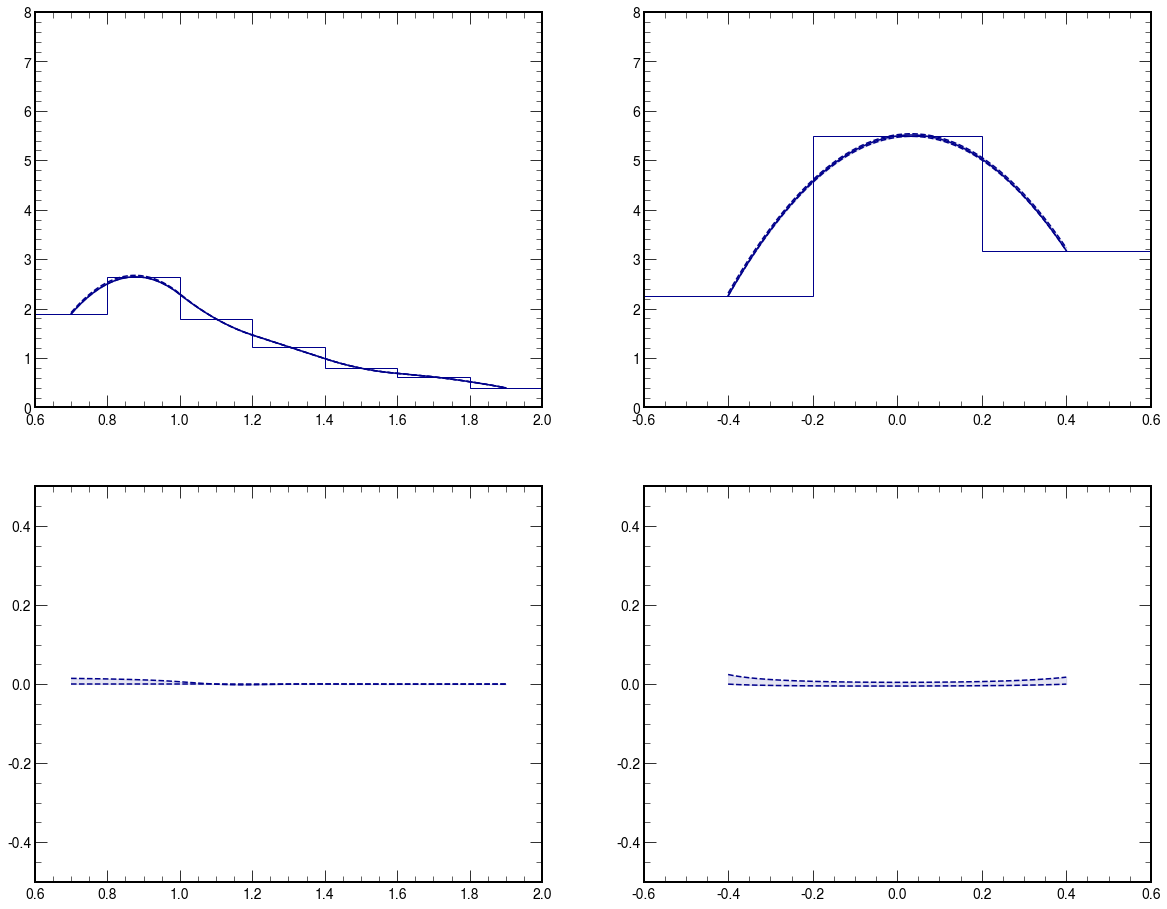

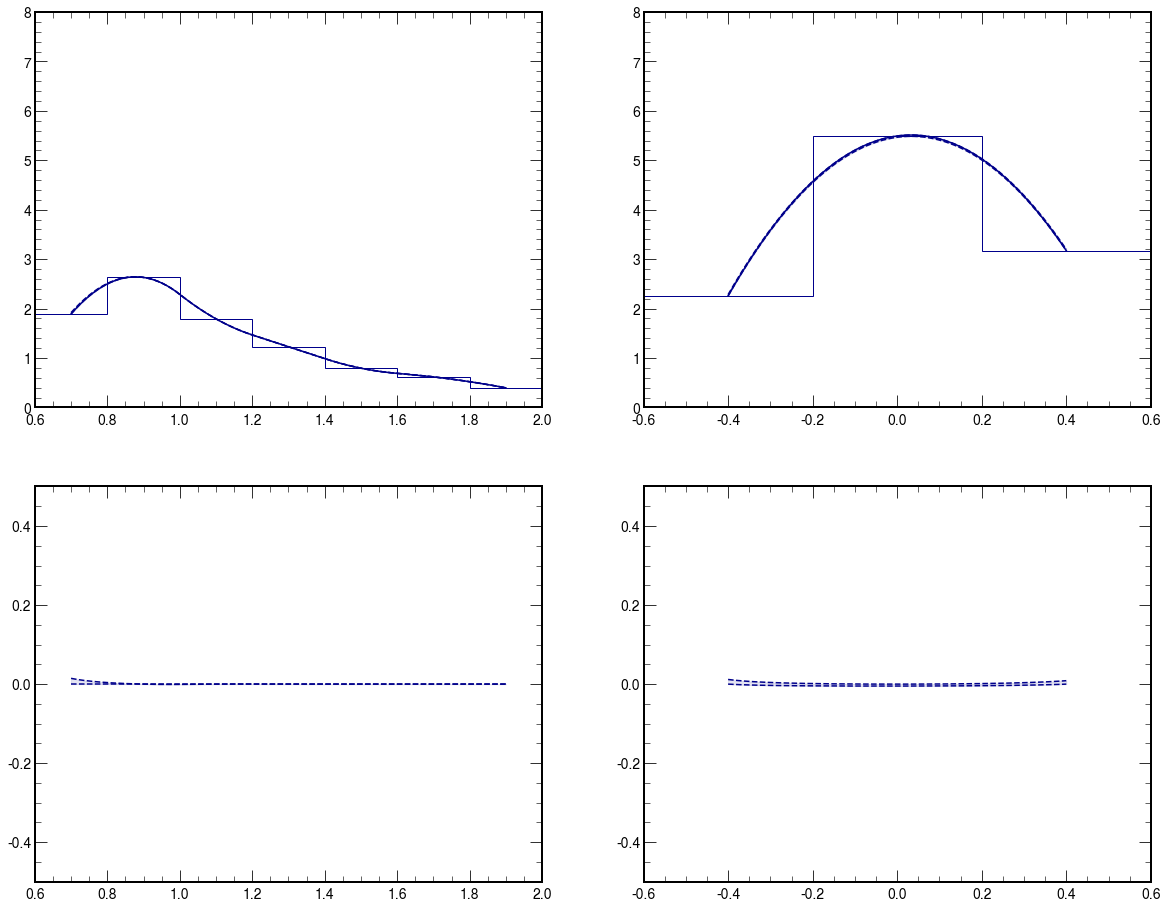

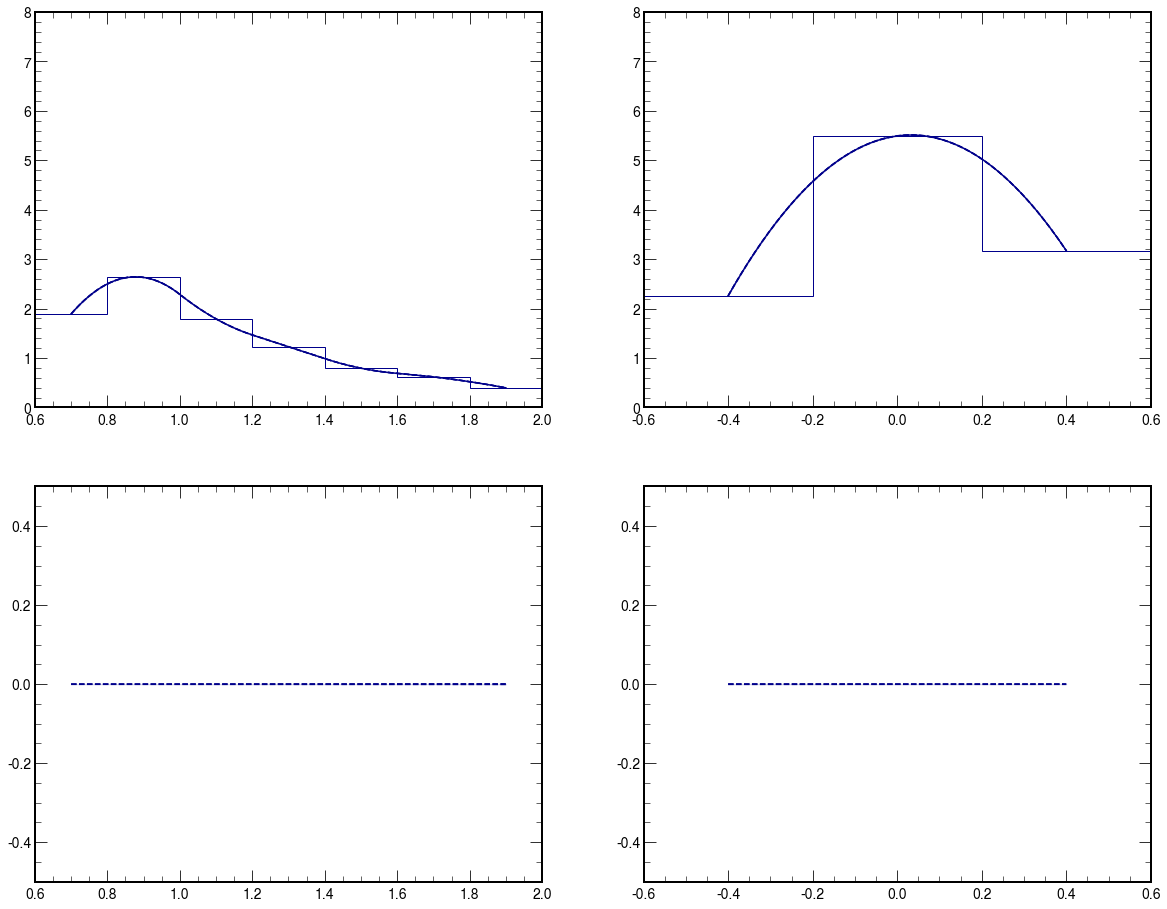

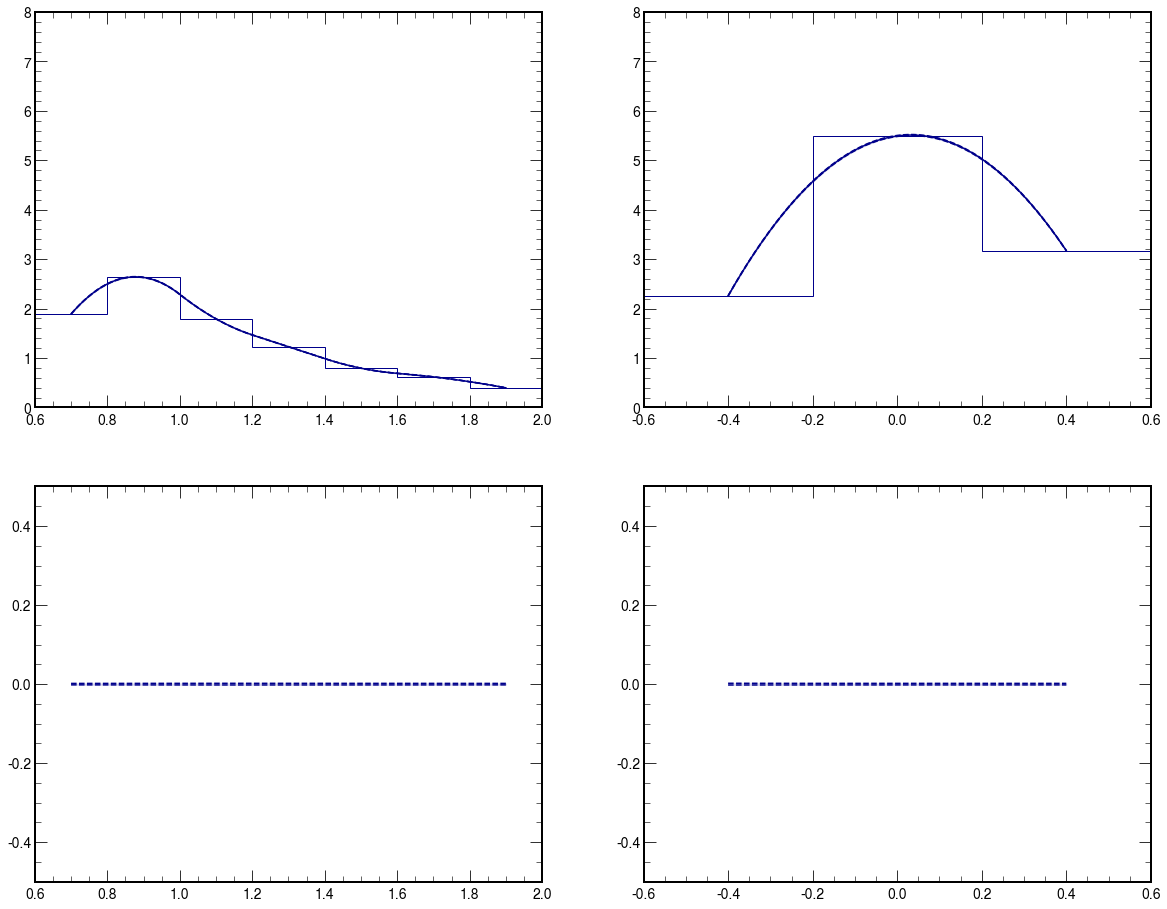

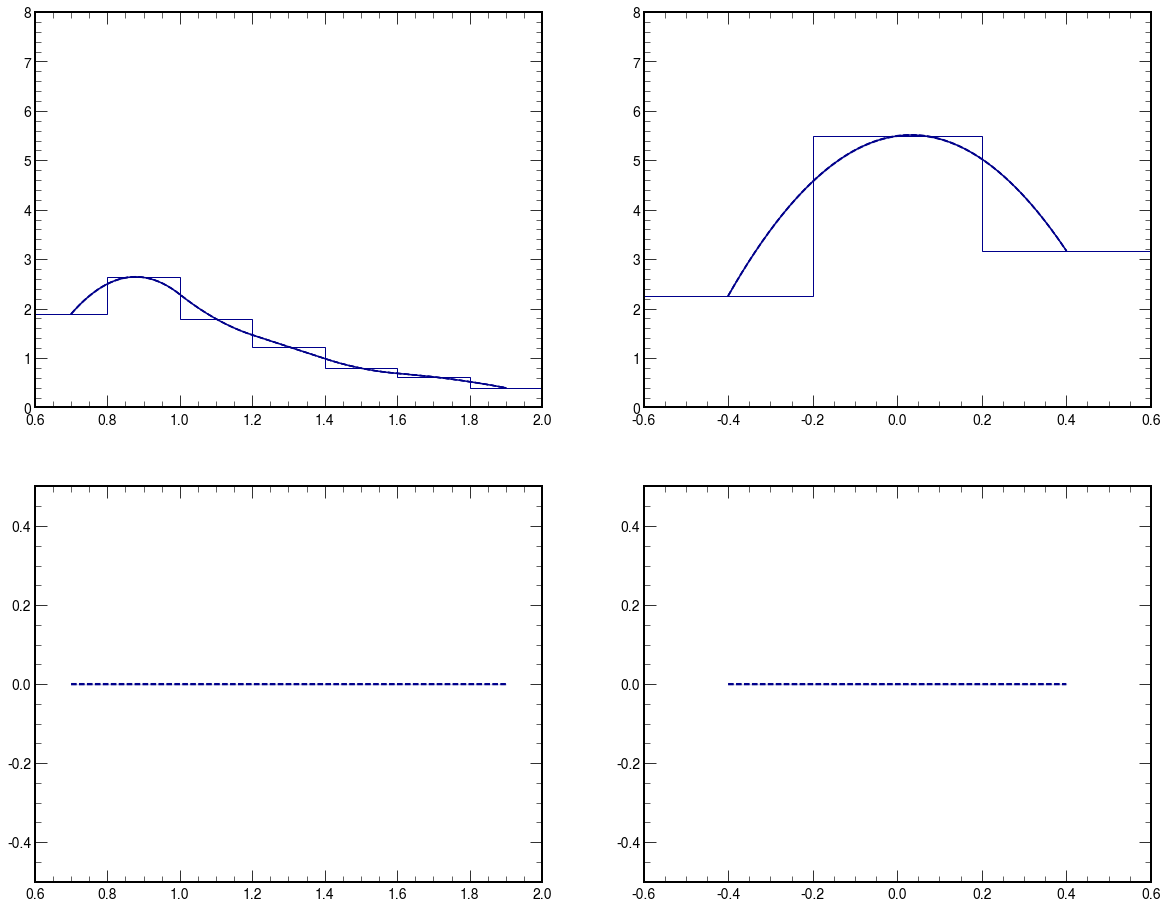

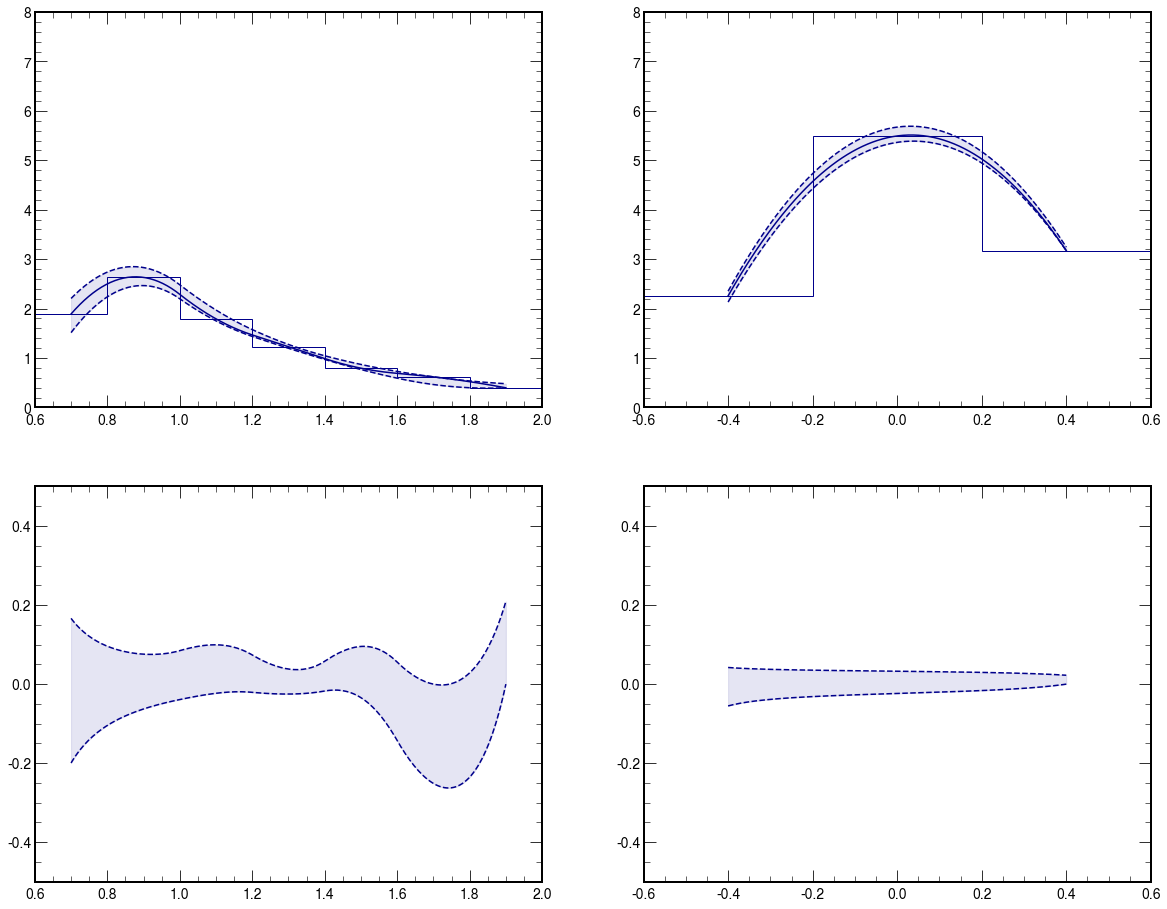

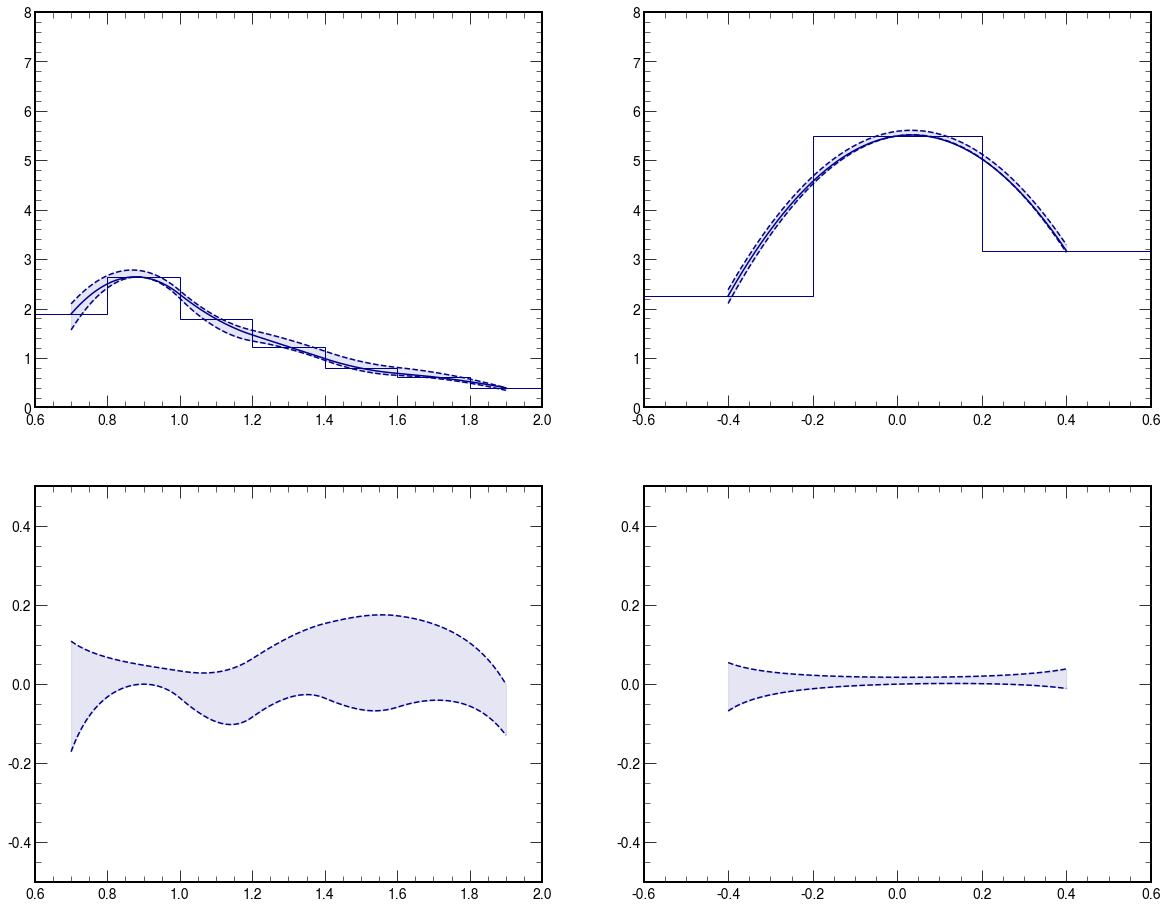

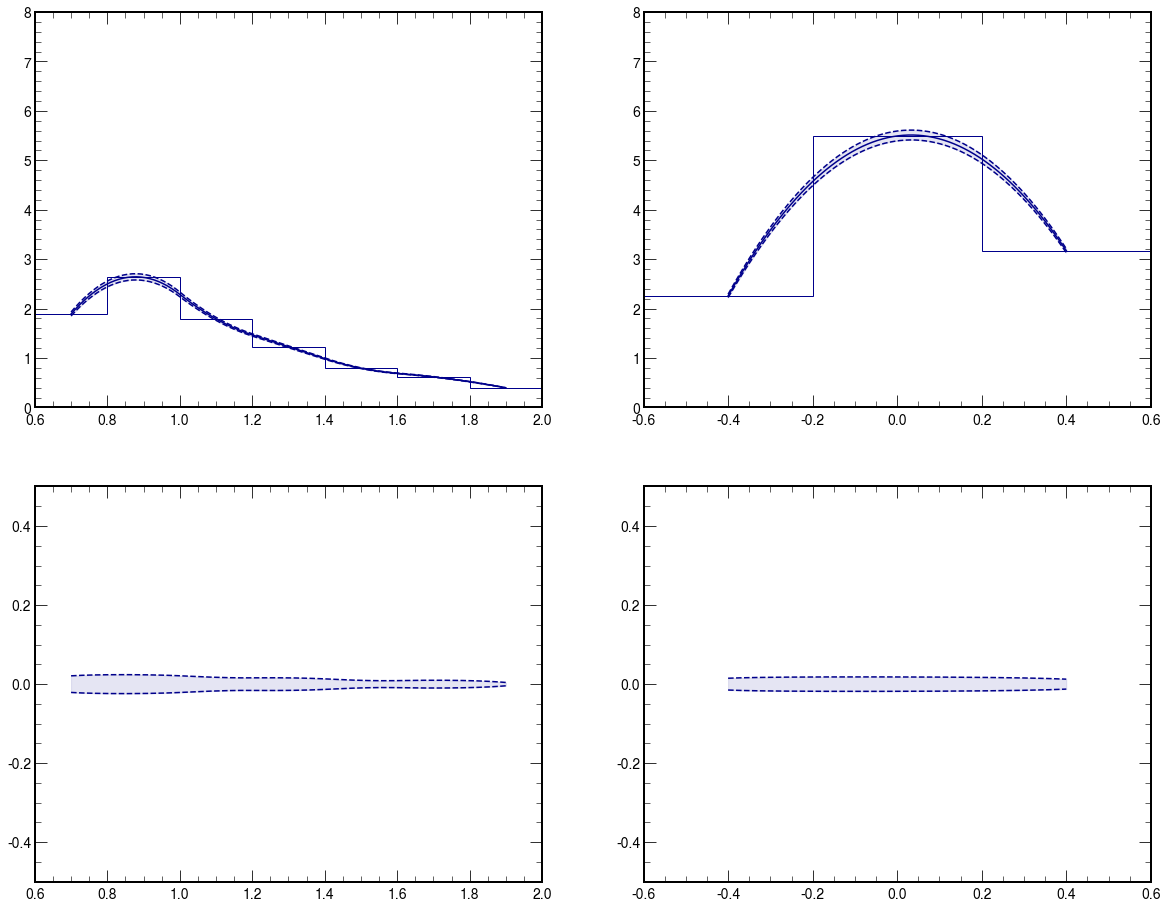

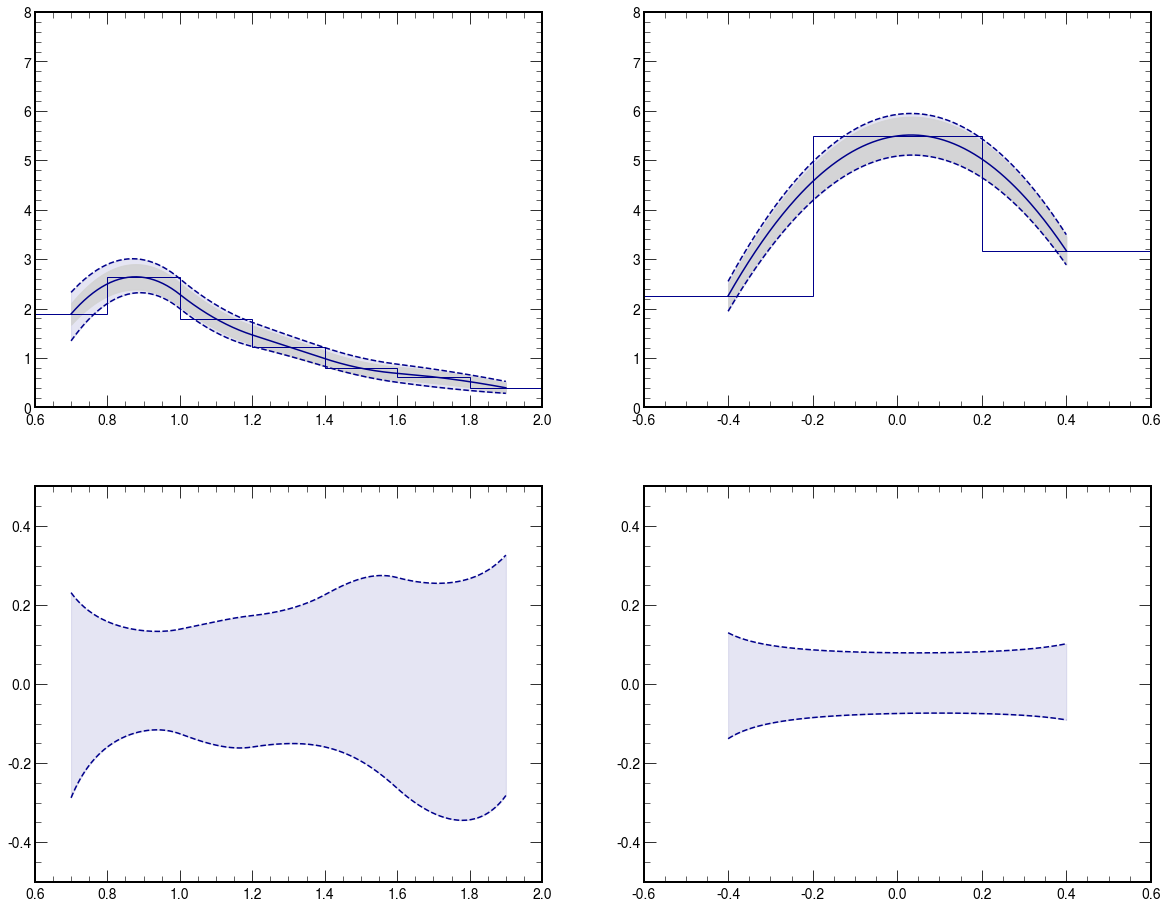

In [88]:
if data_sample == '2018':
    # ylim_ = (0.,0.3)
    ylim_ = (0.,8.)
    ylim_ratio_ = (-0.50,0.50)
    color_ = "darkblue"

    counts = {}
    err = {}
    bins = {}
    max_variations_total = {}
    min_variations_total = {}

    label_ = ""
    coupling_str_ = "A0W1e-6"
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

    counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        lepton_type=lepton_type,
        label=label_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_
        )

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[1.91759134 2.6588116  1.79157552 1.22662853 0.79327622 0.61785229
 0.39633669]
[1.88999056 2.63047188 1.79157552 1.22662853 0.79327622 0.61785229
 0.39633669]
0      0.014604
1      0.014537
2      0.014469
3      0.014398
4      0.014325
         ...   
195    0.000024
196    0.000019
197    0.000013
198    0.000007
199    0.000000
Length: 200, dtype: float64 0.0030166885107872337
0      2.349690e-16
1      2.288964e-16
2      2.233238e-16
3      2.182014e-16
4      2.134860e-16
           ...     
195   -1.295233e-16
196   -1.319615e-16
197    0.000000e+00
198    0.000000e+00
199    0.000000e+00
Length: 200, dtype: float64 -2.4149729079343317e-16
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.31148342 5.51784179 3.2270443 ]
[2.25661259 5.46626905 3.17110379]
0      0.024316
1      0.023423
2      0.022584
3      0.021793
4      0.021048
         ...   
195    0.015873
196    0.016288
197    0.0167

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[1.92968877 2.69266596 1.82244653 1.24607318 0.80084385 0.62392271
 0.39800374]
[1.85029234 2.56827781 1.76070452 1.20718387 0.78570859 0.61178187
 0.39466963]
0      0.021004
1      0.021317
2      0.021602
3      0.021862
4      0.022100
         ...   
195    0.005830
196    0.005464
197    0.005073
198    0.004654
199    0.004206
Length: 200, dtype: float64 0.015110691151757871
0     -0.021004
1     -0.021317
2     -0.021602
3     -0.021862
4     -0.022100
         ...   
195   -0.005830
196   -0.005464
197   -0.005073
198   -0.004654
199   -0.004206
Length: 200, dtype: float64 -0.015110691151756698
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[2.2902573  5.592777   3.21088341]
[2.22296788 5.39304252 3.13132418]
0      0.014909
1      0.015081
2      0.015241
3      0.015393
4      0.015535
         ...   
195    0.013237
196    0.013074
197    0.012905
198    0.012728
199    0.012

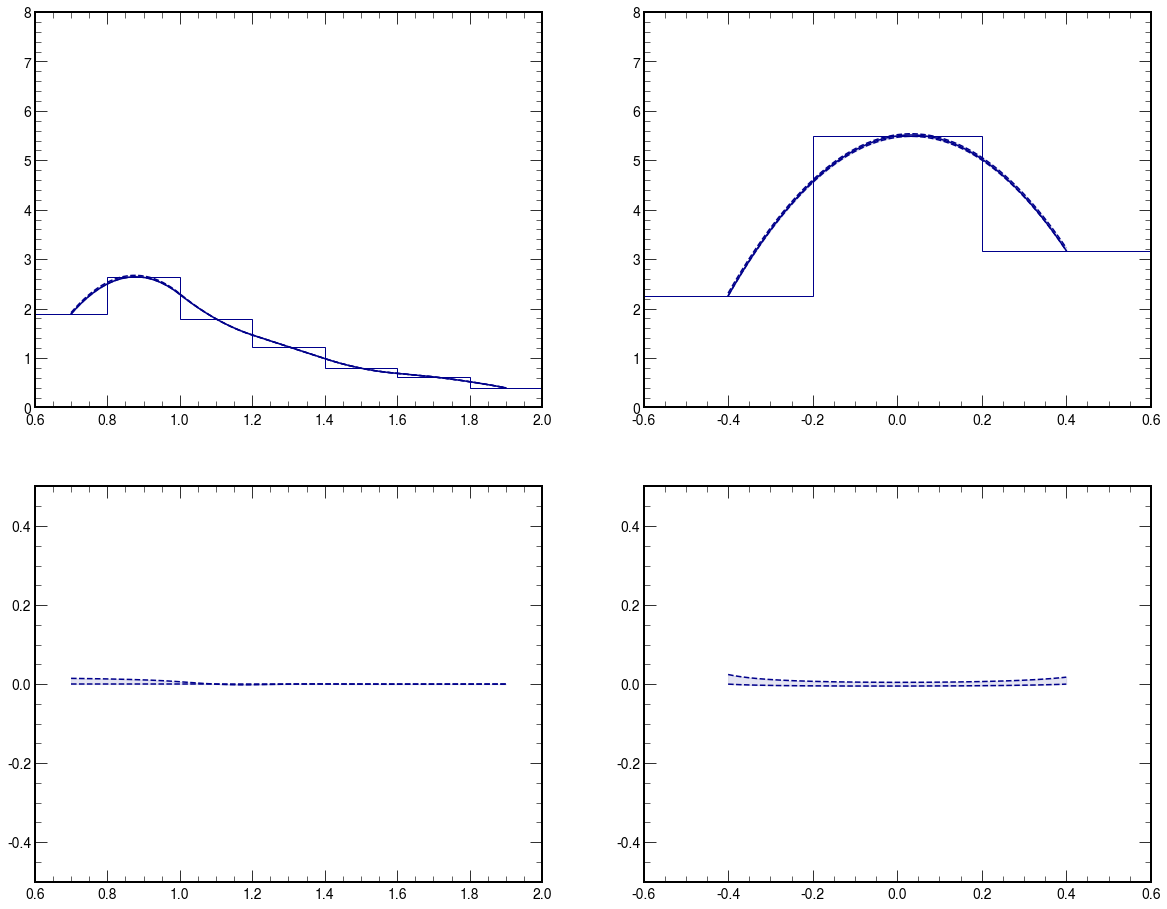

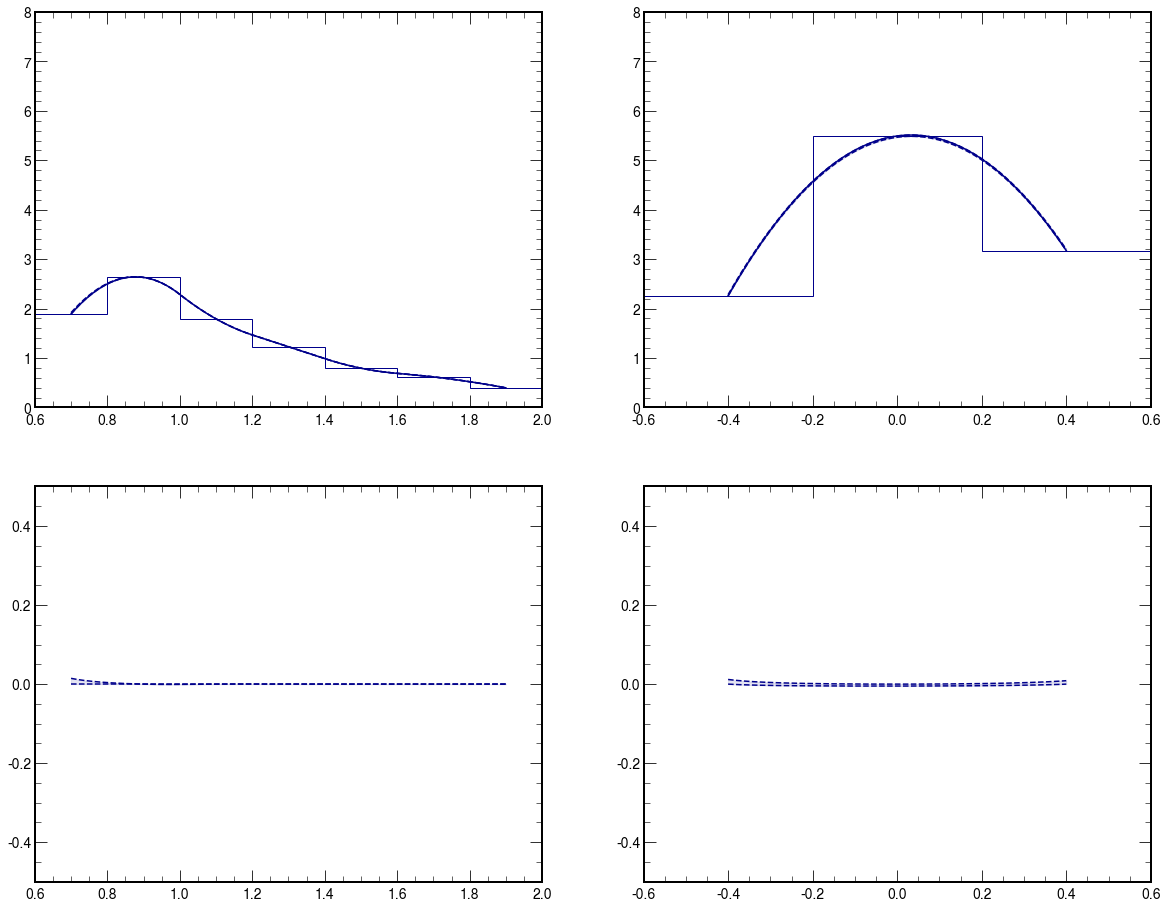

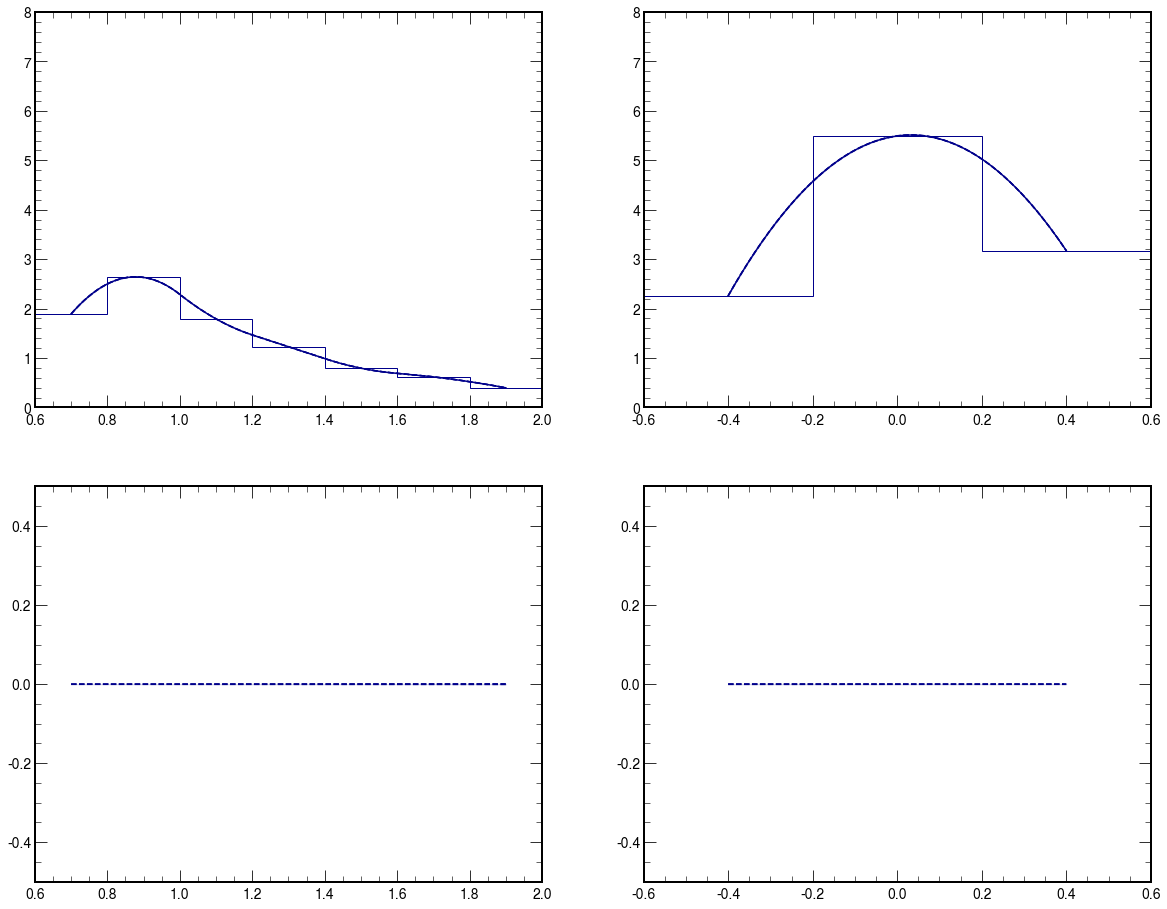

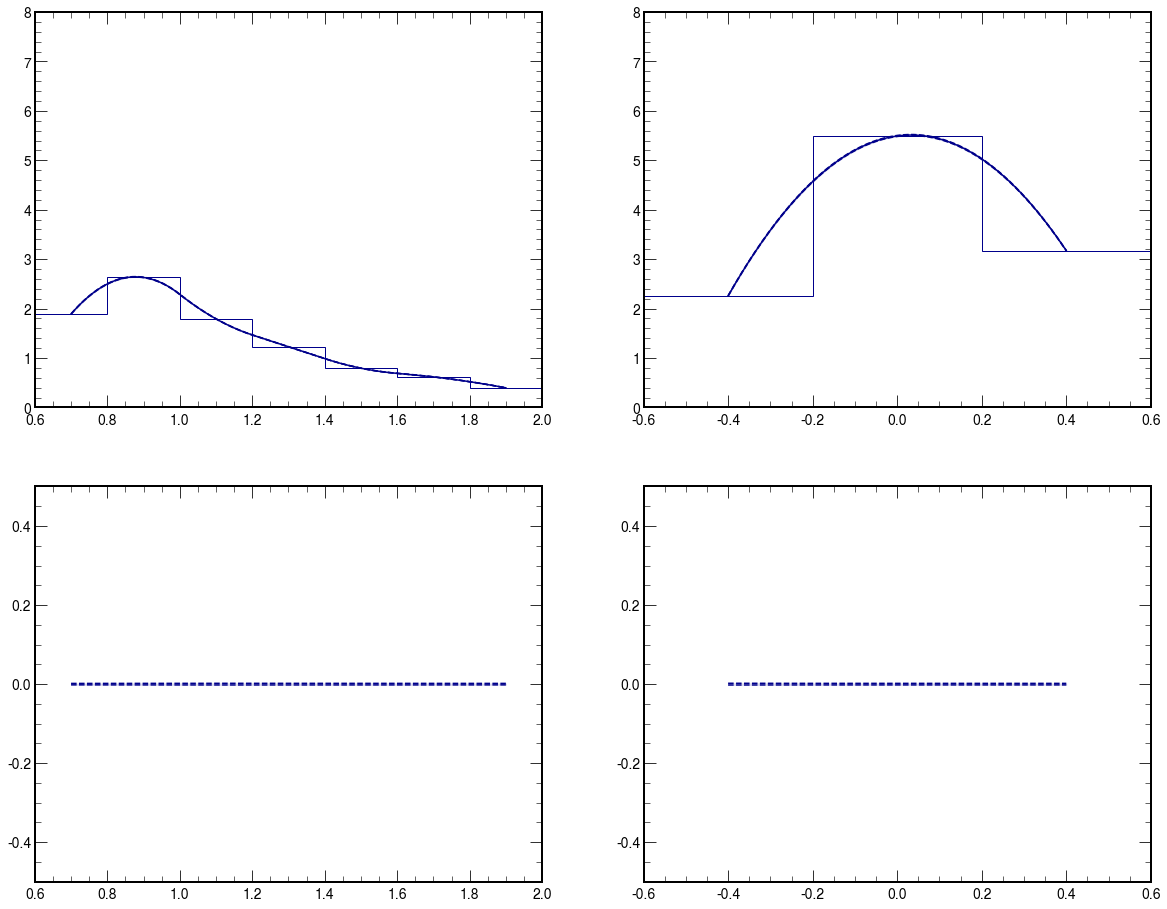

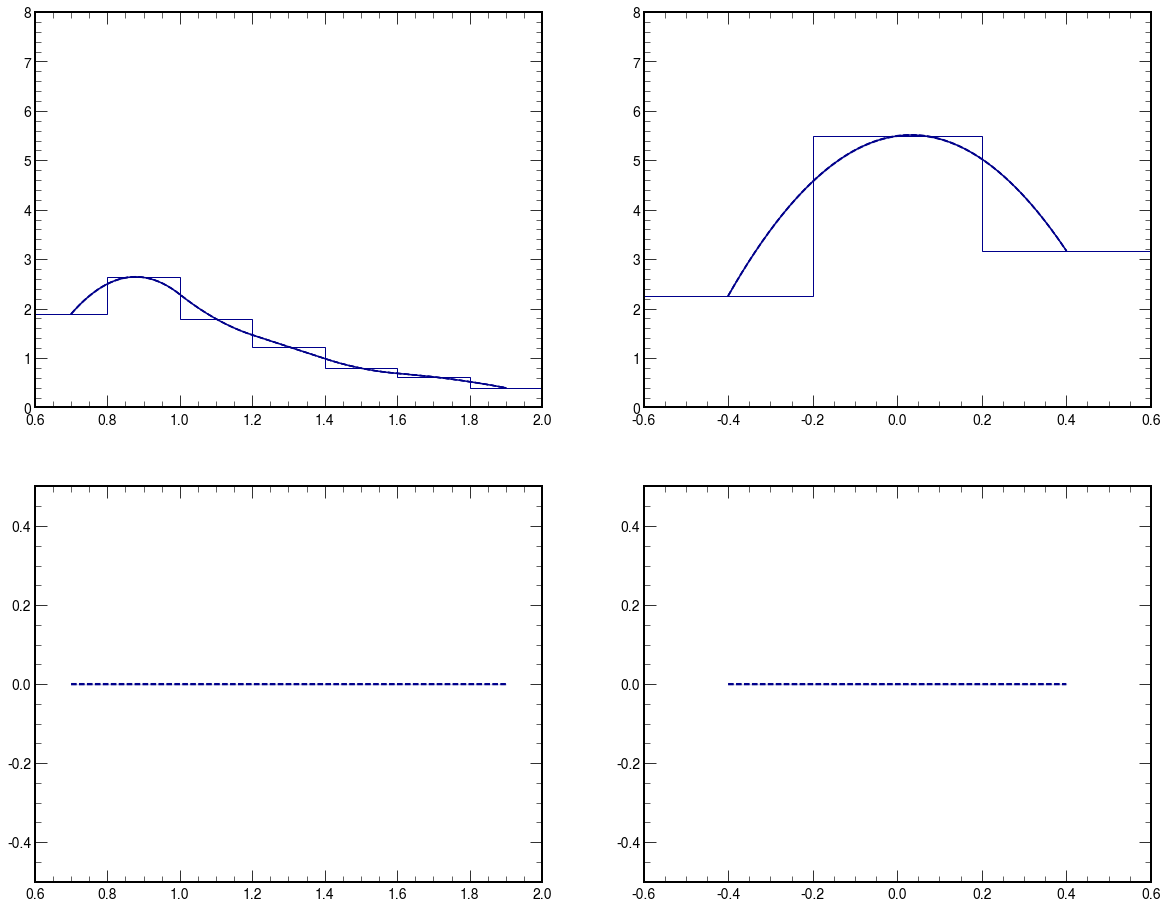

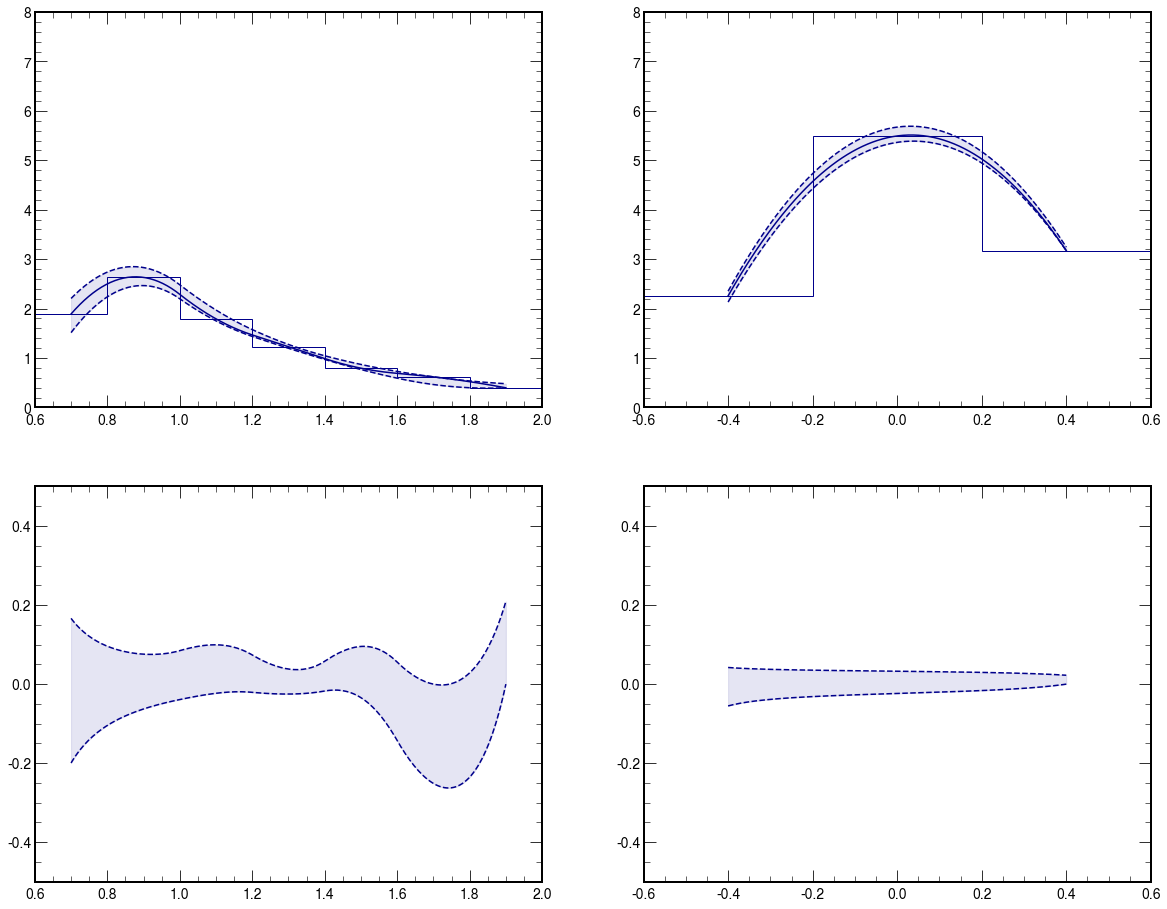

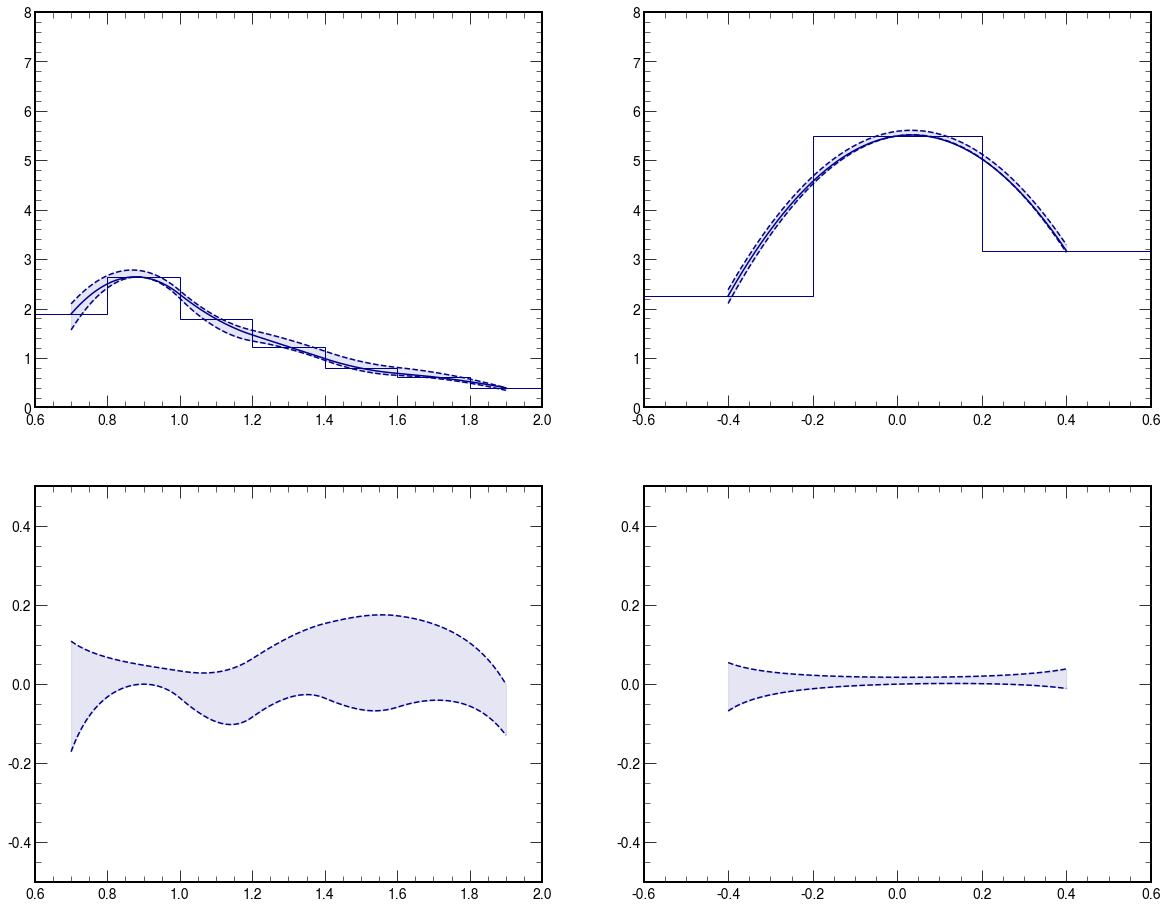

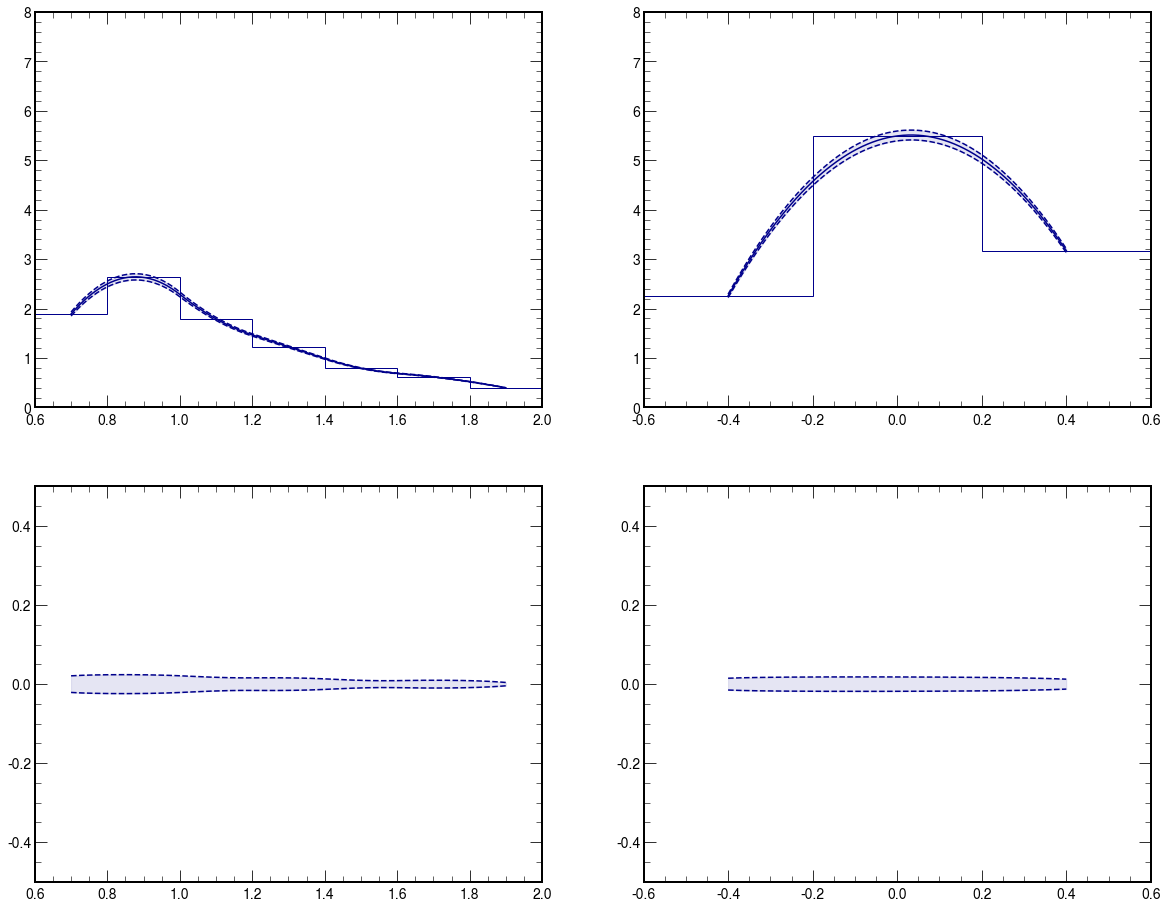

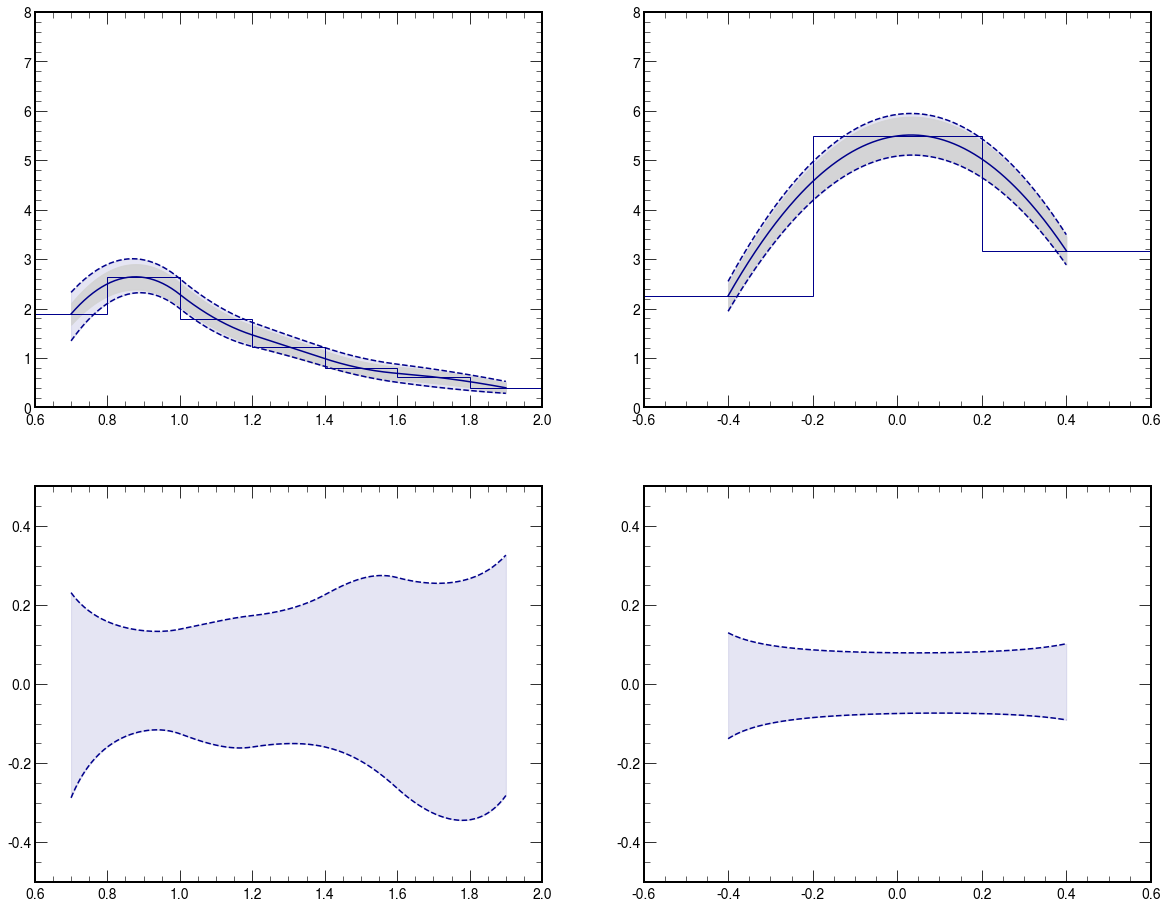

In [89]:
# ylim_ = (0.,0.3)
ylim_ = (0.,8.)
ylim_ratio_ = (-0.50,0.50)
color_ = "darkblue"

label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W1e-6"
#         label_ = "GGToWW-AQGC-muon-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )
    
if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W1e-6-Electron_2018.png", bbox_inches='tight' )

GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[3.49818336 9.3353836  6.34538274 5.32540073 3.6643696  2.15157587
 1.41044184]
[3.40402021 9.30248625 6.24542166 5.2195471  3.51208216 2.11813619
 1.37935749]
0      9.033560e-03
1      7.477090e-03
2      6.217444e-03
3      5.180848e-03
4      4.316273e-03
           ...     
195   -8.515833e-03
196   -6.612075e-03
197   -4.559469e-03
198   -2.356010e-03
199   -2.518866e-15
Length: 200, dtype: float64 0.002457686951755233
0     -0.018127
1     -0.016162
2     -0.014558
3     -0.013225
4     -0.012101
         ...   
195   -0.023685
196   -0.023297
197   -0.022893
198   -0.022474
199   -0.022039
Length: 200, dtype: float64 -0.015769453929900593
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 7.7551539  17.18392368 11.9655073 ]
[ 7.75151795 16.70042848 11.80468507]
0      0.000042
1      0.000441
2      0.000819
3      0.001178
4      0.001520
         ...   
195    0.001121
196    0.000884
197    0.0

GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
[3.46686523 9.3353836  6.28187918 5.2914086  3.60293168 2.18132211
 1.41044184]
[3.79983982 9.88287209 6.73165109 5.70566383 3.94409795 2.44645331
 1.62336671]
[3.13389063 8.7878951  5.83210727 4.87715336 3.26176541 1.91619092
 1.19751696]
[4.51247459 9.94725276 7.41446255 5.75209101 4.08311733 2.58508957
 1.73225338]
[2.98383761 8.13305268 5.55922876 4.81498868 3.06837899 1.67843884
 1.17403574]
0      0.301601
1      0.266186
2      0.237395
3      0.213578
4      0.193591
         ...   
195    0.224322
196    0.225353
197    0.226338
198    0.227276
199    0.228164
Length: 200, dtype: float64 0.14063889654669434
0     -0.139327
1     -0.138252
2     -0.137364
3     -0.136615
4     -0.135974
         ...   
195   -0.191905
196   -0.186362
197   -0.180468
198   -0.174218
199   -0.167611
Length: 200, dtype: float64 -0.14703963134794457
Diff_YWW_YX
[ 7.75482477 17.02529732 11.96395727]
[ 8.25546241 17.76581725 12.58328869]
[ 7.25418712 16.2847774 

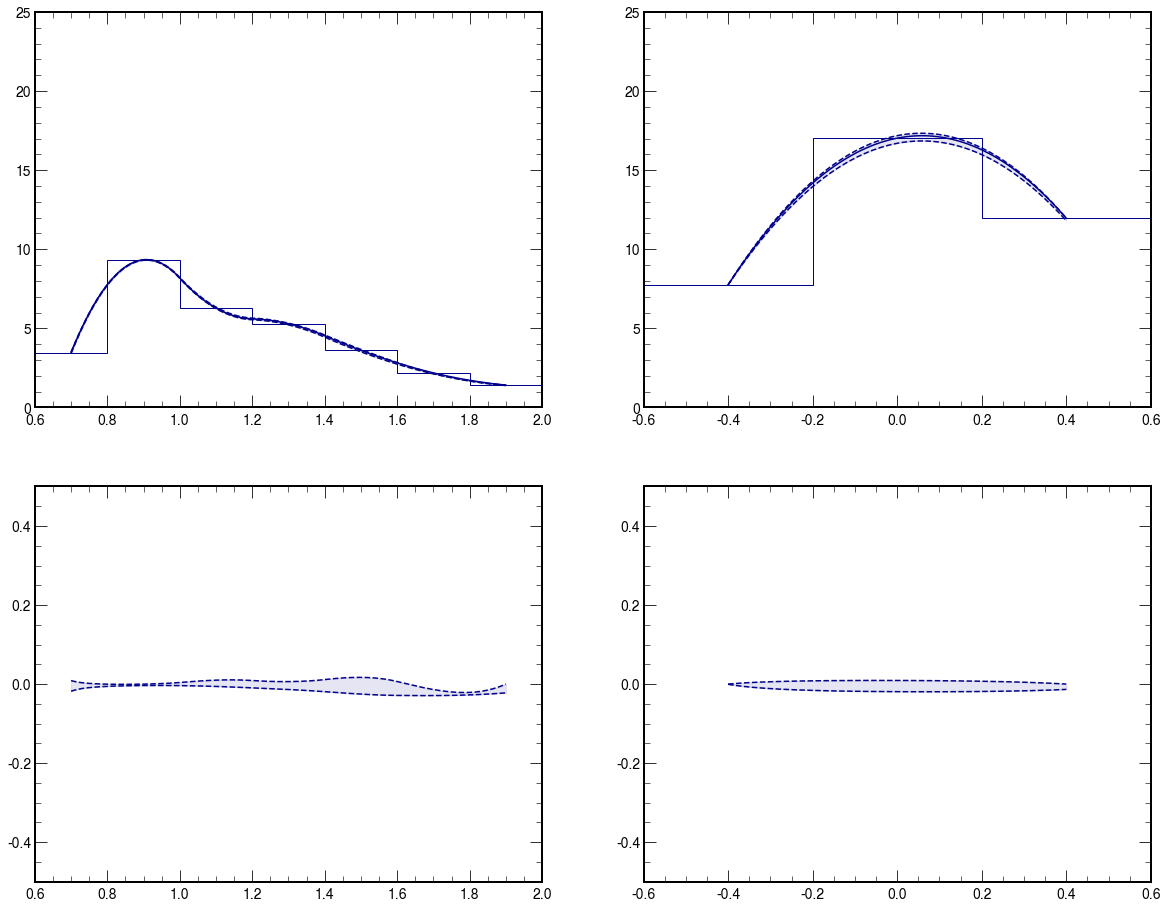

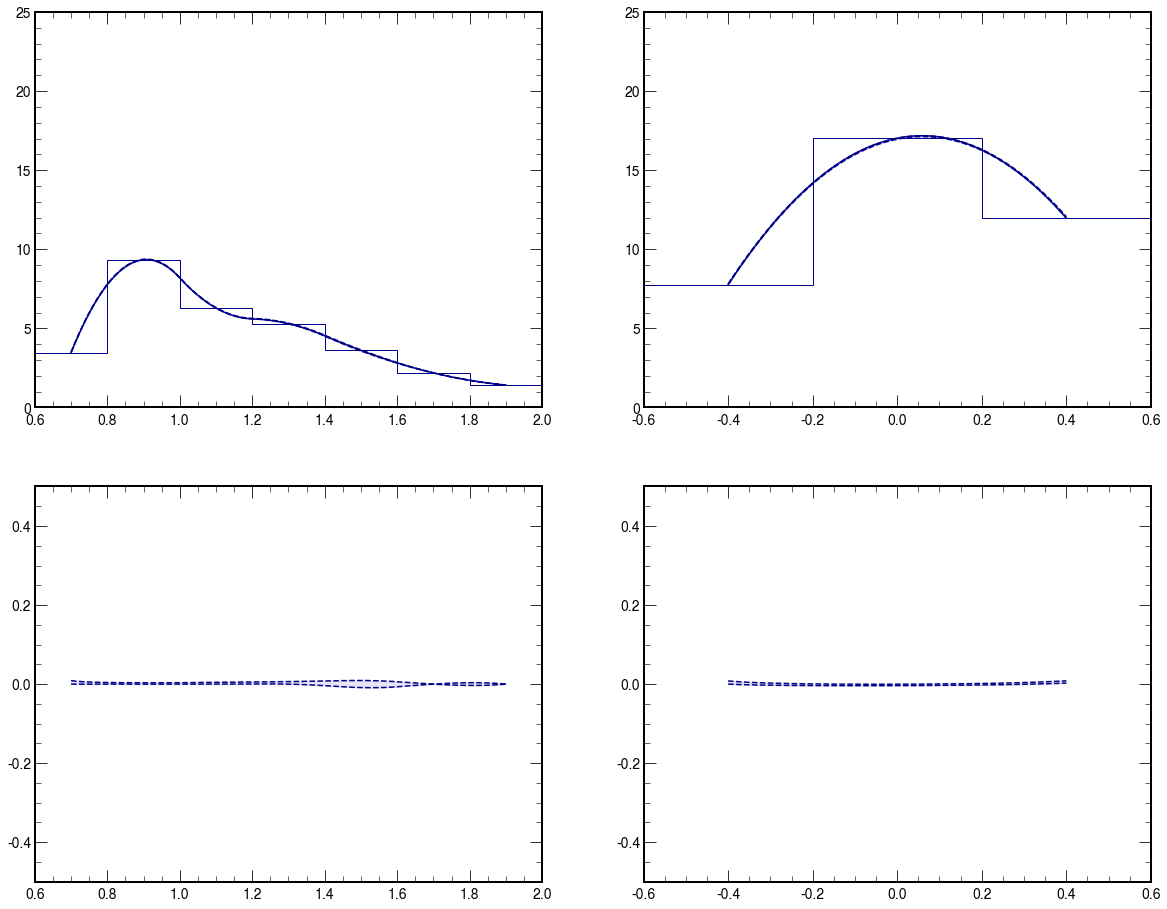

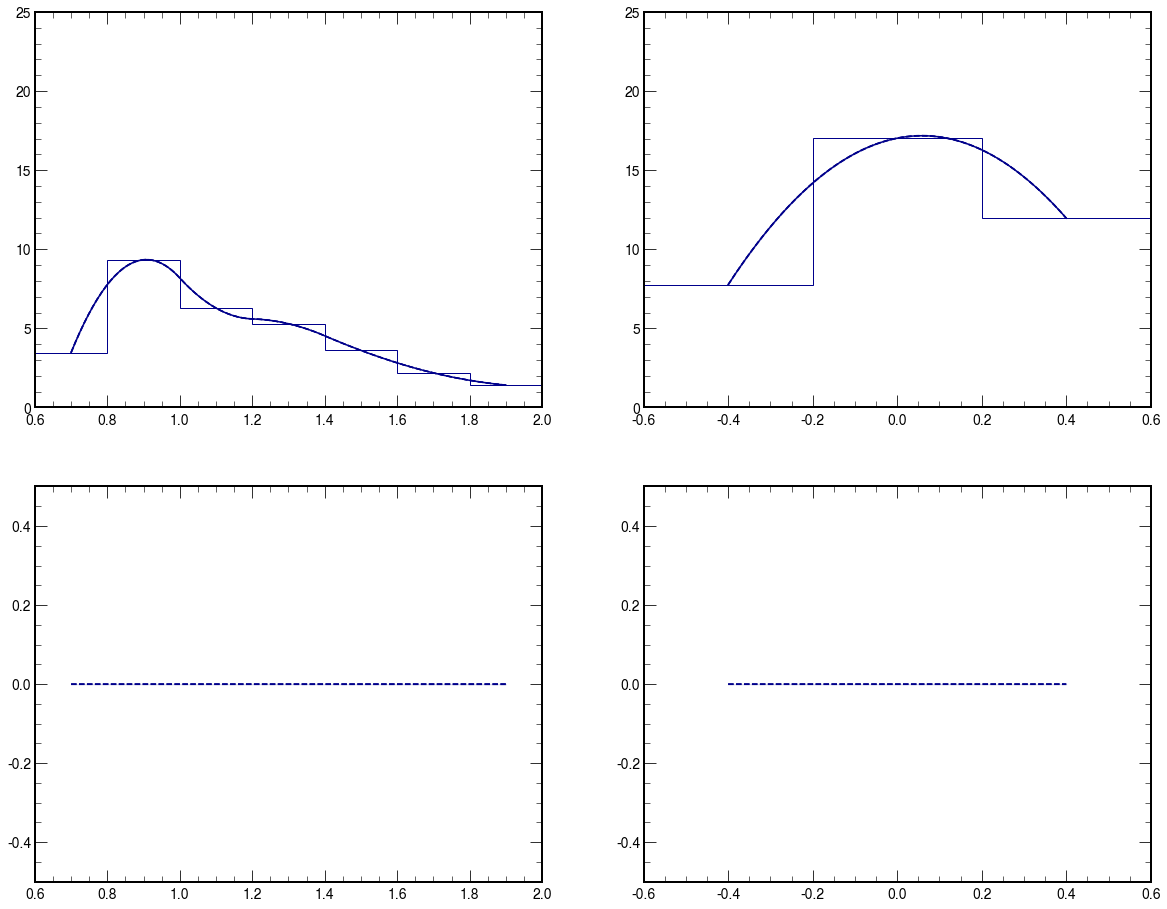

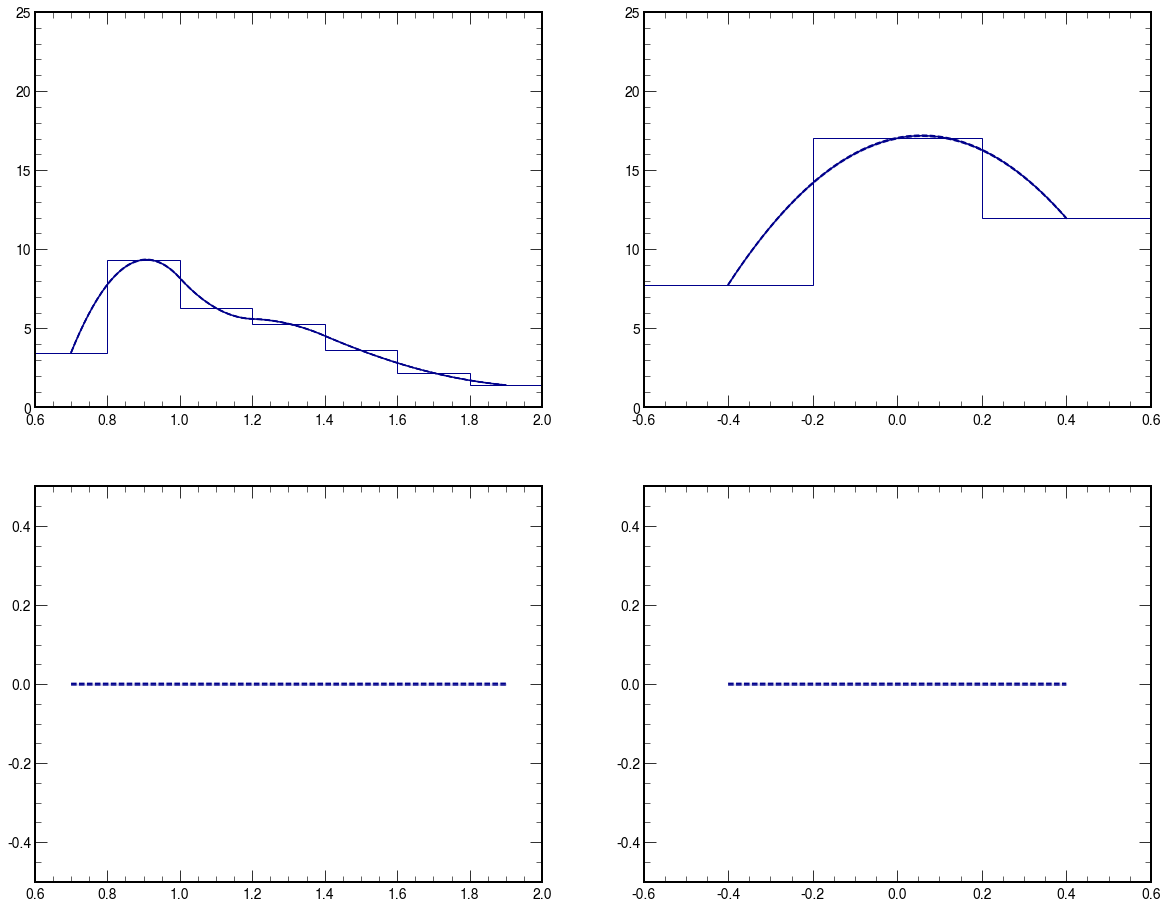

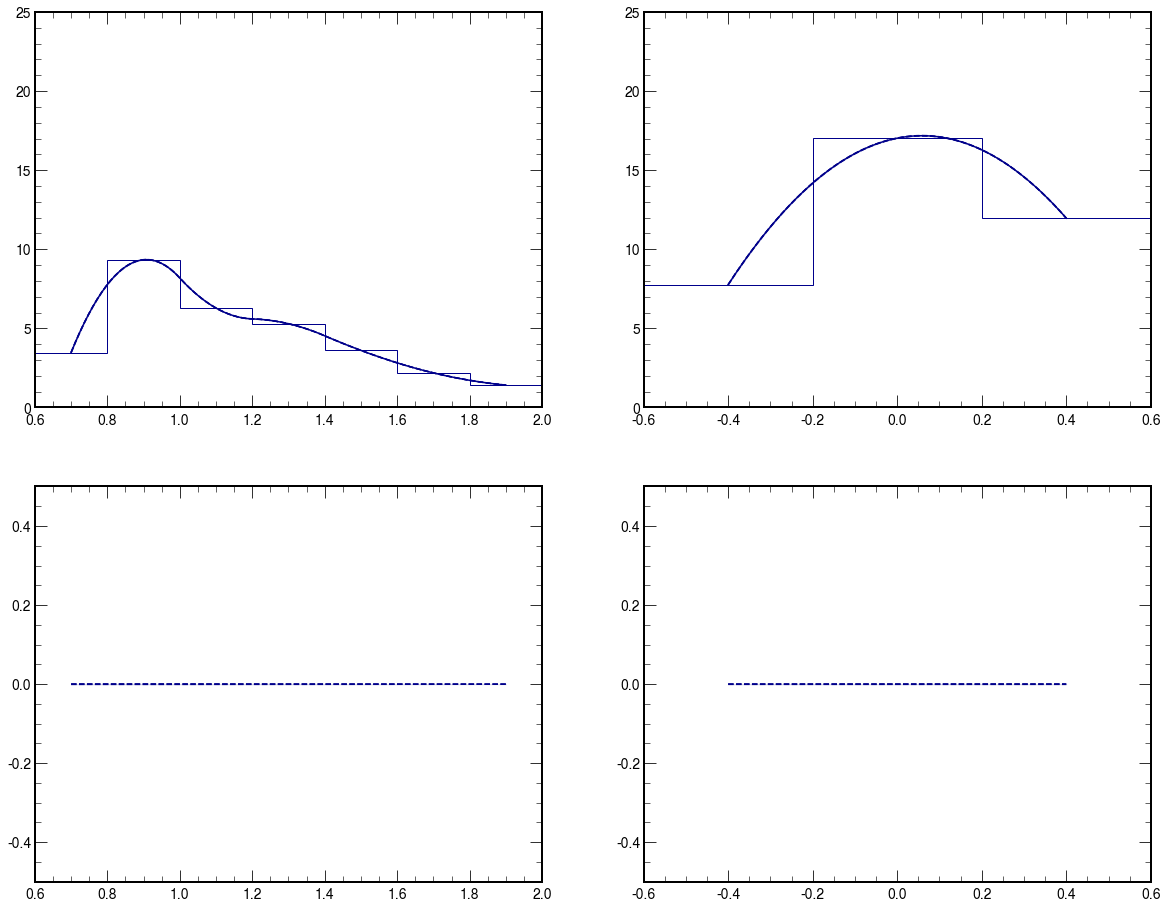

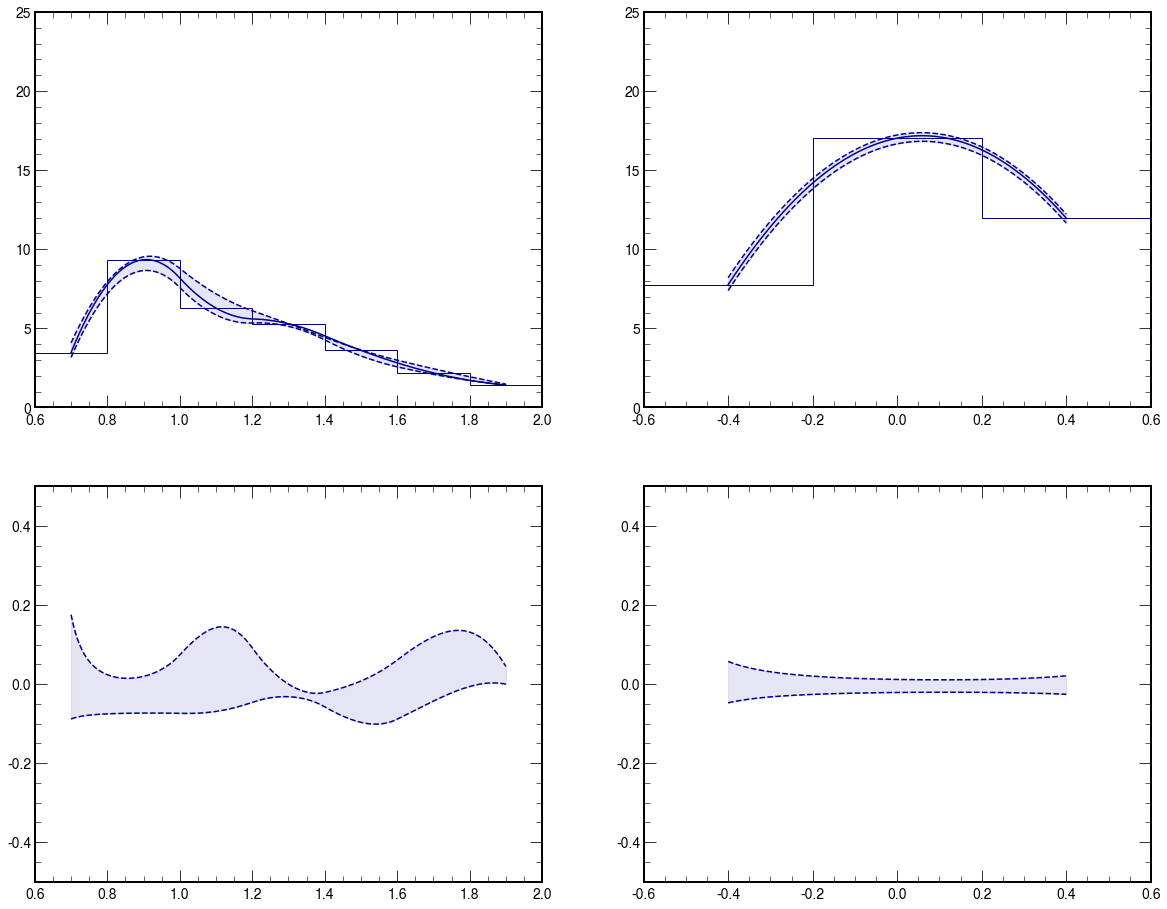

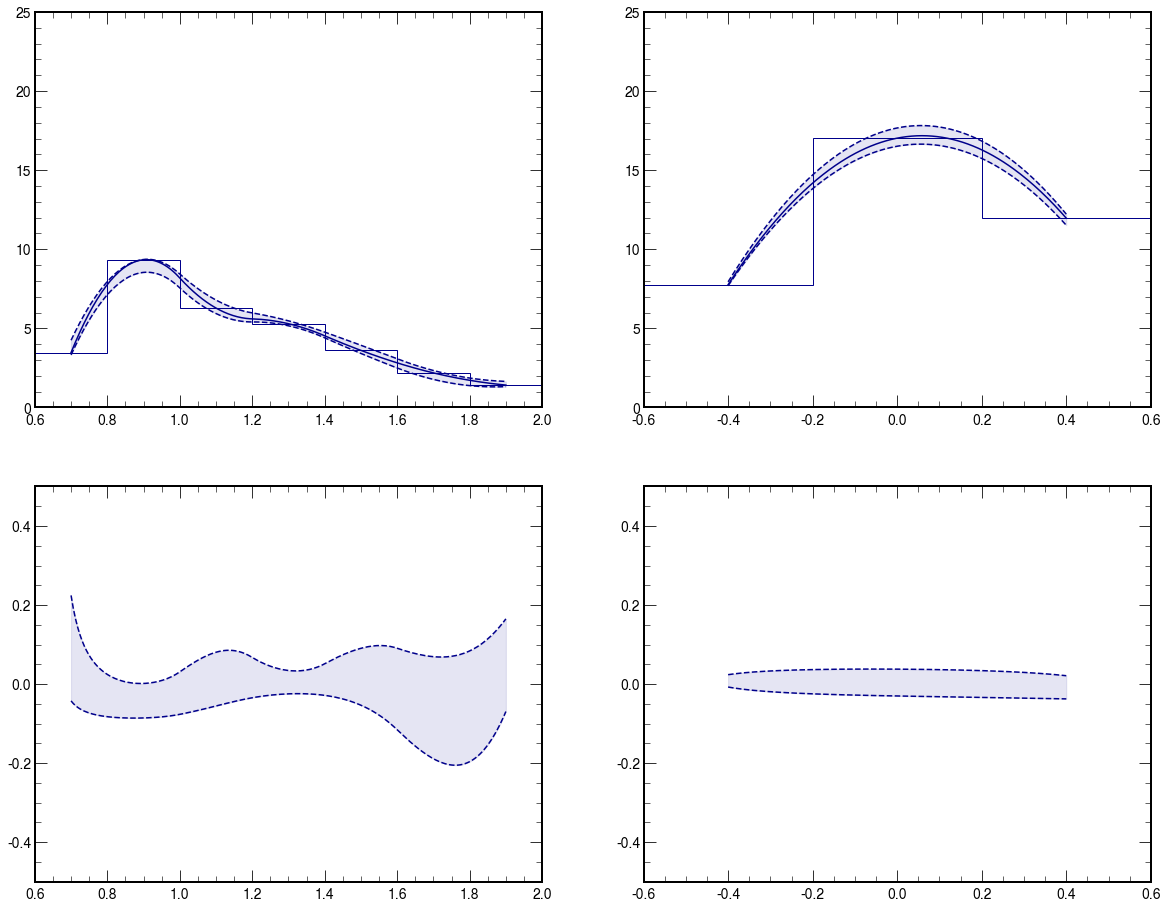

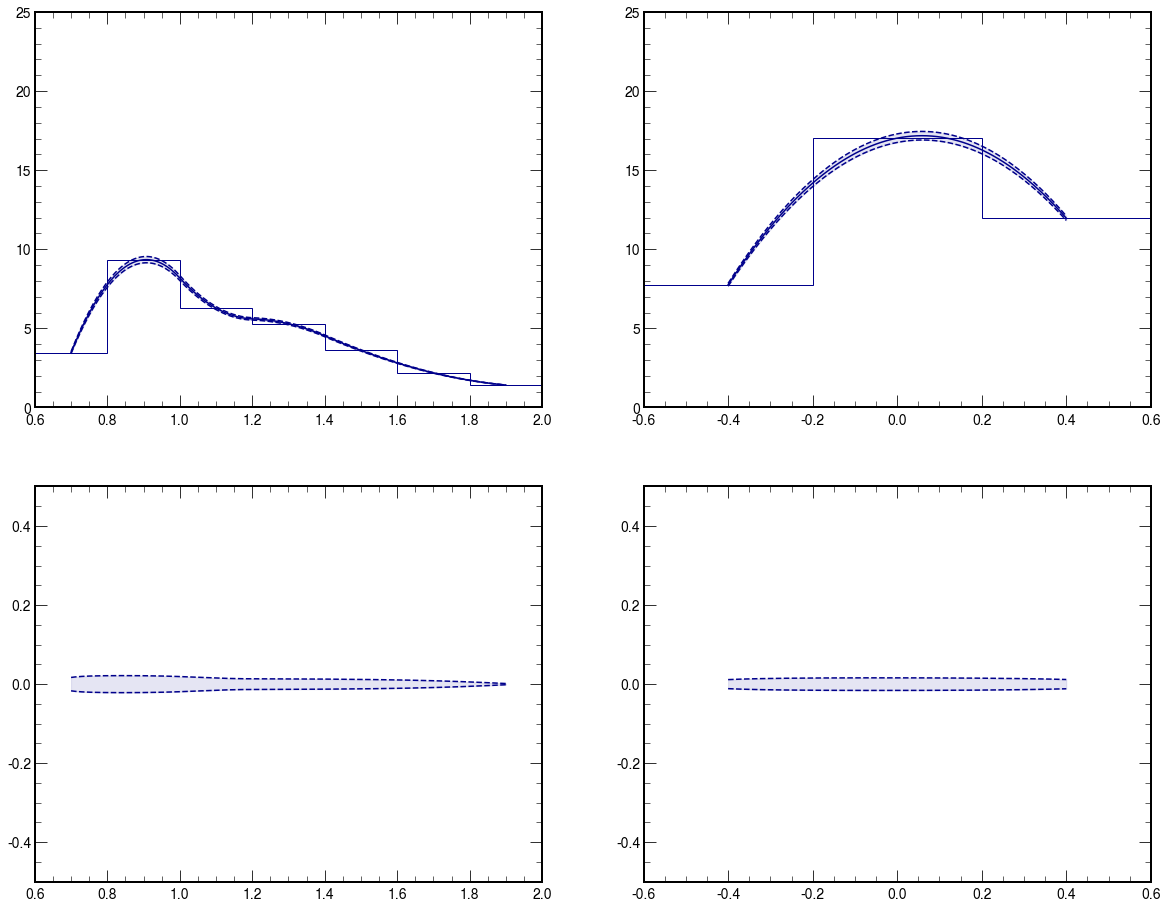

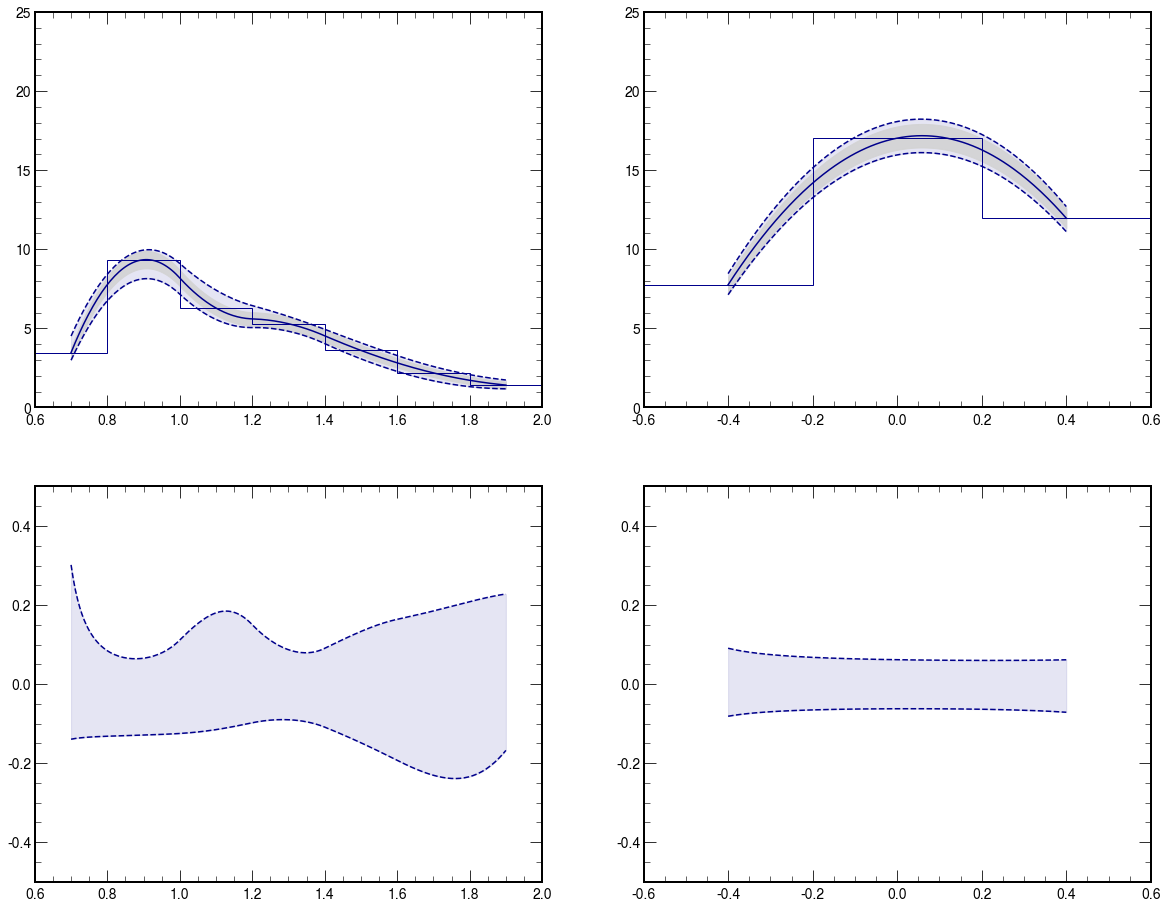

In [90]:
label_ = ""
coupling_str_ = "A0W2e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,25.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )
    
if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W2e-6-Electron_2018.png", bbox_inches='tight' )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[18.4634528  48.27918942 40.83631833 30.61068266 22.51617031 14.02301648
  8.74947188]
[18.30146382 48.03717893 40.51373904 30.05150992 22.21421668 13.77278945
  8.60131644]
0      0.008851
1      0.007944
2      0.007186
3      0.006544
4      0.005994
         ...   
195    0.011200
196    0.010828
197    0.010424
198    0.009987
199    0.009516
Length: 200, dtype: float64 0.007614066942066944
0      0.000000
1     -0.000381
2     -0.000701
3     -0.000973
4     -0.001208
         ...   
195   -0.007170
196   -0.007263
197   -0.007362
198   -0.007467
199   -0.007578
Length: 200, dtype: float64 -0.005025394088913191
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 38.65804674 102.42021402  69.25701381]
[ 38.43061318 101.23268708  68.14175153]
0      0.004128
1      0.004155
2      0.004181
3      0.004206
4      0.004229
         ...   
195    0.008843
196    0.008929
197    0.009017
198    0.009109
19

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
[18.30146382 48.19755337 40.67438322 30.20872408 22.37055382 13.86190782
  8.66699434]
[19.52174788 50.18292297 42.5012516  31.78408523 23.7231276  14.93072058
  9.51050941]
[17.08117976 46.21218377 38.84751484 28.63336293 21.01798004 12.79309506
  7.82347927]
[22.04670951 51.46817279 45.2783138  33.21139125 24.34001144 16.01481707
 10.59229117]
[15.27616836 42.65758057 36.98776804 28.38122946 20.0039029  11.81655336
  7.59063658]
0      0.204642
1      0.186105
2      0.170656
3      0.157608
4      0.146465
         ...   
195    0.219163
196    0.220123
197    0.220944
198    0.221619
199    0.222141
Length: 200, dtype: float64 0.11655529821160979
0     -0.165303
1     -0.160063
2     -0.155645
3     -0.151867
4     -0.148594
         ...   
195   -0.134425
196   -0.132113
197   -0.129638
198   -0.126998
199   -0.124190
Length: 200, dtype: float64 -0.1103311372513745
Diff_YWW_YX
[ 38.49912339 101.85921461  68.62544117]
[ 40.27549433 104.7424505

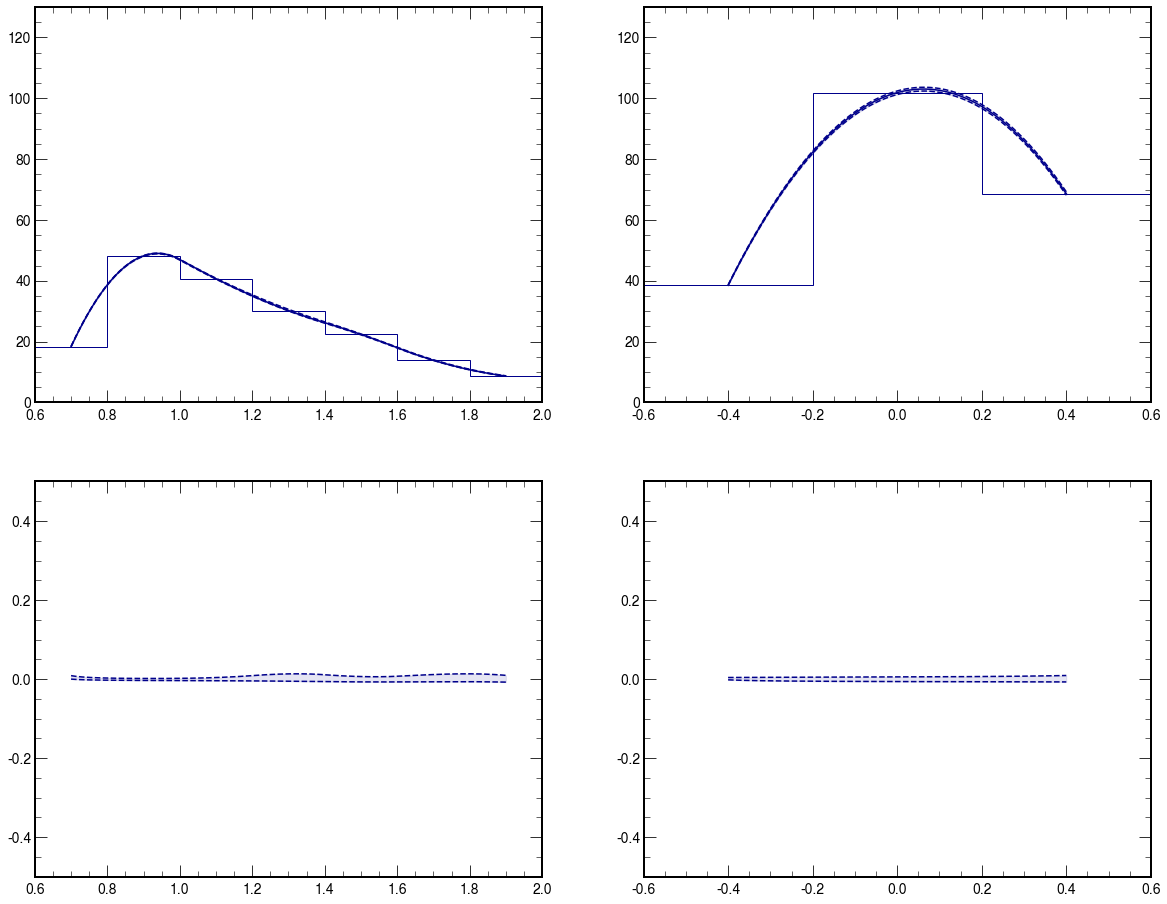

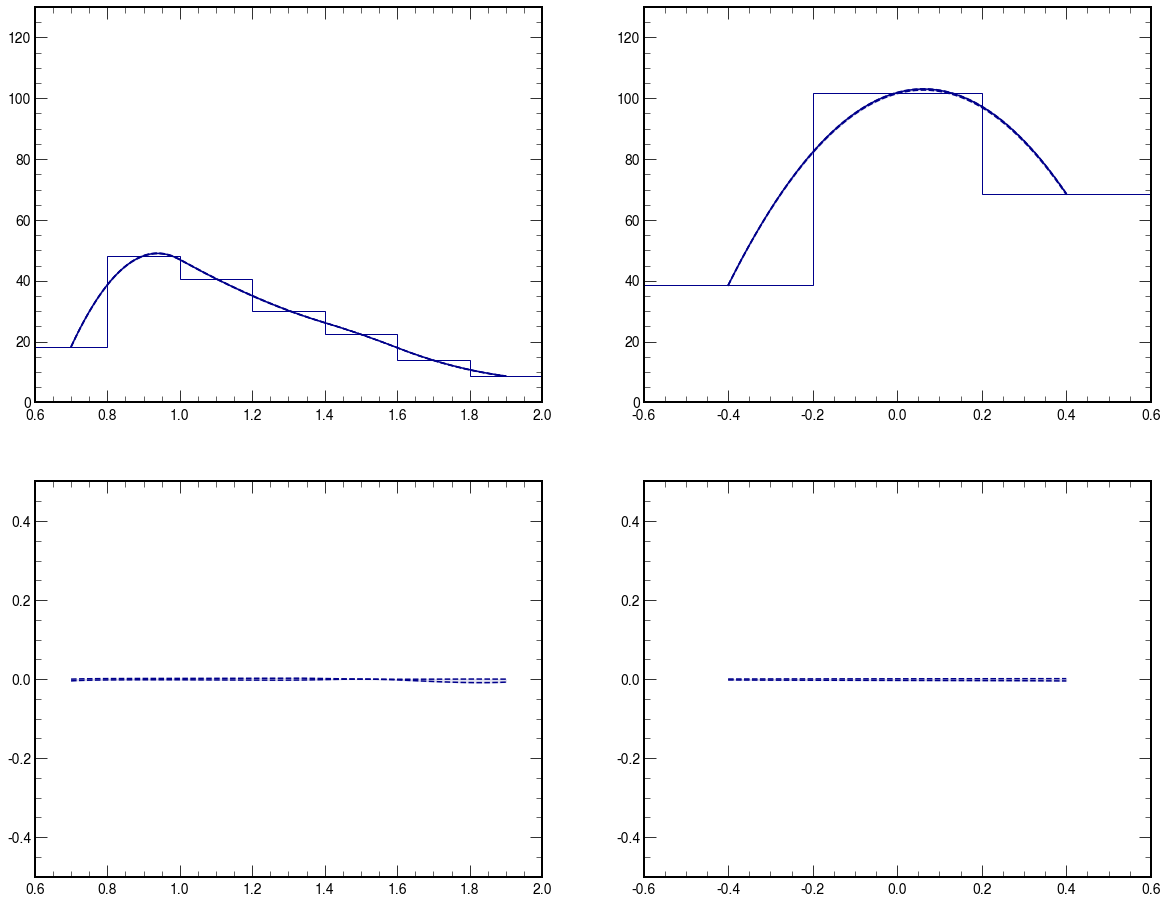

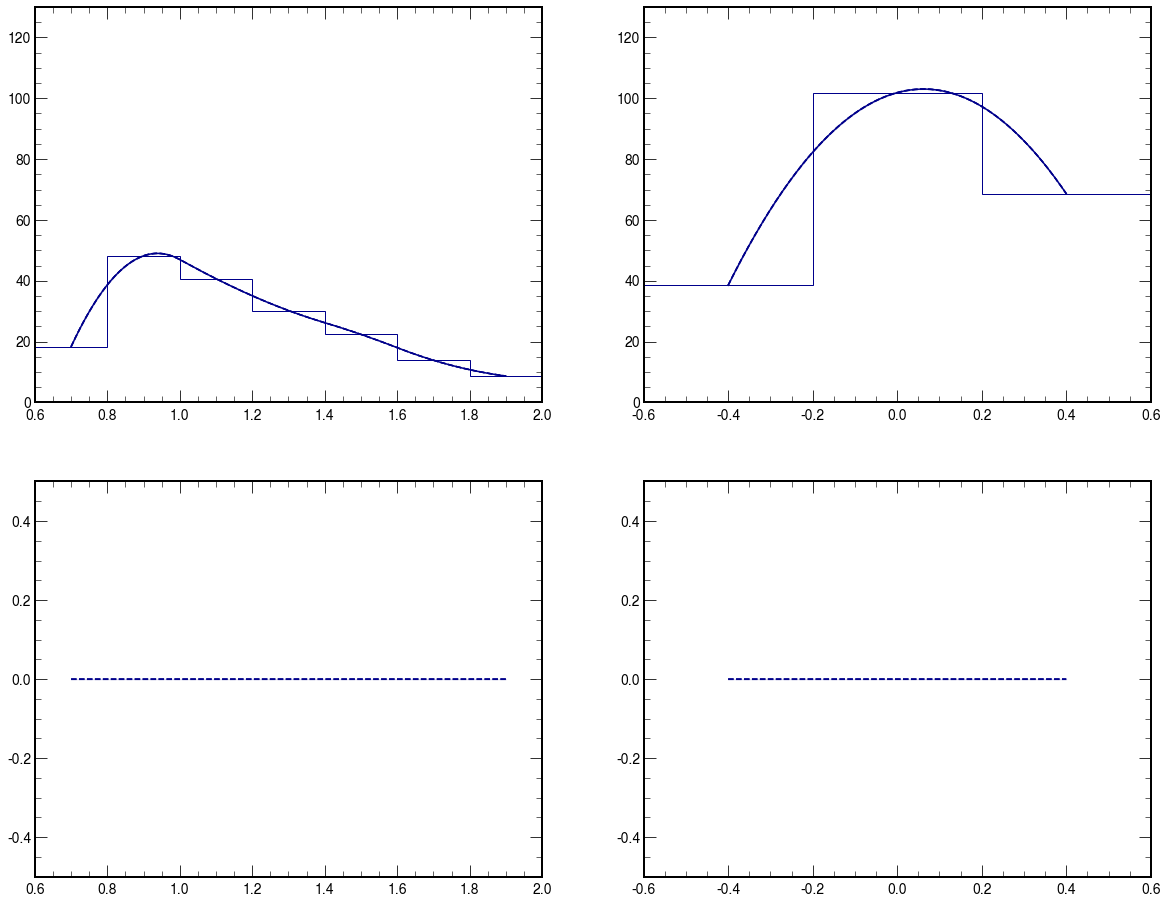

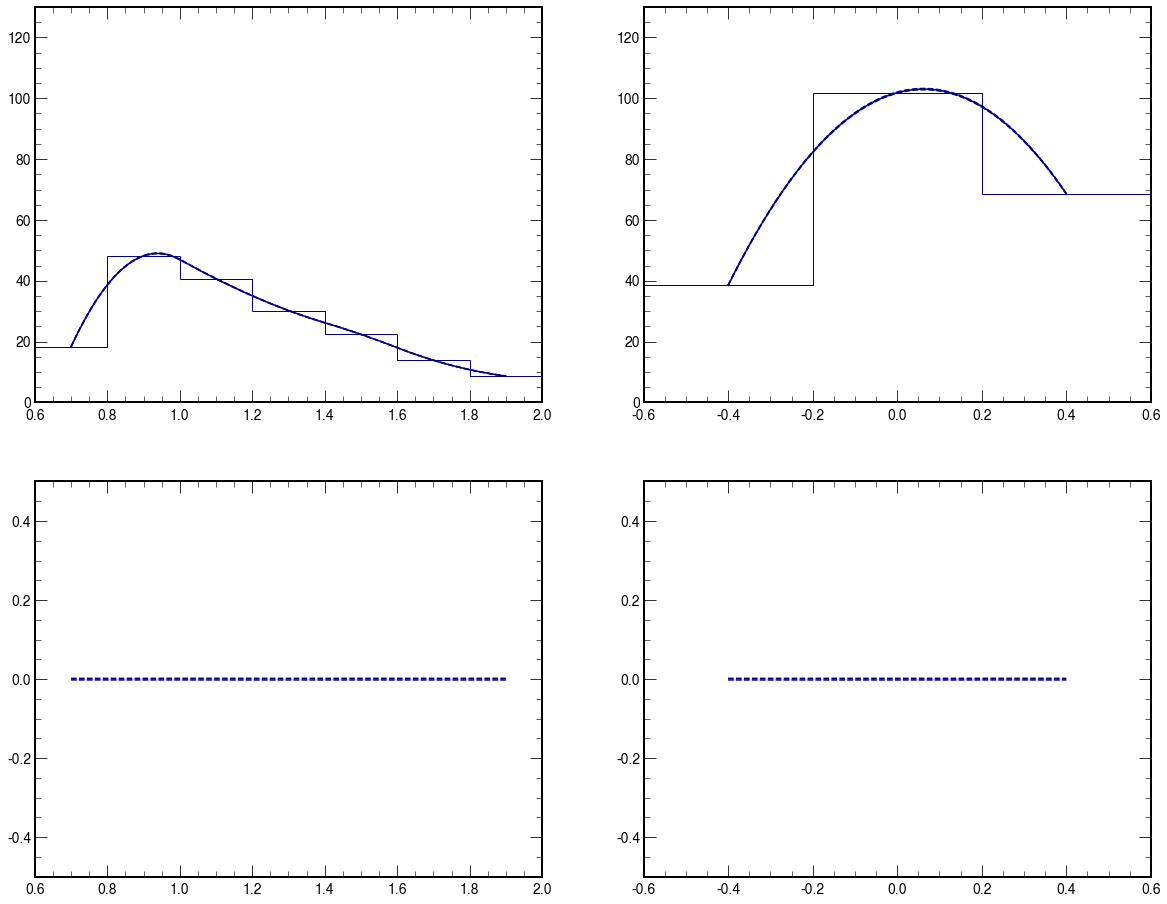

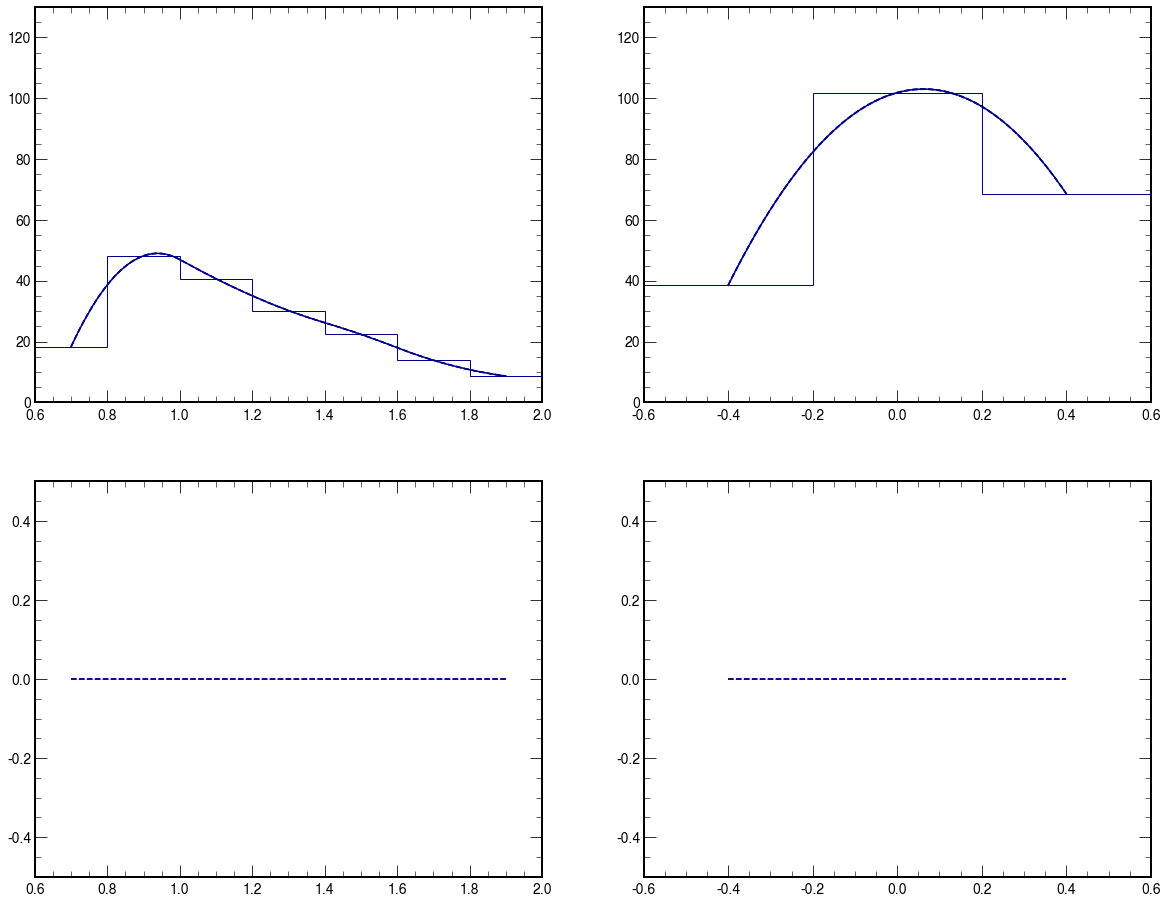

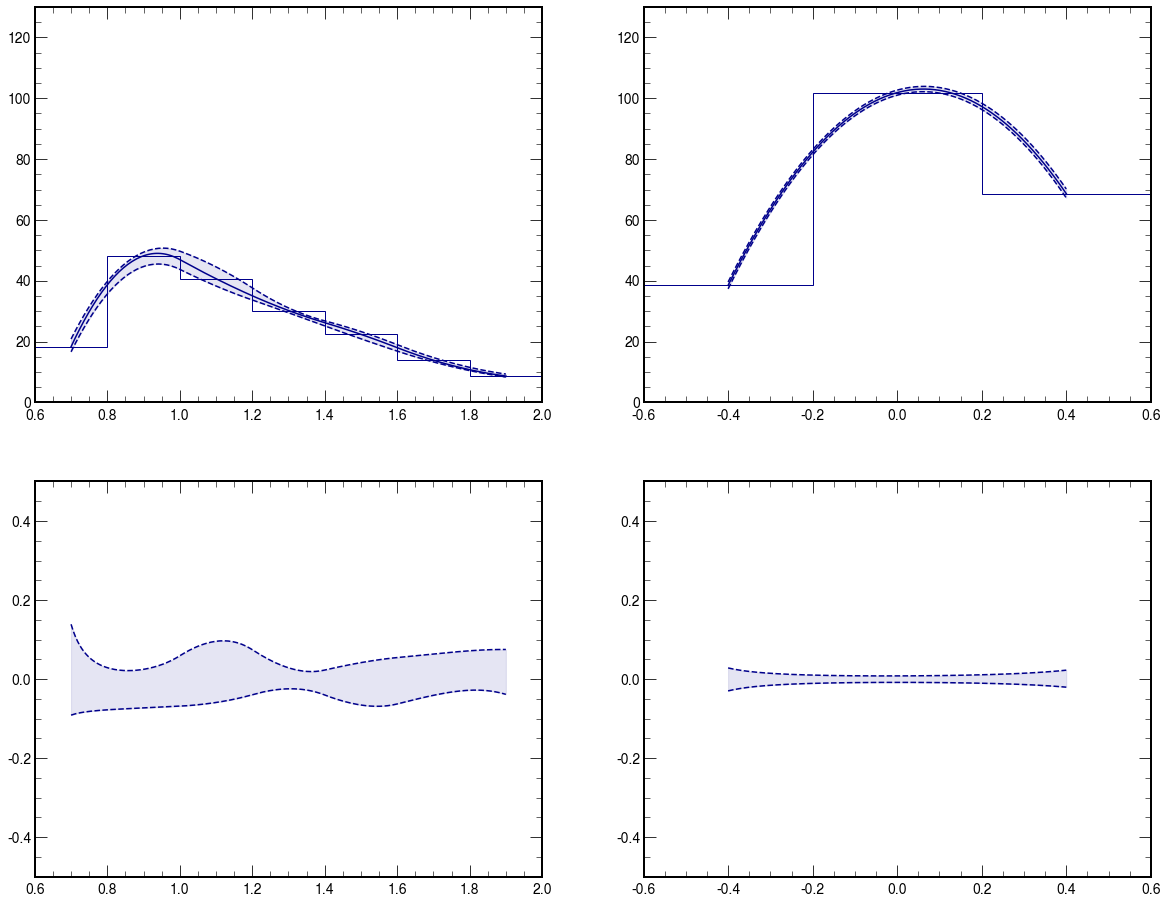

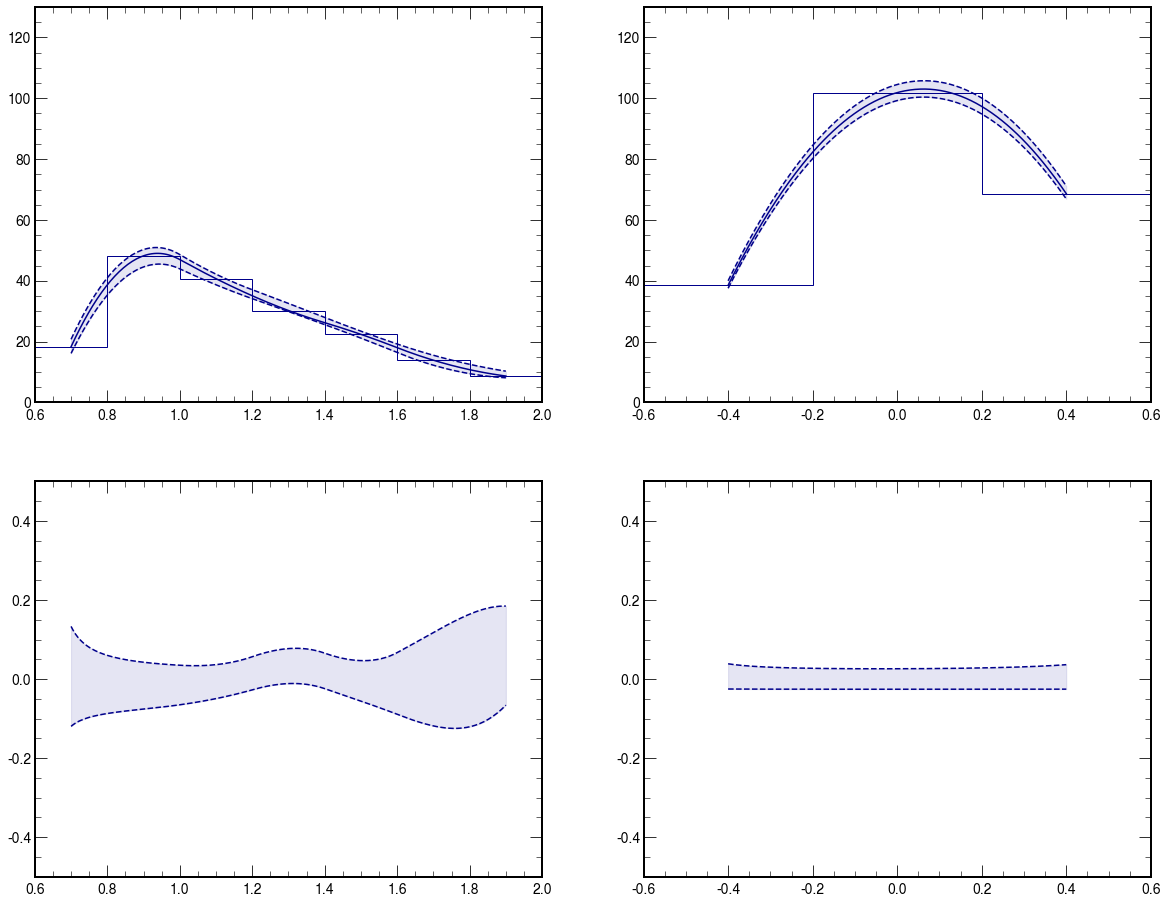

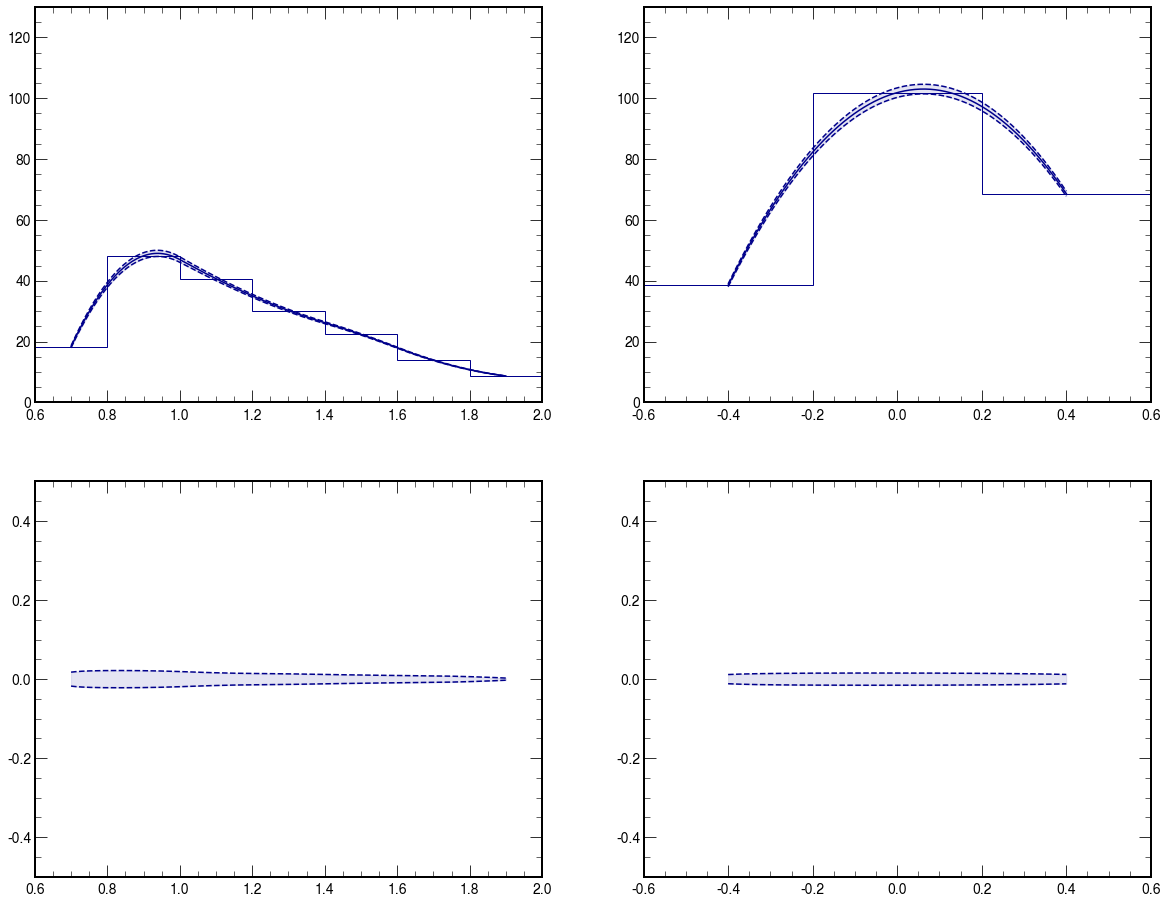

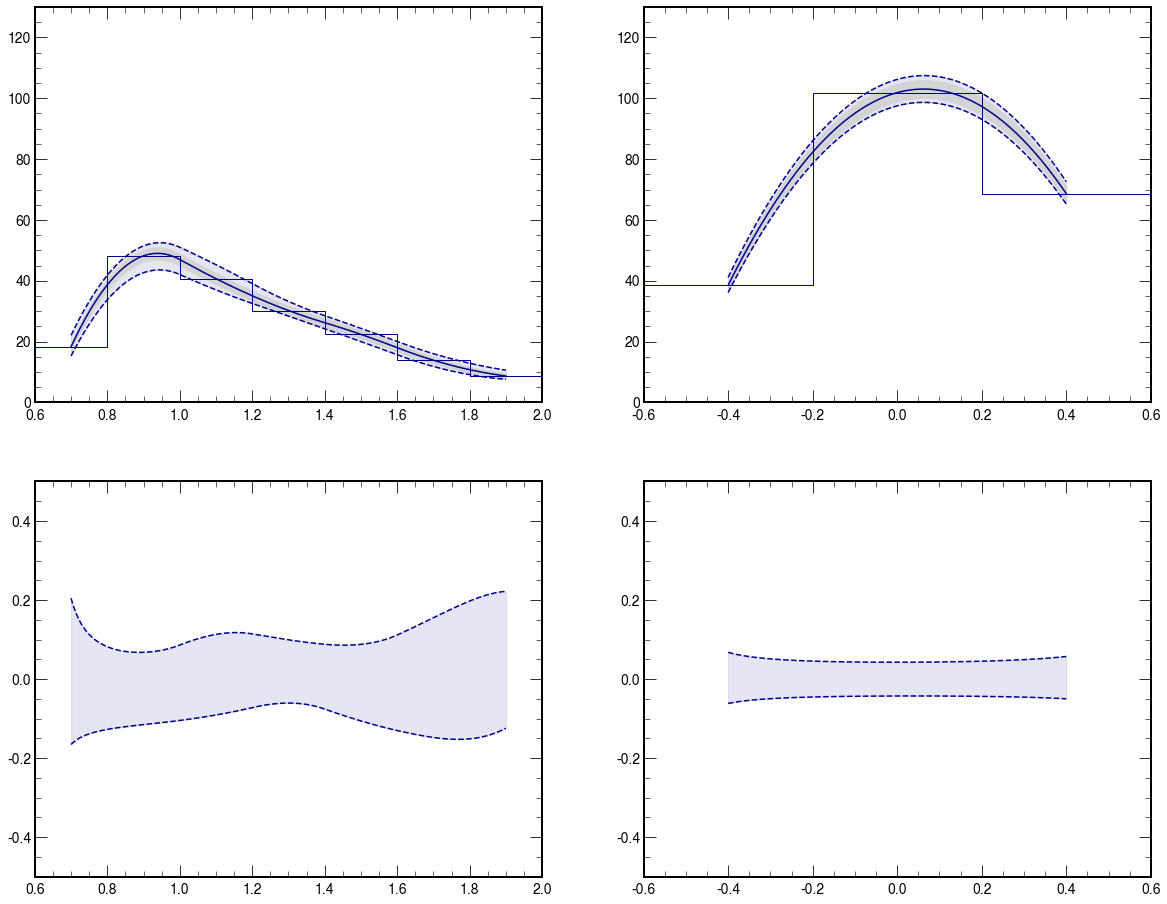

In [91]:
label_ = ""
coupling_str_ = "A0W5e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W5e-6"
#         label_ = "GGToWW-AQGC-muon-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ = (0.,130.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )    

if save_figures:
    if lepton_type == 'muon':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Signal-Variations-A0W5e-6-Electron_2018.png", bbox_inches='tight' )

In [92]:
print ( counts )
print ( err )
print ( bins )
print ( max_variations_total )
print ( min_variations_total )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([1.88999056, 2.63047188, 1.79157552, 1.22662853, 0.79327622,
       0.61785229, 0.39633669]), 'Diff_YWW_YX': array([2.25661259, 5.49290976, 3.17110379])}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'R_MWW_MX': array([3.46686523, 9.3353836 , 6.28187918, 5.2914086 , 3.60293168,
       2.18132211, 1.41044184]), 'Diff_YWW_YX': array([ 7.75482477, 17.02529732, 11.96395727])}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'R_MWW_MX': array([18.30146382, 48.19755337, 40.67438322, 30.20872408, 22.37055382,
       13.86190782,  8.66699434]), 'Diff_YWW_YX': array([ 38.49912339, 101.85921461,  68.62544117])}}
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([0.21740305, 0.25717025, 0.21149702, 0.17586168, 0.14296944,
       0.12637395, 0.09924167]), 'Diff_YWW_YX': array([0.2385059 , 0.37120034, 0.28203292])}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'R_MWW_MX': array([0.3329746 , 0.5474885 , 0.44977191, 0.41425523, 0.34116627,
       0.2651312 , 0.21292488]), 'Diff_YW

### Background

### Load and select events

In [93]:
##criar flag para usar bkg assim ou da MC+mix_protons

# ['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
#        'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
#        'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
#        'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
#        'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
#        'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
#        'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
#        'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
#        'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
#        'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
#        'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd',
#        'betaStar_rnd', 'period', 'jet0_pt_nom', 'jet0_energy_nom',
#        'jet0_mass_nom', 'jet0_corrmass_nom', 'jet0_px_nom', 'jet0_py_nom',
#        'jet0_pz_nom', 'muon0_pt_nom', 'muon0_energy_nom', 'muon0_px_nom',
#        'muon0_py_nom', 'muon0_pz_nom', 'WLeptonicPt_nom',
#        'WLeptonicPx_nom', 'WLeptonicPy_nom', 'WLeptonicPz_nom',
#        'WLeptonicE_nom', 'WLeptonicM_nom', 'WW_energy_nom', 'WW_pz_nom',
#        'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
#        'within_aperture', 'xlow', 'xhigh', 'ylow', 'yhigh', 'MX', 'YX',
#        'diffMWW_MX', 'ratioMWW_MX', 'shiftedRatioMWW_MX', 'diffYWW_YX',
#        'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']

In [94]:
# resample_factor = 20
# resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

if not bkg_MC_mix_protons: 
    labels_background = []
    fileNames_bkg = {}
    resample_factor = 50
    if data_sample == '2017':
        if lepton_type == 'muon':
            labels_background = [
                "data-random-resample_50-single-arm-muon-2017B",
                "data-random-resample_50-single-arm-muon-2017C",
                "data-random-resample_50-single-arm-muon-2017D",
                "data-random-resample_50-single-arm-muon-2017E",
                "data-random-resample_50-single-arm-muon-2017F"
            ]
            fileNames_bkg = {
                "data-random-resample_50-single-arm-muon-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
                "data-random-resample_50-single-arm-muon-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
                "data-random-resample_50-single-arm-muon-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
                "data-random-resample_50-single-arm-muon-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
                "data-random-resample_50-single-arm-muon-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
            }
        elif lepton_type == 'electron':
            labels_background = [
                "data-random-resample_50-single-arm-electron-2017B",
                "data-random-resample_50-single-arm-electron-2017C",
                "data-random-resample_50-single-arm-electron-2017D",
                "data-random-resample_50-single-arm-electron-2017E",
                "data-random-resample_50-single-arm-electron-2017F"
            ]
            fileNames_bkg = {
                "data-random-resample_50-single-arm-electron-2017B": "data-store-data-random-resample_50-single-arm-electron-2017B.h5",
                "data-random-resample_50-single-arm-electron-2017C": "data-store-data-random-resample_50-single-arm-electron-2017C.h5",
                "data-random-resample_50-single-arm-electron-2017D": "data-store-data-random-resample_50-single-arm-electron-2017D.h5",
                "data-random-resample_50-single-arm-electron-2017E": "data-store-data-random-resample_50-single-arm-electron-2017E.h5",
                "data-random-resample_50-single-arm-electron-2017F": "data-store-data-random-resample_50-single-arm-electron-2017F.h5"
            }
    elif data_sample == '2018':
        if lepton_type == 'muon':
            labels_background = [
                "data-random-resample_50-2018-muon-2018A",
                "data-random-resample_50-2018-muon-2018B",
                "data-random-resample_50-2018-muon-2018C",
                #"data-random-resample_50-2018-muon-2018D",
                "data-random-resample_50-2018-muon-2018D-1",
                "data-random-resample_50-2018-muon-2018D-2",
                "data-random-resample_50-2018-muon-2018D-3",
                "data-random-resample_50-2018-muon-2018D-4",
                "data-random-resample_50-2018-muon-2018D-5",
                "data-random-resample_50-2018-muon-2018D-6"
            ]
            fileNames_bkg = {
                "data-random-resample_50-2018-muon-2018A": "data-store-data-random-resample_50-2018-muon-2018A.h5",
                "data-random-resample_50-2018-muon-2018B": "data-store-data-random-resample_50-2018-muon-2018B.h5",
                "data-random-resample_50-2018-muon-2018C": "data-store-data-random-resample_50-2018-muon-2018C.h5",
                #"data-random-resample_50-2018-muon-2018D": "data-store-data-random-resample_50-2018-muon-2018D.h5",
                "data-random-resample_50-2018-muon-2018D-1": "data-store-data-random-resample_50-2018-muon-2018D-1.h5",
                "data-random-resample_50-2018-muon-2018D-2": "data-store-data-random-resample_50-2018-muon-2018D-2.h5",
                "data-random-resample_50-2018-muon-2018D-3": "data-store-data-random-resample_50-2018-muon-2018D-3.h5",
                "data-random-resample_50-2018-muon-2018D-4": "data-store-data-random-resample_50-2018-muon-2018D-4.h5",
                "data-random-resample_50-2018-muon-2018D-5": "data-store-data-random-resample_50-2018-muon-2018D-5.h5",
                "data-random-resample_50-2018-muon-2018D-6": "data-store-data-random-resample_50-2018-muon-2018D-6.h5"
            }             
        elif lepton_type == 'electron':
            labels_background = [
                "data-random-resample_50-2018-electron-2018A",
                "data-random-resample_50-2018-electron-2018B",
                "data-random-resample_50-2018-electron-2018C",
                #"data-random-resample_50-2018-electron-2018D",
                "data-random-resample_50-2018-electron-2018D-1",
                "data-random-resample_50-2018-electron-2018D-2",
                "data-random-resample_50-2018-electron-2018D-3",
                "data-random-resample_50-2018-electron-2018D-4",
                "data-random-resample_50-2018-electron-2018D-5",
                "data-random-resample_50-2018-electron-2018D-6"
            ]
            fileNames_bkg = {
                "data-random-resample_50-2018-electron-2018A": "data-store-data-random-resample_50-2018-electron-2018A.h5",
                "data-random-resample_50-2018-electron-2018B": "data-store-data-random-resample_50-2018-electron-2018B.h5",
                "data-random-resample_50-2018-electron-2018C": "data-store-data-random-resample_50-2018-electron-2018C.h5",
                #"data-random-resample_50-2018-electron-2018D": "data-store-data-random-resample_50-2018-electron-2018D.h5",
                "data-random-resample_50-2018-electron-2018D-1": "data-store-data-random-resample_50-2018-electron-2018D-1.h5",
                "data-random-resample_50-2018-electron-2018D-2": "data-store-data-random-resample_50-2018-electron-2018D-2.h5",
                "data-random-resample_50-2018-electron-2018D-3": "data-store-data-random-resample_50-2018-electron-2018D-3.h5",
                "data-random-resample_50-2018-electron-2018D-4": "data-store-data-random-resample_50-2018-electron-2018D-4.h5",
                "data-random-resample_50-2018-electron-2018D-5": "data-store-data-random-resample_50-2018-electron-2018D-5.h5",
                "data-random-resample_50-2018-electron-2018D-6": "data-store-data-random-resample_50-2018-electron-2018D-6.h5"
            }

    
#     base_path_ = "output"
    base_path_ = "output_19-06"
    #base_path_ = "output_new"
    for label_ in fileNames_bkg:
        fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
    print ( fileNames_bkg )

    # file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
    # print ( file_path_ )

    df_counts_bkg = None
#     df_protons_multiRP_bkg_index = None #
    df_protons_multiRP_bkg_events = None
    df_protons_multiRP_bkg_events_nTracks40 = None

    df_counts_bkg_list_ = []
#     df_protons_multiRP_bkg_index_list_ = [] #
    df_protons_multiRP_bkg_events_list_ = []
    df_protons_multiRP_bkg_events_list_nTracks40_ = []
    for label_ in labels_background:
        print ( label_ )
        file_path_ = fileNames_bkg[ label_ ]
        print ( file_path_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            
            df_counts_bkg__ = store_[ "counts" ]
            df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ] #
            df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]
            if lepton_type == 'muon':
                df_protons_multiRP_bkg_events__ = df_protons_multiRP_bkg_events__.loc[ :, 
                    ['crossingAngle',
                     'jet0_eta', 'jet0_phi', 
                     'jet0_tau1', 'jet0_tau2',
                     'met', 'met_phi',
                     'num_bjets_ak4',
                     'pfcand_nextracks', 'pfcand_nextracks_noDRl',
                     'WLeptonicEta', 'WLeptonicPhi',
                     'muon0_eta', 'muon0_phi', 'muon0_iso',
                     'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
                     'nprotons_arm0', 'nprotons_arm1',
                     'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
                     'muon0_pt_nom', 
                     'WLeptonicPt_nom', 
                     'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom', 'xi_max_arm0', 'xi_max_arm1',
                     'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']
                ]
#                 df_protons_multiRP_bkg_index__ = df_protons_multiRP_bkg_index__.loc[ :, 
#                     ['crossingAngle',
#                      'jet0_eta', 'jet0_phi', 
#                      'jet0_tau1', 'jet0_tau2',
#                      'met', 'met_phi',
#                      'num_bjets_ak4',
#                      'pfcand_nextracks', 'pfcand_nextracks_noDRl',
#                      'WLeptonicEta', 'WLeptonicPhi',
#                      'muon0_eta', 'muon0_phi', 'muon0_iso',
#                      'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
#                      'nprotons_arm0', 'nprotons_arm1',
#                      'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
#                      'muon0_pt_nom', 
#                      'WLeptonicPt_nom', 
#                      'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom']
#                 ]
            if lepton_type == 'electron':
                df_protons_multiRP_bkg_events__ = df_protons_multiRP_bkg_events__.loc[ :, 
                    ['crossingAngle',
                     'jet0_eta', 'jet0_phi', 
                     'jet0_tau1', 'jet0_tau2',
                     'met', 'met_phi',
                     'num_bjets_ak4',
                     'pfcand_nextracks', 'pfcand_nextracks_noDRl',
                     'WLeptonicEta', 'WLeptonicPhi',
                     'muon0_eta', 'muon0_phi', 'muon0_iso',
                     'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
                     'nprotons_arm0', 'nprotons_arm1',
                     'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
                     'muon0_pt_nom', 
                     'WLeptonicPt_nom', 
                     'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom', 'xi_max_arm0', 'xi_max_arm1',
                     'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']
                ]
#                 df_protons_multiRP_bkg_index__ = df_protons_multiRP_bkg_index__.loc[ :, 
#                     ['crossingAngle',
#                      'jet0_eta', 'jet0_phi', 
#                      'jet0_tau1', 'jet0_tau2',
#                      'met', 'met_phi',
#                      'num_bjets_ak4',
#                      'pfcand_nextracks', 'pfcand_nextracks_noDRl',
#                      'WLeptonicEta', 'WLeptonicPhi',
#                      'muon0_eta', 'muon0_phi', 'muon0_iso',
#                      'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
#                      'nprotons_arm0', 'nprotons_arm1',
#                      'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
#                      'muon0_pt_nom', 
#                      'WLeptonicPt_nom', 
#                      'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom']
#                 ]

            print ( df_protons_multiRP_bkg_events__.shape[0] )
            df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type, max_num_tracks=40 )
            print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_protons_multiRP_bkg_events_def__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type )
            print ( df_protons_multiRP_bkg_events_def__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ ) 
            df_protons_multiRP_bkg_index__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_index__, lepton_type )
            print ( df_protons_multiRP_bkg_index__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
    
            df_counts_bkg_list_.append( df_counts_bkg__ )
#             df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ ) #
    #         df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
            df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

    df_counts_bkg = df_counts_bkg_list_[0]
    for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
        df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

#     df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ ) #
    df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
    df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

{'data-random-resample_50-2018-muon-2018A': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018A.h5', 'data-random-resample_50-2018-muon-2018B': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018B.h5', 'data-random-resample_50-2018-muon-2018C': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018C.h5', 'data-random-resample_50-2018-muon-2018D-1': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018D-1.h5', 'data-random-resample_50-2018-muon-2018D-2': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018D-2.h5', 'data-random-resample_50-2018-muon-2018D-3': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018D-3.h5', 'data-random-resample_50-2018-muon-2018D-4': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018D-4.h5', 'data-random-resample_50-2018-muon-2018D-5': 'output_19-06/data-store-data-random-resample_50-2018-muon-2018D-5.h5', 'data-random-resample_50-2018-muon-2018D-6': 'output_19-06/data-store-data-

/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


47554
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 4139524, 'Muon': 4133039, 'Jet': 2959754, 'Jet_Muon': 2923306, 'MET': 2265681, 'Jet_MET': 2029674, 'PrunedMass': 563653, 'Tau21': 227089, 'BJet_Veto': 175407, 'Xi_CMS': 155069, 'WLeptonic': 103488, 'Jet_WLeptonic': 100849, 'MWW': 95712, 'ExtraTracks': 48705, 'NProtons': 47554}
328
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 4139524, 'Muon': 4133039, 'Jet': 2959754, 'Jet_Muon': 2923306, 'MET': 2265681, 'Jet_MET': 2029674, 'PrunedMass': 563653, 'Tau21': 227089, 'BJet_Veto': 175407, 'Xi_CMS': 155069, 'WLeptonic': 103488, 'Jet_WLeptonic': 100849, 'MWW': 95712, 'ExtraTracks': 337, 'NProtons': 328}
656
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi

/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


30000
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2589167, 'Muon': 2585182, 'Jet': 1851658, 'Jet_Muon': 1827801, 'MET': 1421093, 'Jet_MET': 1271884, 'PrunedMass': 353038, 'Tau21': 145486, 'BJet_Veto': 112090, 'Xi_CMS': 99383, 'WLeptonic': 66334, 'Jet_WLeptonic': 64875, 'MWW': 61135, 'ExtraTracks': 30733, 'NProtons': 30000}
241
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2589167, 'Muon': 2585182, 'Jet': 1851658, 'Jet_Muon': 1827801, 'MET': 1421093, 'Jet_MET': 1271884, 'PrunedMass': 353038, 'Tau21': 145486, 'BJet_Veto': 112090, 'Xi_CMS': 99383, 'WLeptonic': 66334, 'Jet_WLeptonic': 64875, 'MWW': 61135, 'ExtraTracks': 248, 'NProtons': 241}
482
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS',

/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


22721
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 1867500, 'Muon': 1864667, 'Jet': 1337224, 'Jet_Muon': 1319910, 'MET': 1023080, 'Jet_MET': 918079, 'PrunedMass': 250899, 'Tau21': 110209, 'BJet_Veto': 85465, 'Xi_CMS': 75565, 'WLeptonic': 49277, 'Jet_WLeptonic': 47987, 'MWW': 45473, 'ExtraTracks': 23147, 'NProtons': 22721}
121
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 1867500, 'Muon': 1864667, 'Jet': 1337224, 'Jet_Muon': 1319910, 'MET': 1023080, 'Jet_MET': 918079, 'PrunedMass': 250899, 'Tau21': 110209, 'BJet_Veto': 85465, 'Xi_CMS': 75565, 'WLeptonic': 49277, 'Jet_WLeptonic': 47987, 'MWW': 45473, 'ExtraTracks': 122, 'NProtons': 121}
242
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WL

/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


24855
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2019846, 'Muon': 2016796, 'Jet': 1448972, 'Jet_Muon': 1430123, 'MET': 1110343, 'Jet_MET': 994722, 'PrunedMass': 273757, 'Tau21': 114275, 'BJet_Veto': 89059, 'Xi_CMS': 78822, 'WLeptonic': 51398, 'Jet_WLeptonic': 50246, 'MWW': 47488, 'ExtraTracks': 25423, 'NProtons': 24855}
196
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2019846, 'Muon': 2016796, 'Jet': 1448972, 'Jet_Muon': 1430123, 'MET': 1110343, 'Jet_MET': 994722, 'PrunedMass': 273757, 'Tau21': 114275, 'BJet_Veto': 89059, 'Xi_CMS': 78822, 'WLeptonic': 51398, 'Jet_WLeptonic': 50246, 'MWW': 47488, 'ExtraTracks': 203, 'NProtons': 196}
392
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WL

/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


22695
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2002403, 'Muon': 1999296, 'Jet': 1430251, 'Jet_Muon': 1412469, 'MET': 1096739, 'Jet_MET': 984272, 'PrunedMass': 269928, 'Tau21': 113652, 'BJet_Veto': 87418, 'Xi_CMS': 76982, 'WLeptonic': 51120, 'Jet_WLeptonic': 49846, 'MWW': 47062, 'ExtraTracks': 23184, 'NProtons': 22695}
149
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 2002403, 'Muon': 1999296, 'Jet': 1430251, 'Jet_Muon': 1412469, 'MET': 1096739, 'Jet_MET': 984272, 'PrunedMass': 269928, 'Tau21': 113652, 'BJet_Veto': 87418, 'Xi_CMS': 76982, 'WLeptonic': 51120, 'Jet_WLeptonic': 49846, 'MWW': 47062, 'ExtraTracks': 150, 'NProtons': 149}
298
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WL

/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


23114
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 1920042, 'Muon': 1917131, 'Jet': 1371032, 'Jet_Muon': 1354386, 'MET': 1050156, 'Jet_MET': 941050, 'PrunedMass': 260478, 'Tau21': 109774, 'BJet_Veto': 85160, 'Xi_CMS': 75646, 'WLeptonic': 49722, 'Jet_WLeptonic': 48403, 'MWW': 45767, 'ExtraTracks': 23559, 'NProtons': 23114}
138
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 1920042, 'Muon': 1917131, 'Jet': 1371032, 'Jet_Muon': 1354386, 'MET': 1050156, 'Jet_MET': 941050, 'PrunedMass': 260478, 'Tau21': 109774, 'BJet_Veto': 85160, 'Xi_CMS': 75646, 'WLeptonic': 49722, 'Jet_WLeptonic': 48403, 'MWW': 45767, 'ExtraTracks': 138, 'NProtons': 138}
276
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WL

In [95]:
if bkg_MC_mix_protons:
    labels_background = []
    fileNames_bkg = {}
    resample_factor = 1
    if data_sample == '2017':
        if lepton_type == 'muon':
            labels_background = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
            fileNames_bkg = {
                "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6": "data-store-GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6": "data-store-GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6": "data-store-GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6.h5"
            }
        elif lepton_type == 'electron':
            labels_background = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ] 
            fileNames_bkg = {
                "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6": "data-store-GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6": "data-store-GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6.h5",
                "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6": "data-store-GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6.h5"
            }
    elif data_sample == '2018':
        if lepton_type == 'muon':
            labels_background = [ "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-WJetsToLNu_0J", "Bkg-mix_protons-2018-muon-WJetsToLNu_1J", "Bkg-mix_protons-2018-muon-WJetsToLNu_2J", "Bkg-mix_protons-2018-muon-DYJetsToLL_0J", "Bkg-mix_protons-2018-muon-DYJetsToLL_1J", "Bkg-mix_protons-2018-muon-DYJetsToLL_2J", "Bkg-mix_protons-2018-muon-QCD_Pt_170to300", "Bkg-mix_protons-2018-muon-QCD_Pt_300to470", "Bkg-mix_protons-2018-muon-QCD_Pt_470to600", "Bkg-mix_protons-2018-muon-QCD_Pt_600to800", "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000", "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400", "Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800", "Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400", "Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200", "Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf", "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays", "Bkg-mix_protons-2018-muon-WW", "Bkg-mix_protons-2018-muon-WZ", "Bkg-mix_protons-2018-muon-ZZ"]
            #labels_background = [ "Bkg-mix_protons-2018-muon-WJetsToLNu_2J", "Bkg-mix_protons-2018-muon-QCD_Pt_300to470", "Bkg-mix_protons-2018-muon-QCD_Pt_470to600", "Bkg-mix_protons-2018-muon-QCD_Pt_600to800", "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000", "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400", "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays" ] 
            fileNames_bkg = {
                "Bkg-mix_protons-2018-muon-TTJets": "data-store-Bkg-mix_protons-2018-muon-TTJets.h5",
                "Bkg-mix_protons-2018-muon-WJetsToLNu_0J": "data-store-Bkg-mix_protons-2018-muon-WJetsToLNu_0J.h5",
                "Bkg-mix_protons-2018-muon-WJetsToLNu_1J": "data-store-Bkg-mix_protons-2018-muon-WJetsToLNu_1J.h5",
                "Bkg-mix_protons-2018-muon-WJetsToLNu_2J": "data-store-Bkg-mix_protons-2018-muon-WJetsToLNu_2J.h5",
                "Bkg-mix_protons-2018-muon-DYJetsToLL_0J": "data-store-Bkg-mix_protons-2018-muon-DYJetsToLL_0J.h5",
                "Bkg-mix_protons-2018-muon-DYJetsToLL_1J": "data-store-Bkg-mix_protons-2018-muon-DYJetsToLL_1J.h5",
                "Bkg-mix_protons-2018-muon-DYJetsToLL_2J": "data-store-Bkg-mix_protons-2018-muon-DYJetsToLL_2J.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_170to300": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_170to300.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_300to470": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_300to470.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_470to600": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_470to600.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_600to800": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_600to800.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_800to1000.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200.h5",
                "Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf": "data-store-Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf.h5",
                "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays": "data-store-Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays": "data-store-Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays": "data-store-Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays": "data-store-Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays.h5",
                "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays": "data-store-Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays.h5",
                "Bkg-mix_protons-2018-muon-WW": "data-store-Bkg-mix_protons-2018-muon-WW.h5",
                "Bkg-mix_protons-2018-muon-WZ": "data-store-Bkg-mix_protons-2018-muon-WZ.h5",
                "Bkg-mix_protons-2018-muon-ZZ": "data-store-Bkg-mix_protons-2018-muon-ZZ.h5"
            }
  
        elif lepton_type == 'electron':
            labels_background = [ "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-WJetsToLNu_0J", "Bkg-mix_protons-2018-electron-WJetsToLNu_1J", "Bkg-mix_protons-2018-electron-WJetsToLNu_2J", "Bkg-mix_protons-2018-electron-DYJetsToLL_0J", "Bkg-mix_protons-2018-electron-DYJetsToLL_1J", "Bkg-mix_protons-2018-electron-DYJetsToLL_2J", "Bkg-mix_protons-2018-electron-QCD_Pt_170to300", "Bkg-mix_protons-2018-electron-QCD_Pt_300to470", "Bkg-mix_protons-2018-electron-QCD_Pt_470to600", "Bkg-mix_protons-2018-electron-QCD_Pt_600to800", "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000", "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400", "Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800", "Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400", "Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200", "Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf", "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays", "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays", "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays", "Bkg-mix_protons-2018-electron-WW", "Bkg-mix_protons-2018-electron-WZ", "Bkg-mix_protons-2018-electron-ZZ" ]
            fileNames_bkg = {
                "Bkg-mix_protons-2018-electron-TTJets": "data-store-Bkg-mix_protons-2018-electron-TTJets.h5",
                "Bkg-mix_protons-2018-electron-WJetsToLNu_0J": "data-store-Bkg-mix_protons-2018-electron-WJetsToLNu_0J.h5",
                "Bkg-mix_protons-2018-electron-WJetsToLNu_1J": "data-store-Bkg-mix_protons-2018-electron-WJetsToLNu_1J.h5",
                "Bkg-mix_protons-2018-electron-WJetsToLNu_2J": "data-store-Bkg-mix_protons-2018-electron-WJetsToLNu_2J.h5",
                "Bkg-mix_protons-2018-electron-DYJetsToLL_0J": "data-store-Bkg-mix_protons-2018-electron-DYJetsToLL_0J.h5",
                "Bkg-mix_protons-2018-electron-DYJetsToLL_1J": "data-store-Bkg-mix_protons-2018-electron-DYJetsToLL_1J.h5",
                "Bkg-mix_protons-2018-electron-DYJetsToLL_2J": "data-store-Bkg-mix_protons-2018-electron-DYJetsToLL_2J.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_170to300": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_170to300.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_300to470": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_300to470.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_470to600": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_470to600.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_600to800": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_600to800.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_800to1000.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200.h5",
                "Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf": "data-store-Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf.h5",
                "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays": "data-store-Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays": "data-store-Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays": "data-store-Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays": "data-store-Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays.h5",
                "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays": "data-store-Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays.h5",
                "Bkg-mix_protons-2018-electron-WW": "data-store-Bkg-mix_protons-2018-electron-WW.h5",
                "Bkg-mix_protons-2018-electron-WZ": "data-store-Bkg-mix_protons-2018-electron-WZ.h5",
                "Bkg-mix_protons-2018-electron-ZZ": "data-store-Bkg-mix_protons-2018-electron-ZZ.h5"
    
            } 
            
    df_counts_bkg = {}
    df_protons_multiRP_bkg_index = {}
    df_protons_multiRP_bkg_pre_sel_events = {}
    df_protons_multiRP_bkg_events = {}
    df_protons_multiRP_bkg_events_nTracks40 = {}
#    df_counts_bkg_list_ = []
#    df_protons_multiRP_bkg_index_list_ = []
#    df_protons_multiRP_bkg_events_list_ = []
#    df_protons_multiRP_bkg_events_list_nTracks40_ = []
    
#     base_path_ = "output"
    base_path_ = "output_19-06"
    #base_path_ = "output_new"
    for label_ in labels_background:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_bkg[ label_ ] = store_[ "counts" ]
            df_protons_multiRP_bkg_index[ label_ ] = store_[ "protons_multiRP" ]
            df_protons_multiRP_bkg_pre_sel_events[ label_ ] = store_[ "events_multiRP" ]
            
            df_bkg__ = df_protons_multiRP_bkg_pre_sel_events[ label_ ]
            jet0_tau21_, rhoprime1_, jet0_tau21_ddt_ = tau21_ddt_calculation( df_bkg__, lepton_type )
            df_bkg__["jet0_tau21"] = jet0_tau21_
            df_bkg__["jet0_tau21_ddt"] = jet0_tau21_ddt_
            print ( df_bkg__.shape[0] )
            
            df_protons_multiRP_bkg_events__, selection_keys__, selections__ = select_events( df_bkg__, lepton_type )
            print ( df_protons_multiRP_bkg_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_protons_multiRP_bkg_events[ label_ ] = {}
            df_protons_multiRP_bkg_events[ label_ ][ "_nom" ] = df_protons_multiRP_bkg_events__
            
            df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_bkg__, lepton_type, max_num_tracks=40 )
            print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_protons_multiRP_bkg_events_nTracks40[ label_ ] = {}
            df_protons_multiRP_bkg_events_nTracks40[ label_ ][ "_nom" ] = df_protons_multiRP_bkg_events_nTracks40__

#            df_counts_bkg_list_.append( df_counts_bkg__ )
#            df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
#            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
#            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
#            df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

#    df_counts_bkg = df_counts_bkg_list_[0]
#    for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
#        df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

#    # df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
#    df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
#    df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

In [96]:
if not bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events)
if bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events[ label_ ][ "_nom" ])

                                  crossingAngle  jet0_eta  jet0_phi  jet0_tau1  jet0_tau2        met   met_phi  num_bjets_ak4  pfcand_nextracks  pfcand_nextracks_noDRl  ...   YWW_nom  xiCMS_45_nom  xiCMS_56_nom    xi_nom  xi_max_arm0  xi_max_arm1       MX_nom    YX_nom  R_MWW_MX_nom Diff_YWW_YX_nom
run    lumiblock event     slice                                                                                                                                         ...                                                                                                                               
316201 111       134589152 3              133.0  1.616366  1.192000   0.385913   0.127406  76.700081 -1.738119              0                 4                       4  ...  0.723784      0.108892      0.024475  0.044309     0.044309     0.158392  1089.073628 -0.636940      0.638827        1.360724
                           6              133.0  1.616366  1.192000   0.385913   0.127406  76.700081

In [97]:
df_counts_bkg

All                     101031950
Jet                     101031950
Muon                     97846500
ProtonRnd_check_none     97846500
ProtonRnd                70990050
dtype: int64

In [98]:
if not bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events.columns.values)

['crossingAngle' 'jet0_eta' 'jet0_phi' 'jet0_tau1' 'jet0_tau2' 'met'
 'met_phi' 'num_bjets_ak4' 'pfcand_nextracks' 'pfcand_nextracks_noDRl'
 'WLeptonicEta' 'WLeptonicPhi' 'muon0_eta' 'muon0_phi' 'muon0_iso'
 'run_rnd' 'lumiblock_rnd' 'event_rnd' 'crossingAngle_rnd' 'period'
 'nprotons_arm0' 'nprotons_arm1' 'jet0_pt_nom' 'jet0_energy_nom'
 'jet0_corrmass_nom' 'muon0_pt_nom' 'WLeptonicPt_nom' 'MWW_nom' 'YWW_nom'
 'xiCMS_45_nom' 'xiCMS_56_nom' 'xi_nom' 'xi_max_arm0' 'xi_max_arm1'
 'MX_nom' 'YX_nom' 'R_MWW_MX_nom' 'Diff_YWW_YX_nom']


In [99]:
if not bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events_nTracks40)
if bkg_MC_mix_protons:
    print(df_protons_multiRP_bkg_events_nTracks40[ label_ ][ "_nom" ])

                                   crossingAngle  jet0_eta  jet0_phi  jet0_tau1  jet0_tau2         met   met_phi  num_bjets_ak4  pfcand_nextracks  pfcand_nextracks_noDRl  ...   YWW_nom  xiCMS_45_nom  xiCMS_56_nom    xi_nom  xi_max_arm0  xi_max_arm1       MX_nom    YX_nom  R_MWW_MX_nom Diff_YWW_YX_nom
run    lumiblock event      slice                                                                                                                                          ...                                                                                                                               
316199 1024      1424019072 0              138.0 -0.276788 -2.663172   0.391413   0.163859   62.902596 -0.100107              0                40                      41  ...  0.180850      0.046356      0.031595  0.095051     0.095051     0.049383   890.653968  0.327406      0.588255       -0.146556
315420 65        42363568   0              160.0  0.537302 -0.686172   0.347682   0.090923  14

In [100]:
if not bkg_MC_mix_protons:
    norm_factors = {}
    norm_factors['Bkg'] = np.array( [ ( 1. / resample_factor ) ] )
    df_protons_multiRP_bkg_events_nTracks40[ "norm" ] = np.product( norm_factors['Bkg'] )
    df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )
#     df_protons_multiRP_bkg_index[ "norm" ] = np.product( norm_factors['Bkg'] )

In [101]:
if bkg_MC_mix_protons:
    labels_samples_bkg = {
        "Bkg-mix_protons-2018-muon-TTJets": r"$t \bar{t} + \rm{jets}$",
        "Bkg-mix_protons-2018-electron-TTJets": r"$t \bar{t} + \rm{jets}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu_0J": r"$W + 0\rm{jet}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu_0J": r"$W + 0\rm{jet}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu_1J": r"$W + 1\rm{jet}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu_1J": r"$W + 1\rm{jet}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu_2J": r"$W + 2\rm{jets}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu_2J": r"$W + 2\rm{jets}$",
        "Bkg-mix_protons-2018-muon-WJetsToLNu": r"$W + \rm{jets}$",
        "Bkg-mix_protons-2018-electron-WJetsToLNu": r"$W + \rm{jets}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL_0J": r"$\rm{DY} + 0\rm{jet}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL_0J": r"$\rm{DY} + 0\rm{jet}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL_1J": r"$\rm{DY} + 1\rm{jet}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL_1J": r"$\rm{DY} + 1\rm{jet}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL_2J": r"$\rm{DY} + 2\rm{jet}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL_2J": r"$\rm{DY} + 2\rm{jet}$",
        "Bkg-mix_protons-2018-muon-DYJetsToLL": r"$\rm{DY} + \rm{jets}$",
        "Bkg-mix_protons-2018-electron-DYJetsToLL": r"$\rm{DY} + \rm{jets}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_170to300": r"QCD $170$--$300\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_170to300": r"QCD $170$--$300\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_300to470": r"QCD $300$--$470\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_300to470": r"QCD $300$--$470\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_470to600": r"QCD $470$--$600\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_470to600": r"QCD $470$--$600\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_600to800": r"QCD $600$--$800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_600to800": r"QCD $600$--$800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000": r"QCD $800$--$1000\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000": r"QCD $800$--$1000\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400": r"QCD $1000$--$1400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400": r"QCD $1000$--$1400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800": r"QCD $1400$--$1800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800": r"QCD $1400$--$1800\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400": r"QCD $1800$--$2400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400": r"QCD $1800$--$2400\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200": r"QCD $2400$--$3200\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200": r"QCD $2400$--$3200\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf": r"QCD $3200$--$\,\rm{GeV}$",
        "Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf": r"QCD $3200$--$\,\rm{GeV}$",
        "Bkg-mix_protons-2018-muon-QCD": r"QCD",
        "Bkg-mix_protons-2018-electron-QCD": r"QCD",
        "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays": r"single top $s$-channel $4f$",
        "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays": r"single top $s$-channel $4f$",
        "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays": r"single top $t$-channel $\bar{t}$ $4f$",
        "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays": r"single top $t$-channel $\bar{t}$ $4f$",
        "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays": r"single top $t$-channel $t$ $4f$",
        "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays": r"single top $t$-channel $t$ $4f$",
        "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays": r"single top $tW$ $\bar{t}$ $5f$",
        "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays": r"single top $tW$ $\bar{t}$ $5f$",
        "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays": r"single top $tW$ $t$ $5f$",
        "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays": r"single top $tW$ $t$ $5f$",
        "Bkg-mix_protons-2018-muon-ST": r"single top",
        "Bkg-mix_protons-2018-electron-ST": r"single top",
        "Bkg-mix_protons-2018-muon-WW": r"$WW$",
        "Bkg-mix_protons-2018-electron-WW": r"$WW$",
        "Bkg-mix_protons-2018-muon-WZ": r"$WZ$",
        "Bkg-mix_protons-2018-electron-WZ": r"$WZ$",
        "Bkg-mix_protons-2018-muon-ZZ": r"$ZZ$",
        "Bkg-mix_protons-2018-electron-ZZ": r"$ZZ$",
        "Bkg-mix_protons-2018-muon-VV": r"$VV$",
        "Bkg-mix_protons-2018-electron-VV": r"$VV$"
}

In [102]:
if bkg_MC_mix_protons:
    sample_names_bkg = {}
    if data_sample == '2017':
        pass
    elif data_sample == '2018':
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-TTJets" ] = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-WJetsToLNu_0J" ] = 'WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-WJetsToLNu_1J" ] = 'WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-WJetsToLNu_2J" ] = 'WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-DYJetsToLL_0J" ] = 'DYJetsToLL_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-DYJetsToLL_1J" ] = 'DYJetsToLL_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-DYJetsToLL_2J" ] = 'DYJetsToLL_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_300to470" ] = 'QCD_Pt_300to470_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_470to600" ] = 'QCD_Pt_470to600_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_600to800" ] = 'QCD_Pt_600to800_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_800to1000" ] = 'QCD_Pt_800to1000_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400" ] = 'QCD_Pt_1000to1400_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_170to300" ] = 'QCD_Pt_170to300_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800" ] = 'QCD_Pt_1400to1800_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400" ] = 'QCD_Pt_1800to2400_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200" ] = 'QCD_Pt_2400to3200_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf" ] = 'QCD_Pt_3200toInf_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays" ] = 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays" ] = 'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays" ] = 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays" ] = 'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays" ] = 'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-WW" ] = 'WW_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-WZ" ] = 'WZ_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-muon-ZZ" ] = 'ZZ_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-TTJets" ] = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-WJetsToLNu_0J" ] = 'WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-WJetsToLNu_1J" ] = 'WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-WJetsToLNu_2J" ] = 'WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-DYJetsToLL_0J" ] = 'DYJetsToLL_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-DYJetsToLL_1J" ] = 'DYJetsToLL_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-DYJetsToLL_2J" ] = 'DYJetsToLL_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_170to300" ] = 'QCD_Pt_170to300_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_300to470" ] = 'QCD_Pt_300to470_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_470to600" ] = 'QCD_Pt_470to600_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_600to800" ] = 'QCD_Pt_600to800_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_800to1000" ] = 'QCD_Pt_800to1000_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400" ] = 'QCD_Pt_1000to1400_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800" ] = 'QCD_Pt_1400to1800_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400" ] = 'QCD_Pt_1800to2400_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200" ] = 'QCD_Pt_2400to3200_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf" ] = 'QCD_Pt_3200toInf_TuneCP5_13TeV-pythia8'      
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays" ] = 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays" ] = 'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays" ] = 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays" ] = 'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays" ] = 'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-WW" ] = 'WW_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-WZ" ] = 'WZ_TuneCP5_13TeV-pythia8'
        sample_names_bkg[ "Bkg-mix_protons-2018-electron-ZZ" ] = 'ZZ_TuneCP5_13TeV-pythia8'
        

In [103]:
if bkg_MC_mix_protons:
    lumi_periods = None
    if data_sample == '2017':
        if lepton_type == 'muon':
            lumi_periods = lumi_periods_2017[ 'muon' ]
        elif lepton_type == 'electron':
            lumi_periods = lumi_periods_2017[ 'electron' ]
    elif data_sample == '2018':
        if lepton_type == 'muon':
            lumi_periods = lumi_periods_2018[ 'muon' ]
        elif lepton_type == 'electron':
            lumi_periods = lumi_periods_2018[ 'electron' ]
    
    lumi = np.sum( list( lumi_periods.values() ) )
    print ( lumi )
    
    norm_factors = {}
    for label__ in labels_background:
        print ( label__ )
        print ( samples_info[ sample_names_bkg[ label__ ] ] )
        sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names_bkg[ label__ ] ]
        sample_cross_section_ = sample_cross_section_ * sel_eff_
        if norm_to_1fb:
            sample_cross_section_ = 1.e-03
        print ( sample_cross_section_ )
        norm_factors[ label__ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
        print ( norm_factors[ label__ ] )
        norm_factors_product_ = np.product( norm_factors[ label__ ] )
        print ( norm_factors_product_ )
        if df_protons_multiRP_bkg_events[ label__ ][ "_nom" ].shape[0] > 0:
            df_protons_multiRP_bkg_events[ label__ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_

        if df_protons_multiRP_bkg_events_nTracks40[ label__ ][ "_nom" ].shape[0] > 0:
            df_protons_multiRP_bkg_events_nTracks40[ label__ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_

In [104]:
df_protons_multiRP_bkg_events

crossingAngle  jet0_eta  jet0_phi  jet0_tau1  jet0_tau2        met   met_phi  num_bjets_ak4  pfcand_nextracks  pfcand_nextracks_noDRl  ...  xiCMS_45_nom  xiCMS_56_nom    xi_nom  xi_max_arm0  xi_max_arm1       MX_nom    YX_nom  R_MWW_MX_nom  Diff_YWW_YX_nom  norm
run    lumiblock event     slice                                                                                                                                         ...                                                                                                                            
316201 111       134589152 3              133.0  1.616366  1.192000   0.385913   0.127406  76.700081 -1.738119              0                 4                       4  ...      0.108892      0.024475  0.044309     0.044309     0.158392  1089.073628 -0.636940      0.638827         1.360724  0.02
                           6              133.0  1.616366  1.192000   0.385913   0.127406  76.700081 -1.738119              0                 4                       4  ...      0.108892      0.024475  0.139240     0.139240     0.104951  1571.514584  0.141353      0.442713         0.582431  0.02
                           7              133.0  1.616366  1.192000   0.385913   0.127406  76.700081 -1.738119              0                 4                       4  ...      0.108892      0.024475  0.131713     0.131713     0.165029  1916.629165 -0.112750      0.362997         0.836534  0.02
                           13             133.0  1.616366  1.192000   0.385913   0.127406  76.700081 -1.738119              0                 4                       4  ...      0.108892      0.024475  0.075757     0.075757     0.105639  1162.963830 -0.166253      0.598239         0.890037  0.02
                           27             133.0  1.616366  1.192000   0.385913   0.127406  76.700081 -1.738119              0                 4                       4  ...      0.108892      0.024475  0.124264     0.124264     0.088037  1359.712504  0.172325      0.511674         0.551459  0.02
...                                         ...       ...       ...        ...        ...        ...       ...            ...               ...                     ...  ...           ...           ...       ...          ...          ...          ...       ...           ...              ...   ...
325022 496       801723712 39             148.0  0.943451 -2.383191   0.305149   0.128669  94.872337  0.914726              0                 2                       3  ...      0.075582      0.031483  0.048630     0.048630     0.093585   876.993954 -0.327314      0.750105         0.744658  0.02
                           42             148.0  0.943451 -2.383191   0.305149   0.128669  94.872337  0.914726              0                 2                       3  ...      0.075582      0.031483  0.081703     0.081703     0.070168   984.307565  0.076097      0.668325         0.341246  0.02
                           43             148.0  0.943451 -2.383191   0.305149   0.128669  94.872337  0.914726              0                 2                       3  ...      0.075582      0.031483  0.095209     0.095209     0.050240   899.104014  0.319629      0.731659         0.097714  0.02
                           48             148.0  0.943451 -2.383191   0.305149   0.128669  94.872337  0.914726              0                 2                       3  ...      0.075582      0.031483  0.037897     0.037897     0.071280   675.661981 -0.315878      0.973619         0.733222  0.02
                           49             148.0  0.943451 -2.383191   0.305149   0.128669  94.872337  0.914726              0                 2                       3  ...      0.075582      0.031483  0.114356     0.114356     0.129060  1579.312682 -0.060480      0.416534         0.477823  0.02

[1596 rows x 39 columns]

In [105]:
if bkg_MC_mix_protons:
    label_WJetsToLNu = ''
    samples_WJetsToLNu = []
    label_DYJetsToLL = ''
    samples_DYJetsToLL = []
    label_QCD = ''
    samples_QCD = []
    label_ST = ''
    samples_ST = []
    label_VV = ''
    samples_VV = []
    if data_sample == '2017':
        if lepton_type == 'muon':
            label_WJetsToLNu = ''
            samples_WJetsToLNu = [ ]
            label_DYJetsToLL = ''
            samples_DYJetsToLL = []
            label_QCD = ''
            samples_QCD = []
            label_ST = ''
            samples_ST = []
            label_VV = ''
            samples_VV = []
        elif lepton_type == 'electron':
            label_WJetsToLNu = ''
            samples_WJetsToLNu = [ ]
            label_DYJetsToLL = ''
            samples_DYJetsToLL = []
            label_QCD = ''
            samples_QCD = []
            label_ST = ''
            samples_ST = []
            label_VV = ''
            samples_VV = []
    elif data_sample == '2018':
        if lepton_type == 'muon':
            label_WJetsToLNu = "Bkg-mix_protons-2018-muon-WJetsToLNu"
            samples_WJetsToLNu = [ "Bkg-mix_protons-2018-muon-WJetsToLNu_0J", "Bkg-mix_protons-2018-muon-WJetsToLNu_1J", "Bkg-mix_protons-2018-muon-WJetsToLNu_2J" ]
            label_DYJetsToLL = "Bkg-mix_protons-2018-muon-DYJetsToLL"
            samples_DYJetsToLL = [ "Bkg-mix_protons-2018-muon-DYJetsToLL_0J", "Bkg-mix_protons-2018-muon-DYJetsToLL_1J", "Bkg-mix_protons-2018-muon-DYJetsToLL_2J" ]
            label_QCD = "Bkg-mix_protons-2018-muon-QCD"
            samples_QCD = [ "Bkg-mix_protons-2018-muon-QCD_Pt_170to300", "Bkg-mix_protons-2018-muon-QCD_Pt_300to470", "Bkg-mix_protons-2018-muon-QCD_Pt_470to600",
                            "Bkg-mix_protons-2018-muon-QCD_Pt_600to800","Bkg-mix_protons-2018-muon-QCD_Pt_800to1000", "Bkg-mix_protons-2018-muon-QCD_Pt_1000to1400",
                            "Bkg-mix_protons-2018-muon-QCD_Pt_1400to1800", "Bkg-mix_protons-2018-muon-QCD_Pt_1800to2400", "Bkg-mix_protons-2018-muon-QCD_Pt_2400to3200", "Bkg-mix_protons-2018-muon-QCD_Pt_3200toInf" ]
            label_ST = "Bkg-mix_protons-2018-muon-ST"
            samples_ST = [ "Bkg-mix_protons-2018-muon-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays",
                           "Bkg-mix_protons-2018-muon-ST_t-channel_top_4f_InclusiveDecays","Bkg-mix_protons-2018-muon-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-muon-ST_tW_top_5f_inclusiveDecays" ]
            label_VV = "Bkg-mix_protons-2018-muon-VV"
            samples_VV = [ "Bkg-mix_protons-2018-muon-WW",
                           "Bkg-mix_protons-2018-muon-WZ",
                           "Bkg-mix_protons-2018-muon-ZZ" ]
        elif lepton_type == 'electron':
            label_WJetsToLNu = "Bkg-mix_protons-2018-electron-WJetsToLNu"
            samples_WJetsToLNu = [ "Bkg-mix_protons-2018-electron-WJetsToLNu_0J", "Bkg-mix_protons-2018-electron-WJetsToLNu_1J", "Bkg-mix_protons-2018-electron-WJetsToLNu_2J" ]
            label_DYJetsToLL = "Bkg-mix_protons-2018-electron-DYJetsToLL"
            samples_DYJetsToLL = [ "Bkg-mix_protons-2018-electron-DYJetsToLL_0J", "Bkg-mix_protons-2018-electron-DYJetsToLL_1J", "Bkg-mix_protons-2018-electron-DYJetsToLL_2J" ]
            label_QCD = "Bkg-mix_protons-2018-electron-QCD"
            samples_QCD = [ "Bkg-mix_protons-2018-electron-QCD_Pt_170to300", "Bkg-mix_protons-2018-electron-QCD_Pt_300to470", "Bkg-mix_protons-2018-electron-QCD_Pt_470to600",
                            "Bkg-mix_protons-2018-electron-QCD_Pt_600to800","Bkg-mix_protons-2018-electron-QCD_Pt_800to1000", "Bkg-mix_protons-2018-electron-QCD_Pt_1000to1400",
                            "Bkg-mix_protons-2018-electron-QCD_Pt_1400to1800", "Bkg-mix_protons-2018-electron-QCD_Pt_1800to2400", "Bkg-mix_protons-2018-electron-QCD_Pt_2400to3200", "Bkg-mix_protons-2018-electron-QCD_Pt_3200toInf" ]
            label_ST = "Bkg-mix_protons-2018-electron-ST"
            samples_ST = [ "Bkg-mix_protons-2018-electron-ST_s-channel_4f_leptonDecays", "Bkg-mix_protons-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays",
                           "Bkg-mix_protons-2018-electron-ST_t-channel_top_4f_InclusiveDecays","Bkg-mix_protons-2018-electron-ST_tW_antitop_5f_inclusiveDecays", "Bkg-mix_protons-2018-electron-ST_tW_top_5f_inclusiveDecays" ]
            label_VV = "Bkg-mix_protons-2018-electron-VV"
            samples_VV = [ "Bkg-mix_protons-2018-electron-WW",
                           "Bkg-mix_protons-2018-electron-WZ",
                           "Bkg-mix_protons-2018-electron-ZZ" ]

    df_protons_multiRP_bkg_events[ label_WJetsToLNu ] = {}
    df_protons_multiRP_bkg_events[ label_DYJetsToLL ] = {}
    df_protons_multiRP_bkg_events[ label_QCD ] = {}
    df_protons_multiRP_bkg_events[ label_ST ] = {}
    df_protons_multiRP_bkg_events[ label_VV ] = {}
    df_protons_multiRP_bkg_events_nTracks40[ label_WJetsToLNu ] = {}
    df_protons_multiRP_bkg_events_nTracks40[ label_DYJetsToLL ] = {}
    df_protons_multiRP_bkg_events_nTracks40[ label_QCD ] = {}
    df_protons_multiRP_bkg_events_nTracks40[ label_ST ] = {}
    df_protons_multiRP_bkg_events_nTracks40[ label_VV ] = {}


    for variation__ in df_protons_multiRP_bkg_events[ samples_WJetsToLNu[ 1 ] ]:
        print ( variation__ )
        df_events_list__ = []
        for label__ in samples_WJetsToLNu:
            df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events[ label_WJetsToLNu ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_DYJetsToLL:
            df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events[ label_DYJetsToLL ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_QCD:
            df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events[ label_QCD ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_ST:
            df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events[ label_ST ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_VV:
            df_events_list__.append( df_protons_multiRP_bkg_events[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events[ label_VV ][ variation__ ] = pd.concat( df_events_list__ )

    labels_background.append( label_WJetsToLNu )
    labels_background.append( label_DYJetsToLL )
    labels_background.append( label_QCD )
    labels_background.append( label_ST )
    labels_background.append( label_VV )
    # print ( df_selected_events_MC[ label_WJetsToLNu ] )

    for variation__ in df_protons_multiRP_bkg_events_nTracks40[ samples_WJetsToLNu[ 1 ] ]:
        print ( variation__ )
        df_events_list__ = []
        for label__ in samples_WJetsToLNu:
            df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events_nTracks40[ label_WJetsToLNu ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_DYJetsToLL:
            df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events_nTracks40[ label_DYJetsToLL ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_QCD:
            df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events_nTracks40[ label_QCD ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_ST:
            df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events_nTracks40[ label_ST ][ variation__ ] = pd.concat( df_events_list__ )

        df_events_list__ = []
        for label__ in samples_VV:
            df_events_list__.append( df_protons_multiRP_bkg_events_nTracks40[ label__ ][ variation__ ] )
        df_protons_multiRP_bkg_events_nTracks40[ label_VV ][ variation__ ] = pd.concat( df_events_list__ )

    labels_background.append( label_WJetsToLNu )
    labels_background.append( label_DYJetsToLL )
    labels_background.append( label_QCD )
    labels_background.append( label_ST )
    labels_background.append( label_VV )
    # print ( df_selected_events_MC[ label_WJetsToLNu ] )

In [106]:
if bkg_MC_mix_protons:
    df_protons_multiRP_bkg_events[ label_DYJetsToLL ]

In [107]:
if bkg_MC_mix_protons:
    labels_bkg_plot = []
    if data_sample == '2017':
        if lepton_type == 'muon':
            labels_bkg_plot = [ ]
        elif lepton_type == 'electron':
            labels_bkg_plot = [ ]
    elif data_sample == '2018':
        if lepton_type == 'muon':
            labels_bkg_plot = [ "Bkg-mix_protons-2018-muon-WJetsToLNu", "Bkg-mix_protons-2018-muon-DYJetsToLL", "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-QCD", "Bkg-mix_protons-2018-muon-ST", "Bkg-mix_protons-2018-muon-VV" ]
            #labels_bkg_plot = [ "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-WJetsToLNu", "Bkg-mix_protons-2018-muon-QCD", "Bkg-mix_protons-2018-muon-ST" ]
    #         labels_bkg_plot = [ "Bkg-mix_protons-2018-muon-TTJets", "Bkg-mix_protons-2018-muon-WJetsToLNu", "Bkg-mix_protons-2018-muon-DYJetsToLL", "Bkg-mix_protons-2018-muon-VV" ]
        elif lepton_type == 'electron':
            #labels_bkg_plot = [ "Bkg-mix_protons-2018-electron-WJetsToLNu", "Bkg-mix_protons-2018-electron-DYJetsToLL", "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-QCD", "Bkg-mix_protons-2018-electron-ST", "Bkg-mix_protons-2018-electron-VV" ]
            labels_bkg_plot = [ "Bkg-mix_protons-2018-electron-WJetsToLNu", "Bkg-mix_protons-2018-electron-DYJetsToLL", "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-QCD", "Bkg-mix_protons-2018-electron-ST", "Bkg-mix_protons-2018-electron-VV" ]        #labels_bkg_plot = [ "Bkg-mix_protons-2018-electron-TTJets", "Bkg-mix_protons-2018-electron-WJetsToLNu", "Bkg-mix_protons-2018-electron-DYJetsToLL", "Bkg-mix_protons-2018-electron-QCD", "Bkg-mix_protons-2018-electron-ST", "Bkg-mix_protons-2018-electron-VV" ]

In [108]:
def plot_regions_background( df_bkg_events ):
    if bkg_MC_mix_protons:
        for label_ in labels_bkg_plot:
            df__ = df_bkg_events[ label_ ][ "_nom" ]
    
    if not bkg_MC_mix_protons:
        df__ = df_bkg_events
        
    weights__ = ( df__[ "norm" ] )
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_bkg_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_bkg_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
    msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    label_str_ = r"A ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    label_str_ = r"B ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"C ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"D ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=12 )
    ax.text( 0.80, 0.75, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

    if save_figures:
        if lepton_type == 'muon':
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Muon_2018.png", bbox_inches='tight' )
        if lepton_type == 'electron':
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background-Electron_2018.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ),
             ( n_events_bkg_B, err_n_events_bkg_B ),
             ( n_events_bkg_C, err_n_events_bkg_C ),
             ( n_events_bkg_D, err_n_events_bkg_D ) )

Number of events: 4689.840000000001 +/- 9.68487480559248
Number of events (A): 699.72 +/- 3.740908980448469
Number of events (B): 1740.4799999999998 +/- 5.899966101597535
Number of events (C): 531.3199999999999 +/- 3.259815945724544
Number of events (D): 1718.32 +/- 5.8622862434377945


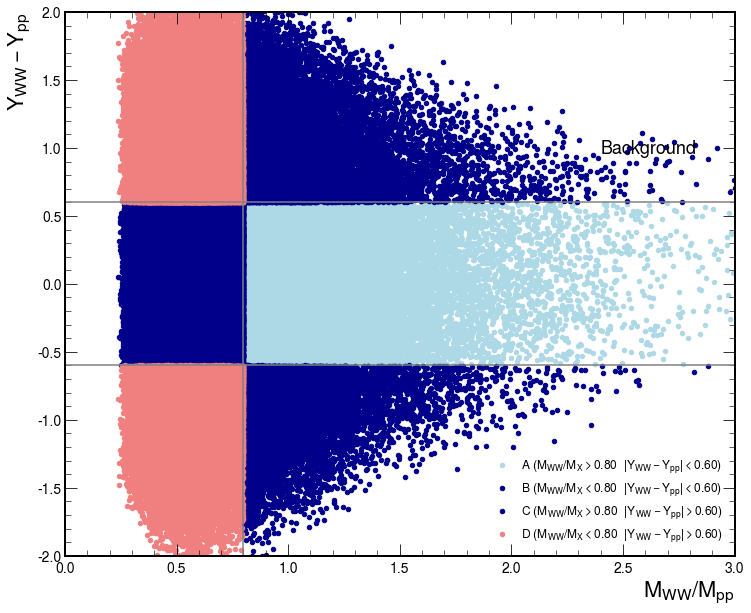

In [109]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events_nTracks40 )
n_events_bkg_A_nTracks40, err_n_events_bkg_A_nTracks40 = res_[ 0 ]
n_events_bkg_B_nTracks40, err_n_events_bkg_B_nTracks40 = res_[ 1 ]
n_events_bkg_C_nTracks40, err_n_events_bkg_C_nTracks40 = res_[ 2 ]
n_events_bkg_D_nTracks40, err_n_events_bkg_D_nTracks40 = res_[ 3 ]

Number of events: 31.919999999999995 +/- 0.7989993742175272
Number of events (A): 6.959999999999999 +/- 0.37309516212355265
Number of events (B): 9.46 +/- 0.43497126341863096
Number of events (C): 4.319999999999999 +/- 0.2939387691339814
Number of events (D): 11.18 +/- 0.47286361670147564


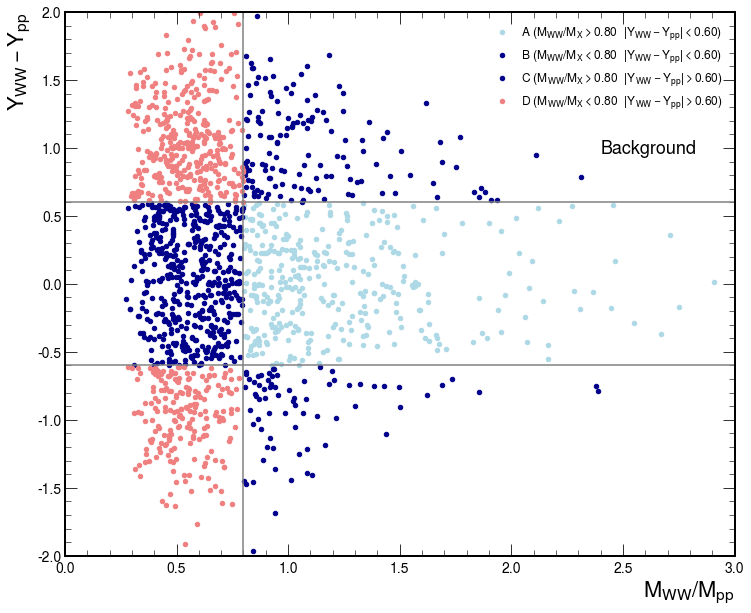

In [110]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

### Data

In [111]:
# label_data = ""
# if lepton_type == 'muon':
#     label_data = "data-single-arm"
# elif lepton_type == 'electron':
#     label_data = "data-single-arm-electron"

labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ "data-single-arm" ]
        fileNames_data = {
            "data-single-arm": "data-store-data-single-arm.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [ "data-single-arm-electron" ]
        fileNames_data = {
            "data-single-arm-electron": "data-store-data-single-arm-electron.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

# base_path_ = 'output'
base_path_ = 'output_19-06'
#base_path_ = 'output_new'
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

# df_counts_data = None
# # df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_data = store_[ "counts" ]
# #     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_counts_data = None
df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None

df_counts_data_list_ = []
df_protons_multiRP_data_index_list_ = []
df_protons_multiRP_data_events_list_ = []
for label_ in labels_data:
    print ( label_ )
    file_path_ = fileNames_data[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
        df_protons_multiRP_data_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events__ = store_[ "events_multiRP" ]
        jet0_tau21_, rhoprime1_, jet0_tau21_ddt_ = tau21_ddt_calculation( df_protons_multiRP_data_events__, lepton_type )
        df_protons_multiRP_data_events__["jet0_tau21"] = jet0_tau21_
        df_protons_multiRP_data_events__["jet0_tau21_ddt"] = jet0_tau21_ddt_
#         M_ = -0.055114753311384504
#         df_protons_multiRP_data_events__["jet0_tau21_ddt"] = ( df_protons_multiRP_data_events__.loc[ :, "jet0_tau2"] / df_protons_multiRP_data_events__.loc[ :, "jet0_tau1"] ) - (M_*(np.log((((df_protons_multiRP_data_events__.loc[ :, "jet0_corrmass" + "_nom"])**2)/(df_protons_multiRP_data_events__.loc[ :, "jet0_pt" + "_nom"])))))          
        df_counts_data_list_.append( df_counts_data__ )
        df_protons_multiRP_data_index_list_.append( df_protons_multiRP_data_index__ )
        df_protons_multiRP_data_events_list_.append( df_protons_multiRP_data_events__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

df_protons_multiRP_data_index = pd.concat( df_protons_multiRP_data_index_list_ )
df_protons_multiRP_data_events = pd.concat( df_protons_multiRP_data_events_list_ )

{'data-2018-muon-2018A': 'output_19-06/data-store-data-2018-muon-2018A.h5', 'data-2018-muon-2018B': 'output_19-06/data-store-data-2018-muon-2018B.h5', 'data-2018-muon-2018C': 'output_19-06/data-store-data-2018-muon-2018C.h5', 'data-2018-muon-2018D': 'output_19-06/data-store-data-2018-muon-2018D.h5'}
data-2018-muon-2018A
output_19-06/data-store-data-2018-muon-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']


/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


data-2018-muon-2018B
output_19-06/data-store-data-2018-muon-2018B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018C
output_19-06/data-store-data-2018-muon-2018C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018D
output_19-06/data-store-data-2018-muon-2018D.h5
['/counts', '/events_multiRP', '/protons_multiRP']


In [112]:
list(df_protons_multiRP_data_events.columns)

['crossingAngle',
 'betaStar',
 'instLumi',
 'jet0_pt',
 'jet0_eta',
 'jet0_phi',
 'jet0_energy',
 'jet0_mass',
 'jet0_corrmass',
 'jet0_tau1',
 'jet0_tau2',
 'jet0_vertexz',
 'jet0_px',
 'jet0_py',
 'jet0_pz',
 'calo_met',
 'met',
 'met_x',
 'met_y',
 'met_phi',
 'nVertices',
 'num_bjets_ak8',
 'num_bjets_ak4',
 'num_jets_ak4',
 'pfcand_nextracks',
 'pfcand_nextracks_noDRl',
 'recoMWhad',
 'recoMWlep',
 'recoMWlep_metJER_Up',
 'recoMWlep_metJER_Down',
 'recoMWlep_metJES_Up',
 'recoMWlep_metJES_Down',
 'recoMWW',
 'recoMWW_metJER_Up',
 'recoMWW_metJER_Down',
 'recoMWW_metJES_Up',
 'recoMWW_metJES_Down',
 'recoRapidityWW',
 'dphiWW',
 'WLeptonicPt',
 'WLeptonicPt_metJER_Up',
 'WLeptonicPt_metJER_Down',
 'WLeptonicPt_metJES_Up',
 'WLeptonicPt_metJES_Down',
 'WLeptonicEta',
 'WLeptonicPhi',
 'muon0_pt',
 'muon0_eta',
 'muon0_phi',
 'muon0_energy',
 'muon0_charge',
 'muon0_iso',
 'muon0_dxy',
 'muon0_dz',
 'muon0_trackerLayersWithMeasurement',
 'muon0_Roccor',
 'muon0_deltaRoccor',
 'perio

In [113]:
df_counts_data

All                  2020639
Jet                  2020639
Muon                 1956930
Proton_check_none    1956930
Proton               1419801
dtype: int64

In [114]:
df_protons_multiRP_data_events

crossingAngle  betaStar  instLumi     jet0_pt  jet0_eta  jet0_phi  jet0_energy  jet0_mass  jet0_corrmass  jet0_tau1  ...   diffMWW_MX  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX       MX_nom    YX_nom  R_MWW_MX_nom  Diff_YWW_YX_nom  jet0_tau21  jet0_tau21_ddt
run    lumiblock event      slice                                                                                                                       ...                                                                                                                                            
315361 185       154862144  0              160.0       0.3  9.867326  216.550842 -0.785806  2.468967   296.190582  38.798351      42.131680   0.313750  ...  -504.690889     0.540321           -0.459679    0.676564  1097.920015 -0.652082      0.531962         0.653013    0.718290        0.865251
                 155263600  0              160.0       0.3  9.867326  228.155350 -1.957120  3.135896   831.666016  92.378464     103.461731   0.519309  ...  -370.749923     0.691705           -0.308295   -0.282459  1202.580795 -0.399681      0.530516        -0.562334    0.553945        0.822776
       194       162831824  0              160.0       0.3  9.701560  227.237320 -0.109064 -1.281649   239.156738  44.079662      47.927273   0.229843  ... -1204.139989     0.404274           -0.595726    1.059950  2021.297887 -0.057446      0.390840         1.015353    0.758933        0.920536
                 163127968  0              160.0       0.3  9.701560  219.545898  2.275608  1.573873  1081.719604  16.043905      18.620327   0.206073  ...  -542.374083     0.637097           -0.362903    1.248680  1494.543150 -0.169419      0.724530         1.048420    0.863758        0.895679
       199       168035536  0              160.0       0.3  9.619579  272.834045  0.024033  0.137897   281.411072   7.154206       7.779571   0.129113  ...  -435.151230     0.567876           -0.432124    0.104181  1007.005356  0.542875      0.450277        -0.266362    0.824842        0.719649
...                                          ...       ...       ...         ...       ...       ...          ...        ...            ...        ...  ...          ...          ...                 ...         ...          ...       ...           ...              ...         ...             ...
325170 690       1262922752 0              132.0       0.3  9.064630  302.641113  0.247269 -1.901856   317.510193  12.621750      13.792547   0.095319  ...  -170.226619     0.850212           -0.149788    1.329918  1136.451595 -0.174035      0.842404         1.314953    0.916622        0.884189
       708       1294717824 0              131.0       0.3  8.976559  250.615112 -0.322795 -1.154538   272.878082  46.544601      50.774105   0.232637  ...  -306.414697     0.550812           -0.449188   -0.370832   682.152551  0.451985      0.495395        -0.493201    0.762073        0.924896
                 1295593728 0              131.0       0.3  8.976559  293.861084 -0.985562  0.778647   451.581635   7.917025       8.757604   0.102324  ...  -624.009025     0.608266           -0.391734    0.279939  1592.940055 -0.168863      0.595854         0.254674    0.773877        0.680042
       709       1297782144 0              131.0       0.3  8.975014  212.368042 -1.618892 -1.964815   559.509705  23.121962      25.716494   0.184335  ...  -806.492859     0.394289           -0.605711   -1.160390  1331.481628 -0.005620      0.396061        -1.147219    0.825139        0.904491
       712       1303309952 0              131.0       0.3  8.972046  232.493896 -2.244604 -2.025171  1111.336304  27.498758      31.736952   0.229870  ...    38.219901     1.037178            0.037178   -1.162630  1028.012887  0.446204      1.012369        -1.186606    0.567070        0.669485

[396038 rows x 104 columns]

### Select events

In [115]:
print ( df_protons_multiRP_data_events.shape[0] )
df_protons_multiRP_data_events_nTracks40, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type, max_num_tracks=40 )
print ( df_protons_multiRP_data_events_nTracks40.shape[0] )
print ( selection_keys_ )
print ( selections_ )
df_protons_multiRP_data_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type )
df_protons_multiRP_data_events = df_protons_multiRP_data_events__
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )
df_protons_multiRP_data_index__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_index, lepton_type )
df_protons_multiRP_data_index = df_protons_multiRP_data_index__
print ( df_protons_multiRP_data_index.shape[0] )
print ( selection_keys_ )
print ( selections_ )

396038


/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


4486
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 396038, 'Muon': 395410, 'Jet': 283055, 'Jet_Muon': 279525, 'MET': 217086, 'Jet_MET': 194378, 'PrunedMass': 53999, 'Tau21': 21309, 'BJet_Veto': 16546, 'Xi_CMS': 14662, 'WLeptonic': 9604, 'Jet_WLeptonic': 9400, 'MWW': 8885, 'ExtraTracks': 4588, 'NProtons': 4486}
37
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks', 'NProtons']
{'All': 396038, 'Muon': 395410, 'Jet': 283055, 'Jet_Muon': 279525, 'MET': 217086, 'Jet_MET': 194378, 'PrunedMass': 53999, 'Tau21': 21309, 'BJet_Veto': 16546, 'Xi_CMS': 14662, 'WLeptonic': 9604, 'Jet_WLeptonic': 9400, 'MWW': 8885, 'ExtraTracks': 37, 'NProtons': 37}
74
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 

In [116]:
def plot_data_bkg( plot_var, df_data, df_bkg, bins, range, xlabel ):

    plot_var__ = plot_var
    df_data__ = df_data
    df_bkg__ = df_bkg
    bins__ = bins
    range__ = range
    xlabel__ = xlabel
    
    fig = plt.figure( figsize=(12,10) )
    
    plt.hist( df_data__[ plot_var__ ], histtype='step', range=range__, bins=bins__, label=r"Data" )
    plt.hist( df_bkg__[ plot_var__ ], weights=df_bkg__["norm"], histtype='step', range=range__, bins=bins__, label=r"Bkg" )
    
#     counts_bins_data_, bin_edges_data_ = np.histogram( df_protons_multiRP_data_events[ plot_var__ ], range=range__, bins=bins__ )
#     counts_bins_bkg_, bin_edges_bkg_ = np.histogram( df_protons_multiRP_bkg_events[ plot_var__ ], weights=df_protons_multiRP_bkg_events["norm"], range=range__, bins=bins__ )

#     errors_bins_data_ = np.sqrt( counts_bins_data_ )
#     errors_bins_bkg_ = np.sqrt( counts_bins_bkg_ )

#     bin_centres_data_ = ( bin_edges_data_[:-1] + bin_edges_data_[1:] ) / 2.
#     bin_centres_bkg_ = ( bin_edges_bkg_[:-1] + bin_edges_bkg_[1:] ) / 2.

#     plt.errorbar( bin_centres_data_, counts_bins_data_, yerr=errors_bins_data_, fmt='o', color='black', label=r"Data" )
#     plt.errorbar( bin_centres_bkg_, counts_bins_bkg_, yerr=errors_bins_bkg_, fmt='o', color='red', label=r"Bkg" )
        
    plt.xlabel( xlabel__, fontsize=18 )
    plt.ylabel( "Events", fontsize=18 )
    plt.legend( loc='best', fontsize=14 )

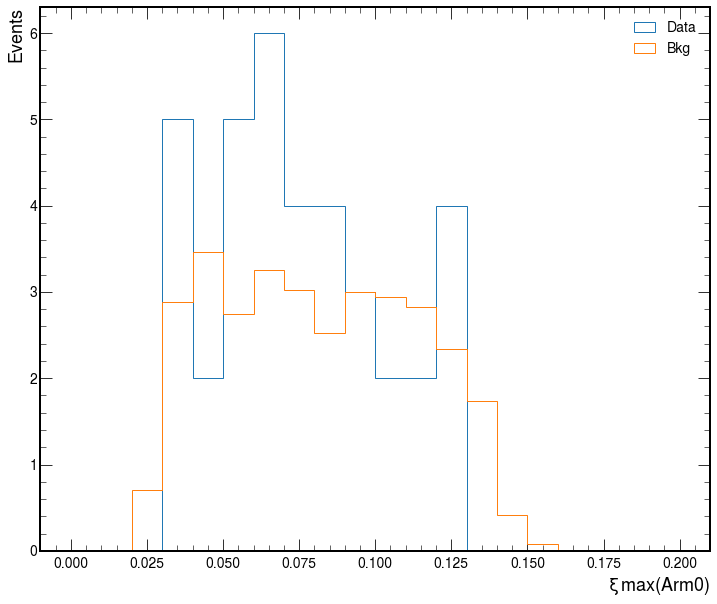

In [117]:
plot_var__ = 'xi_max_arm0'
df_data__ = df_protons_multiRP_data_events
df_bkg__ = df_protons_multiRP_bkg_events
range_ = (0., 0.2) 
bins_ = 20
xlabel_ = r"$ \xi \,\rm{max (Arm 0)} $"
plot_data_bkg( plot_var=plot_var__, df_data=df_data__, df_bkg=df_bkg__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/xi_max_arm0_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/xi_max_arm0_muon_2018.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/xi_max_arm0_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/xi_max_arm0_muon_2018.png", bbox_inches='tight' )

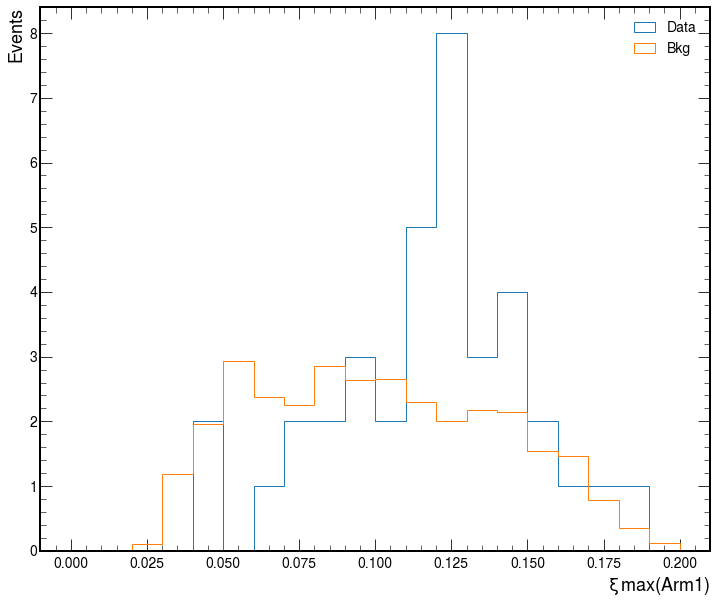

In [150]:
plot_var__ = 'xi_max_arm1'
df_data__ = df_protons_multiRP_data_events
df_bkg__ = df_protons_multiRP_bkg_events
range_ = (0., 0.2) 
bins_ = 20
xlabel_ = r"$ \xi \,\rm{max (Arm 1)} $"
plot_data_bkg( plot_var=plot_var__, df_data=df_data__, df_bkg=df_bkg__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/xi_max_arm1_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/xi_max_arm1_muon_2018.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/xi_max_arm1_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/xi_max_arm1_muon_2018.png", bbox_inches='tight' )

In [153]:
msk_xi_max = ((df_protons_multiRP_data_events['xi_max_arm1'] >= 0.11) & (df_protons_multiRP_data_events['xi_max_arm1'] <= 0.15))
df_protons_multiRP_data_events['xi_max_arm1'][msk_xi_max]

run     lumiblock  event       slice
316457  766        887404608   0        0.129188
316702  104        148433168   0        0.126738
315713  108        127216232   0        0.130994
316505  613        744831104   0        0.148043
316722  207        286194368   0        0.147621
316569  1064       1449572864  0        0.116257
317182  360        464383872   0        0.126429
317640  135        177307712   0        0.128884
317683  212        272855744   0        0.143699
319337  368        245396896   0        0.144757
320061  47         86193920    0        0.110952
319579  370        504999392   0        0.121651
322079  172        281480000   0        0.128535
321051  371        514098912   0        0.136919
321414  914        1555381632  0        0.124316
321732  791        1424053632  0        0.132665
322179  1213       2088014208  0        0.118577
322118  259        474892608   0        0.115197
324245  624        1188677888  0        0.124416
325022  496        801723712   0

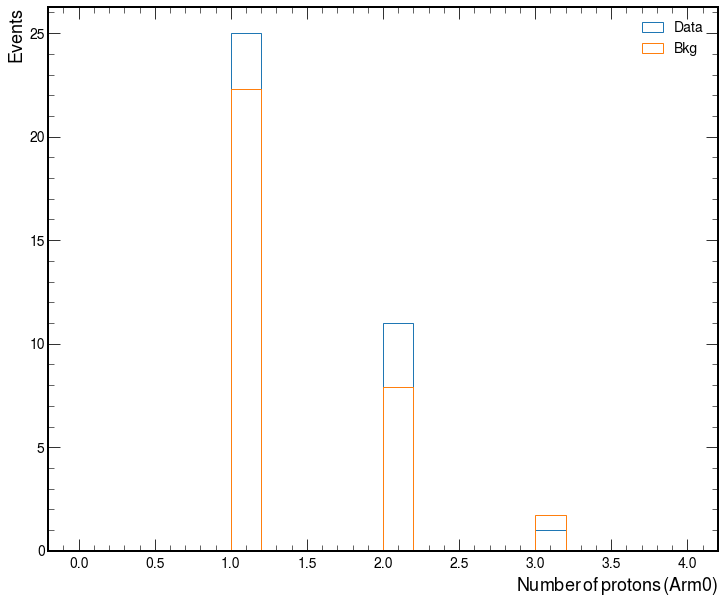

In [119]:
plot_var__ = 'nprotons_arm0'
df_data__ = df_protons_multiRP_data_events
df_bkg__ = df_protons_multiRP_bkg_events
range_ = (0., 4.) 
bins_ = 20
xlabel_ = r"$ \rm{Number \, of \, protons \, (Arm0)} $"
plot_data_bkg( plot_var=plot_var__, df_data=df_data__, df_bkg=df_bkg__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/nprotons_arm0_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/nprotons_arm0_muon_2018.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/nprotons_arm0_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/nprotons_arm0_muon_2018.png", bbox_inches='tight' )

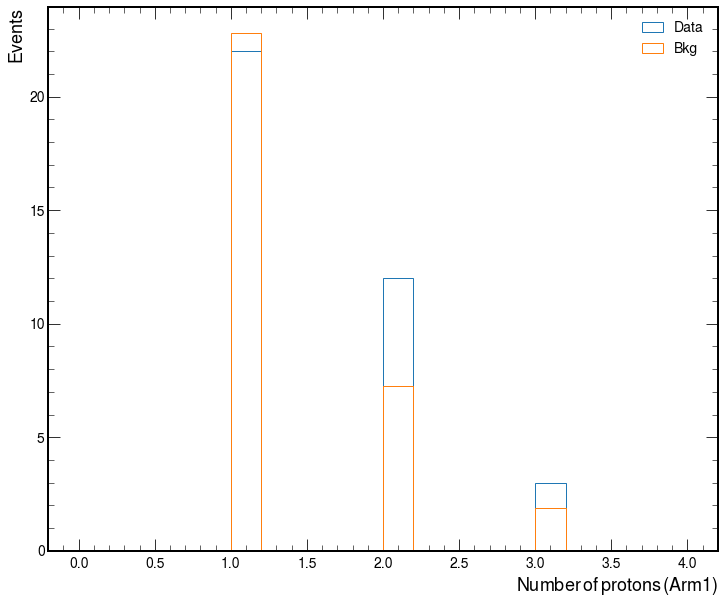

In [120]:
plot_var__ = 'nprotons_arm1'
df_data__ = df_protons_multiRP_data_events
df_bkg__ = df_protons_multiRP_bkg_events
range_ = (0., 4.) 
bins_ = 20
xlabel_ = r"$ \rm{Number \, of \, protons \, (Arm1)} $"
plot_data_bkg( plot_var=plot_var__, df_data=df_data__, df_bkg=df_bkg__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/nprotons_arm1_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/nprotons_arm1_muon_2018.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/nprotons_arm1_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/nprotons_arm1_muon_2018.png", bbox_inches='tight' )

In [121]:
# plot_var__ = 'xi_nom'
# df_data__ = df_protons_multiRP_data_index
# df_bkg__ = df_protons_multiRP_bkg_index
# range_ = (0., 0.2) 
# bins_ = 20
# xlabel_ = r"$ \xi $"
# plot_data_bkg( plot_var=plot_var__, df_data=df_data__, df_bkg=df_bkg__, bins=bins_, range=range_, xlabel=xlabel_ )

# if save_figures:
#     if lepton_type == "muon":
#         plt.savefig( "plots/xi_nom_muon_2018.pdf", bbox_inches='tight' )
#         plt.savefig( "plots/xi_nom_muon_2018.png", bbox_inches='tight' )
#     if lepton_type == "electron":
#         plt.savefig( "plots/xi_nom_muon_2018.pdf", bbox_inches='tight' )
#         plt.savefig( "plots/xi_nom_muon_2018.png", bbox_inches='tight' )

In [122]:
def plot_regions_data( df_protons_multiRP_data_events ):
    df__ = df_protons_multiRP_data_events
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_data_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_data_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    # msk_data_A =  msk_data_cut1 &  msk_data_cut2
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

    # n_events_data = df__.shape[0]
    # n_events_data_A = df__[ msk_data_A ].shape[0]
    n_events_data_B = df__[ msk_data_B ].shape[0]
    n_events_data_C = df__[ msk_data_C ].shape[0]
    n_events_data_D = df__[ msk_data_D ].shape[0]

    # print ( "Number of events: {} - Ratio: {}".format( n_events_data, ( n_events_data / ( n_events_bkg ) ) ) )
    # print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
    # print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
    # print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
    # print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )
    print ( "Number of events (B): {}".format( n_events_data_B ) )
    print ( "Number of events (C): {}".format( n_events_data_C ) )
    print ( "Number of events (D): {}".format( n_events_data_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    # label_str_ = "A (Data/Background: {:.2f})".format( ( n_events_data_A / ( n_events_bkg_A ) ) )
    # label_str_ = r"{}".format( label_str_ )
    # df__[ msk_data_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    # label_str_ = "B (Data/Background: {:.2f})".format( ( n_events_data_B / ( n_events_bkg_B ) ) )
    label_str_ = "B (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "C (Data/Background: {:.2f})".format( ( n_events_data_C / ( n_events_bkg_C ) ) )
    label_str_ = "C (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "D (Data/Background: {:.2f})".format( ( n_events_data_D / ( n_events_bkg_D ) ) )
    label_str_ = "D (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=16 )
    # leg_ = plt.legend( loc='best', fontsize=16 )
    # leg_.set_title( title_str_, prop={'size': 16} )
    # leg_._legend_box.align = "right"
    ax.text( 0.85, 0.75, "Data", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )
    
    return ( n_events_data_B, n_events_data_C, n_events_data_D )

Number of events (B): 1620
Number of events (C): 535
Number of events (D): 1649


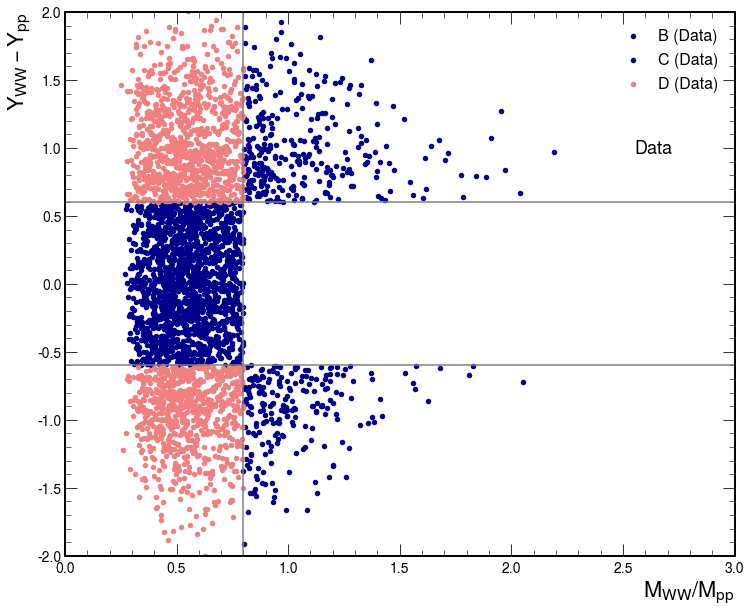

In [123]:
res_ = plot_regions_data( df_protons_multiRP_data_events_nTracks40 )
n_events_data_B_nTracks40 = res_[ 0 ]
n_events_data_C_nTracks40 = res_[ 1 ]
n_events_data_D_nTracks40 = res_[ 2 ]

Number of events (B): 13
Number of events (C): 2
Number of events (D): 14


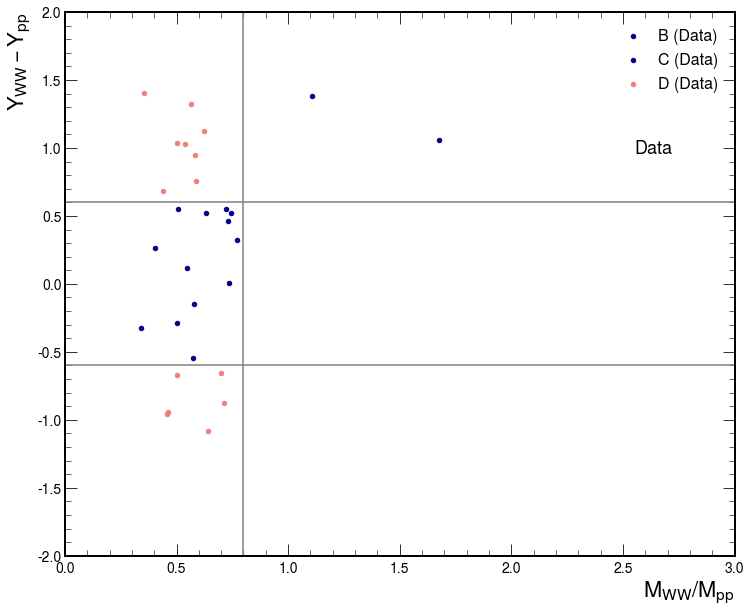

In [124]:
res_ = plot_regions_data( df_protons_multiRP_data_events )
n_events_data_B = res_[ 0 ]
n_events_data_C = res_[ 1 ]
n_events_data_D = res_[ 2 ]

In [125]:
ratio_ = ( n_events_data_B_nTracks40 / n_events_bkg_B_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_nTracks40 ) + ( err_n_events_bkg_B_nTracks40 / n_events_bkg_B_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_C_nTracks40 / n_events_bkg_C_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_C_nTracks40 ) + ( err_n_events_bkg_C_nTracks40 / n_events_bkg_C_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_D_nTracks40 / n_events_bkg_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_D_nTracks40 ) + ( err_n_events_bkg_D_nTracks40 / n_events_bkg_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9307777164920024 0.023339611458270966
1.0069261462019123 0.043969375868082756
0.9596582708692212 0.023858027462899487


In [126]:
n_events_data_B_D_nTracks40 = ( n_events_data_B_nTracks40 + n_events_data_D_nTracks40 )
# err_n_events_data_B_D_nTracks40 = np.sqrt( n_events_data_B_D_nTracks40 )
n_events_bkg_B_D_nTracks40 = ( n_events_bkg_B_nTracks40 + n_events_bkg_D_nTracks40 )
err_n_events_bkg_B_D_nTracks40 = np.sqrt( err_n_events_bkg_B_nTracks40 ** 2 + err_n_events_bkg_D_nTracks40 ** 2 )
ratio_ = ( n_events_data_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_D_nTracks40 ) + ( err_n_events_bkg_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9451254770440616 0.016685849647649974


GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.204642
1      0.186105
2      0.170656
3      0.157608
4      0.146465
         ...   
195    0.219163
196    0.220123
197    0.220944
198    0.221619
199    0.222141
Length: 200, dtype: float64 0.11655529821160979
0     -0.165303
1     -0.160063
2     -0.155645
3     -0.151867
4     -0.148594
         ...   
195   -0.134425
196   -0.132113
197   -0.129638
198   -0.126998
199   -0.124190
Length: 200, dtype: float64 -0.1103311372513745
Diff_YWW_YX
0      0.067768
1      0.066573
2      0.065454
3      0.064403
4      0.063416
         ...   
195    0.055560
196    0.055971
197    0.056396
198    0.056836
199    0.057291
Length: 200, dtype: float64 0.04761744454066867
0     -0.061526
1     -0.060654
2     -0.059836
3     -0.059069
4     -0.058348
         ...   
195   -0.048794
196   -0.049012
197   -0.049238
198   -0.049472
199   -0.049713
Length: 200, dtype: float64 -0.045739729938295656
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.301

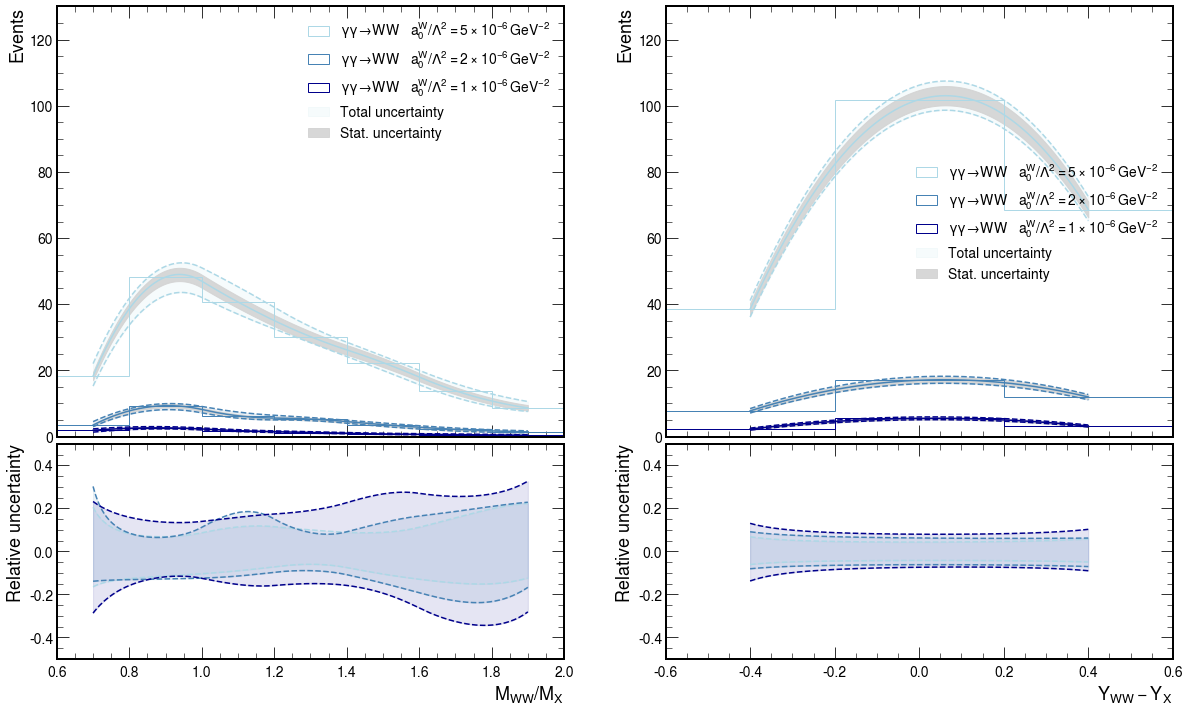

In [127]:
relative_uncertainty_ = True

# ylim_ = (0.,5.)
# ylim_ = (0.,3.)
# ylim_ = (0.,0.60)
ylim_ = (0.,130.)
ylim_ratio_ = (-0.50,0.50)

yscale_=None
# yscale_='log'

colors = [ "lightblue", "steelblue", "darkblue", "royalblue"  ]

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

class Obj2D:
    def __init__( self ):
        self.obj_ = [ [], [] ]
    def __getitem__( self, idx ):
        if isinstance( idx, tuple ): return self.obj_[ idx[0] ][ idx[1] ]
        else : return self.obj_[ idx ]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

def plot_signal( axes ):
    for idx_label_, label_ in enumerate( labels_signals[::-1] ):
        print ( label_ )
        color_ = colors[ idx_label_ ]

        spline_nom_ = {}
        spline_max_ = {}
        spline_min_ = {}
        spline_max_err_ = {}
        spline_min_err_ = {}
        spline_nom_arr_ = {}
        spline_max_arr_ = {}
        spline_min_arr_ = {}
        spline_max_err_arr_ = {}
        spline_min_err_arr_ = {}

        idx_row_ = 0
        idx_col_ = 0
        for var__ in vars_:
            print ( var__ )
            idx_row_ = 0
            counts_ = counts[ label_ ][ var__ ]
            err_ = err[ label_ ][ var__ ]
            bins_ = bins[ label_ ][ var__ ]
            __max_err__ = ( counts_ + err_ )
            __min_err__ = ( counts_ - err_ )
            __max__ = max_variations_total[ label_ ][ var__ ]
            __min__ = min_variations_total[ label_ ][ var__ ]

            bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

            axes[idx_row_,idx_col_].hist( bin_centers_, weights=counts_,
                                          histtype='step', color=color_, linestyle="-", label=labels_samples[ label_ ],
                                          bins=bins_ )

            spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
            spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
            spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
            spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
            spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
            x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
            spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
            spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
            spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
            spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
            spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

            axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
            __label_0 = None
            __label_1 = None
            if idx_label_ == 0:
                __label_0 = "Total uncertainty"
                __label_1 = "Stat. uncertainty"
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label=__label_0 )
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90, label=__label_1 )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ )
    #         axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            axes[idx_row_,idx_col_].get_xaxis().set_ticklabels( [] )
            axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
            if yscale_:
                axes[idx_row_,idx_col_].set_ylim( bottom=0.01 )
                axes[idx_row_,idx_col_].set_yscale( yscale_ )
            axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )

            idx_row_ = 1
            if relative_uncertainty_:
                ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_max_sel_ = pd.Series( ratio_max_ )
                ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                ratio_min_sel_ = pd.Series( ratio_min_ )
                ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                print ( ratio_max_sel_, ratio_max_sel_.mean() )
                print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
            else:
                diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
        #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
            axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            idx_col_ += 1

plot_signal( axes=axes )

if save_figures:
    if lepton_type == 'muon':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Muon_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electroElectron':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log-Electron_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-Electron_2018.png", bbox_inches='tight' )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.204642
1      0.186105
2      0.170656
3      0.157608
4      0.146465
         ...   
195    0.219163
196    0.220123
197    0.220944
198    0.221619
199    0.222141
Length: 200, dtype: float64 0.11655529821160979
0     -0.165303
1     -0.160063
2     -0.155645
3     -0.151867
4     -0.148594
         ...   
195   -0.134425
196   -0.132113
197   -0.129638
198   -0.126998
199   -0.124190
Length: 200, dtype: float64 -0.1103311372513745
Diff_YWW_YX
0      0.067768
1      0.066573
2      0.065454
3      0.064403
4      0.063416
         ...   
195    0.055560
196    0.055971
197    0.056396
198    0.056836
199    0.057291
Length: 200, dtype: float64 0.04761744454066867
0     -0.061526
1     -0.060654
2     -0.059836
3     -0.059069
4     -0.058348
         ...   
195   -0.048794
196   -0.049012
197   -0.049238
198   -0.049472
199   -0.049713
Length: 200, dtype: float64 -0.045739729938295656
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.301

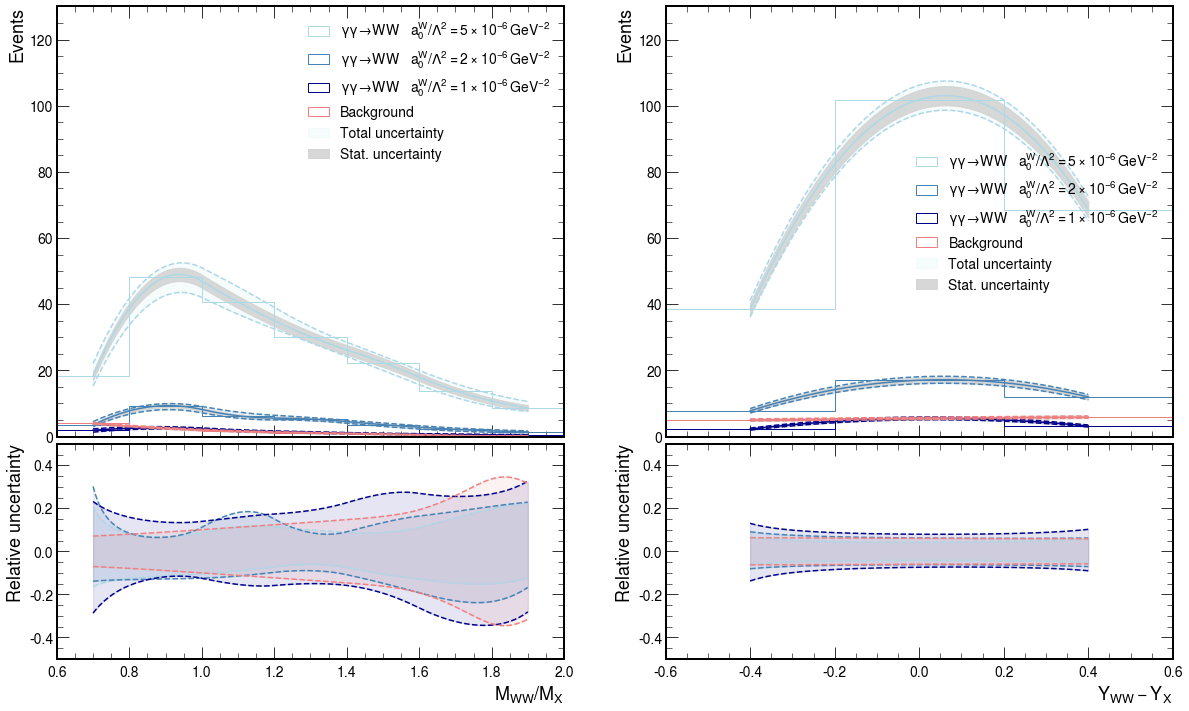

In [128]:
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

plot_signal( axes=axes )

color_ = 'lightcoral'

# counts__ = None
# err__ = None
# bins__ = None
# max_variations_total__ = None
# min_variations_total__ = None
spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_max_err_ = {}
spline_min_err_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}
spline_max_err_arr_ = {}
spline_min_err_arr_ = {}
idx_row_ = 0
idx_col_ = 0
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    if bkg_MC_mix_protons:
        arr_list__ = []
        weights_list__ = []
        for label_ in labels_bkg_plot:
            df__ = df_protons_multiRP_bkg_events[ label_ ][ "_nom" ]
        weights__ = ( df__[ "norm" ] )
        arr__ = df__[ var__ + "_nom" ]  
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        arr_list__.append(arr__)
        weights_list__.append(weights__)
        arr__ = pd.concat(arr_list__)
        weights__ = pd.concat(weights_list__)

    if not bkg_MC_mix_protons:
        df__ = df_protons_multiRP_bkg_events
        weights__ = ( df__[ "norm" ] )
        arr__ = df__[ var__ + "_nom" ]  
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        
#     df__ = df_protons_multiRP_bkg_events
#     weights__ = ( df__[ "norm" ] )
#     arr__ = df__[ var__ + "_nom" ]  
#     arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
#     msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
#     arr__ = arr__.loc[ msk__ ]
#     weights__ = weights__.loc[ msk__ ]

    sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ + np.sqrt( sum_w2_ ) ) 
    __min__ = ( sum_w_ - np.sqrt( sum_w2_ ) )
    
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
#     counts__[ var__ ] = sum_w_
#     err__[ var__ ] = np.sqrt( sum_w2_ )
#     bins__[ var__ ] = bins_
#     max_variations_total__[ var__ ] = __max__
#     min_variations_total__[ var__ ] = __min__

    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ], label="Background" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label="Background" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
#     axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
    axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )
    
    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
    idx_col_ += 1
    
if save_figures:
    if lepton_type == 'muon':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Muon_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Muon_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Muon_2018.png", bbox_inches='tight' )
    if lepton_type == 'electron':
        if yscale_:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log-Electron_2018.png", bbox_inches='tight' )
        else:
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Electron_2018.pdf", bbox_inches='tight' )
            plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-Electron_2018.png", bbox_inches='tight' )

In [129]:
# axes[0,0].set_xlim( 0.6, 2.0 )
# axes[1,0].set_xlim( 0.6, 2.0 )
# axes[0,1].set_xlim( -1., 1. )
# axes[1,1].set_xlim( -1., 1. )
# axes[0,1].set_xlim( -0.60, 0.60 )
# axes[1,1].set_xlim( -0.60, 0.60 )
# axes[0,0].set_ylim( 0., 5. )
# axes[0,0].set_ylim( 0., 9. )
# axes[0,1].set_ylim( 0., 5. )
# axes[0,1].set_ylim( 0., 8. )
# axes[0,1].set_ylim( 0., 9. )
# axes[0,0].set_ylim( 0., 1. )
# axes[0,1].set_ylim( 0., 1. )
# axes[0,0].set_yscale( 'log' )
# axes[0,1].set_yscale( 'log' )
# axes[0,0].set_ylim( 0.01, 5. )
# # axes[0,1].set_ylim( 0.01, 5. )
# axes[0,1].set_ylim( 0.01, 8. )
# fig

In [130]:
# if save_figures:
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [131]:
# var_name_lepton_id_up_ = ""
# var_name_lepton_id_dw_ = ""
# if lepton_type == 'muon':
#     var_name_lepton_id_up_ = "syst_up_sf_muon_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_muon_id"
# elif lepton_type == 'electron':
#     var_name_lepton_id_up_ = "syst_up_sf_electron_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_electron_id"
var_name_lepton_id_ = ""
if lepton_type == 'muon':
    var_name_lepton_id_ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name_lepton_id_ = "sf_electron_id"
var_name_trigger_ = ""
if lepton_type == 'muon':
    var_name_trigger_ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name_trigger_ = "sf_electron_trigger"

uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]

for label__ in labels_signals:
    for unc__ in uncertainties_:
        label_unc__ = "syst_up_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] < 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )
        label_unc__ = "syst_dw_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] > 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )

    var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
    var_name_trigger_up__ = "syst_up_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                          )
    var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
    var_name_trigger_dw__ = "syst_dw_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                          )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.0045424417834141195, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982549532, 'syst_up_sf_prefiring': 0.008276021563517588, 'syst_dw_sf_prefiring': -0.008276021563514036, 'syst_up_proton_scale_arm0': 0.5524806668407738, 'syst_dw_proton_scale_arm0': -0.41980147232485, 'syst_up_proton_scale_arm1': 0.5548163507877959, 'syst_dw_proton_scale_arm1': -0.30656302440018024, 'syst_up_proton_scale': 0.7829789718340542, 'syst_dw_proton_scale': -0.5198212809182569, 'syst_up_proton_eff': 0.1278148397691865, 'syst_dw_proton_eff': -0.12781483976918295, 'syst_up_total': 0.7955911052309327, 'syst_dw_total': -0.5356520834101336}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.189141043977216, 'stat': 1.0182

In [132]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  GGToWW-AQGC-2018-muon-A0W2e-6  GGToWW-AQGC-2018-muon-A0W5e-6
central                                         8.413096                      32.189141                     186.457560
stat                                            0.460034                       1.018244                       3.909463
syst_up_jes                                     0.056570                       0.129187                       1.351495
syst_dw_jes                                     0.000000                      -0.424603                      -1.340716
syst_up_jer                                     0.000000                       0.127697                       0.080509
syst_dw_jer                                     0.000000                      -0.031197                      -0.384791
syst_up_sf_muon_id                              0.004542                       0.016065                       0.088729
syst_dw_sf_muon_id                             -0.004542                      -0.016065                      -0.088729
syst_up_sf_muon_trigger                         0.016829                       0.064919                       0.371412
syst_dw_sf_muon_trigger                        -0.016829                      -0.064919                      -0.371412
syst_up_sf_prefiring                            0.008276                       0.017140                       0.140344
syst_dw_sf_prefiring                           -0.008276                      -0.017139                      -0.140344
syst_up_proton_scale_arm0                       0.552481                       0.520775                       3.713578
syst_dw_proton_scale_arm0                      -0.419801                      -0.860629                      -4.310801
syst_up_proton_scale_arm1                       0.554816                       0.632636                       4.771700
syst_dw_proton_scale_arm1                      -0.306563                      -1.163016                      -3.737504
syst_up_proton_scale                            0.782979                       0.819411                       6.046469
syst_dw_proton_scale                           -0.519821                      -1.446820                      -5.705431
syst_up_proton_eff                              0.127815                       0.429707                       2.456095
syst_dw_proton_eff                             -0.127815                      -0.429707                      -2.456095
syst_up_total                                   0.795591                       0.945434                       6.677628
syst_dw_total                                  -0.535652                      -1.569702                      -6.379299

In [133]:
# df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100.

In [134]:
symmetrize_uncertainties = True
if symmetrize_uncertainties:
#     var_name_lepton_id_ = ""
#     if lepton_type == 'muon':
#         var_name_lepton_id_ = "sf_muon_id"
#     elif lepton_type == 'electron':
#         var_name_lepton_id_ = "sf_electron_id"

    uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]
    
    for label__ in labels_signals:
        for unc__ in uncertainties_:
            label_unc_up__ = "syst_up_{}".format( unc__ )
            label_unc_dw__ = "syst_dw_{}".format( unc__ )
            unc_max__ = np.max( [ np.abs( sum_weights[ label__ ][ label_unc_up__ ] ) , np.abs( sum_weights[ label__ ][ label_unc_dw__ ] ) ] )
            sum_weights[ label__ ][ label_unc_up__ ] =  unc_max__
            sum_weights[ label__ ][ label_unc_dw__ ] = -unc_max__

        var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                              )
        var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                              )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 8.413095623310177, 'stat': 0.46003389395384037, 'syst_up_jes': 0.056569833145800885, 'syst_dw_jes': -0.056569833145800885, 'syst_up_jer': 0.0, 'syst_dw_jer': -0.0, 'syst_up_sf_muon_id': 0.004542441783417672, 'syst_dw_sf_muon_id': -0.004542441783417672, 'syst_up_sf_muon_trigger': 0.016829461982553084, 'syst_dw_sf_muon_trigger': -0.016829461982553084, 'syst_up_sf_prefiring': 0.008276021563517588, 'syst_dw_sf_prefiring': -0.008276021563517588, 'syst_up_proton_scale_arm0': 0.5524806668407738, 'syst_dw_proton_scale_arm0': -0.41980147232485, 'syst_up_proton_scale_arm1': 0.5548163507877959, 'syst_dw_proton_scale_arm1': -0.30656302440018024, 'syst_up_proton_scale': 0.7829789718340542, 'syst_dw_proton_scale': -0.7829789718340542, 'syst_up_proton_eff': 0.1278148397691865, 'syst_dw_proton_eff': -0.1278148397691865, 'syst_up_total': 0.7955911052309327, 'syst_dw_total': -0.7955911052309327}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 32.18914104397721

In [135]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  GGToWW-AQGC-2018-muon-A0W2e-6  GGToWW-AQGC-2018-muon-A0W5e-6
central                                         8.413096                      32.189141                     186.457560
stat                                            0.460034                       1.018244                       3.909463
syst_up_jes                                     0.056570                       0.424603                       1.351495
syst_dw_jes                                    -0.056570                      -0.424603                      -1.351495
syst_up_jer                                     0.000000                       0.127697                       0.384791
syst_dw_jer                                    -0.000000                      -0.127697                      -0.384791
syst_up_sf_muon_id                              0.004542                       0.016065                       0.088729
syst_dw_sf_muon_id                             -0.004542                      -0.016065                      -0.088729
syst_up_sf_muon_trigger                         0.016829                       0.064919                       0.371412
syst_dw_sf_muon_trigger                        -0.016829                      -0.064919                      -0.371412
syst_up_sf_prefiring                            0.008276                       0.017140                       0.140344
syst_dw_sf_prefiring                           -0.008276                      -0.017140                      -0.140344
syst_up_proton_scale_arm0                       0.552481                       0.520775                       3.713578
syst_dw_proton_scale_arm0                      -0.419801                      -0.860629                      -4.310801
syst_up_proton_scale_arm1                       0.554816                       0.632636                       4.771700
syst_dw_proton_scale_arm1                      -0.306563                      -1.163016                      -3.737504
syst_up_proton_scale                            0.782979                       1.446820                       6.046469
syst_dw_proton_scale                           -0.782979                      -1.446820                      -6.046469
syst_up_proton_eff                              0.127815                       0.429707                       2.456095
syst_dw_proton_eff                             -0.127815                      -0.429707                      -2.456095
syst_up_total                                   0.795591                       1.574578                       6.688221
syst_dw_total                                  -0.795591                      -1.574578                      -6.688221

In [136]:
if bkg_MC_mix_protons:
    weights_list__ = []
    for label_ in labels_bkg_plot:
        df__ = df_protons_multiRP_bkg_events[ label_ ][ "_nom" ]
    weights__ = ( df__[ "norm" ] )
    weights_list__.append(weights__)
    weights__ = pd.concat(weights_list__)
    
if not bkg_MC_mix_protons:
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df__[ "norm" ] )
        
# df__ = df_protons_multiRP_bkg_events
# weights__ = ( df__[ "norm" ] )
weights_squared__ = ( weights__ ** 2 )
arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
# msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 1.00 ) & ( arr_R_MWW_MX__ >= 0.40 ) )
sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )

6.959999999999999 ± 0.37309516212355265


In [137]:
df_sum_weights__[ "Background" ] = -1.
df_sum_weights__[ "Background" ][ "central" ] = sum_weights_cut__
df_sum_weights__[ "Background" ][ "stat" ] = np.sqrt( sum_weights_squared_cut__ )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  GGToWW-AQGC-2018-muon-A0W2e-6  GGToWW-AQGC-2018-muon-A0W5e-6  Background
central                                         8.413096                      32.189141                     186.457560    6.960000
stat                                            0.460034                       1.018244                       3.909463    0.373095
syst_up_jes                                     0.056570                       0.424603                       1.351495   -1.000000
syst_dw_jes                                    -0.056570                      -0.424603                      -1.351495   -1.000000
syst_up_jer                                     0.000000                       0.127697                       0.384791   -1.000000
syst_dw_jer                                    -0.000000                      -0.127697                      -0.384791   -1.000000
syst_up_sf_muon_id                              0.004542                       0.016065                       0.088729   -1.000000
syst_dw_sf_muon_id                             -0.004542                      -0.016065                      -0.088729   -1.000000
syst_up_sf_muon_trigger                         0.016829                       0.064919                       0.371412   -1.000000
syst_dw_sf_muon_trigger                        -0.016829                      -0.064919                      -0.371412   -1.000000
syst_up_sf_prefiring                            0.008276                       0.017140                       0.140344   -1.000000
syst_dw_sf_prefiring                           -0.008276                      -0.017140                      -0.140344   -1.000000
syst_up_proton_scale_arm0                       0.552481                       0.520775                       3.713578   -1.000000
syst_dw_proton_scale_arm0                      -0.419801                      -0.860629                      -4.310801   -1.000000
syst_up_proton_scale_arm1                       0.554816                       0.632636                       4.771700   -1.000000
syst_dw_proton_scale_arm1                      -0.306563                      -1.163016                      -3.737504   -1.000000
syst_up_proton_scale                            0.782979                       1.446820                       6.046469   -1.000000
syst_dw_proton_scale                           -0.782979                      -1.446820                      -6.046469   -1.000000
syst_up_proton_eff                              0.127815                       0.429707                       2.456095   -1.000000
syst_dw_proton_eff                             -0.127815                      -0.429707                      -2.456095   -1.000000
syst_up_total                                   0.795591                       1.574578                       6.688221   -1.000000
syst_dw_total                                  -0.795591                      -1.574578                      -6.688221   -1.000000

In [138]:
df_sum_weights__.iloc[ 1:, : ].where( ~( df_sum_weights__.iloc[ 1:, : ] != -1. ) , df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100. )

GGToWW-AQGC-2018-muon-A0W1e-6  GGToWW-AQGC-2018-muon-A0W2e-6  GGToWW-AQGC-2018-muon-A0W5e-6  Background
stat                                            5.468069                       3.163314                       2.096704    5.360563
syst_up_jes                                     0.672402                       1.319087                       0.724827   -1.000000
syst_dw_jes                                    -0.672402                      -1.319087                      -0.724827   -1.000000
syst_up_jer                                     0.000000                       0.396709                       0.206369   -1.000000
syst_dw_jer                                    -0.000000                      -0.396709                      -0.206369   -1.000000
syst_up_sf_muon_id                              0.053993                       0.049908                       0.047587   -1.000000
syst_dw_sf_muon_id                             -0.053993                      -0.049908                      -0.047587   -1.000000
syst_up_sf_muon_trigger                         0.200039                       0.201681                       0.199194   -1.000000
syst_dw_sf_muon_trigger                        -0.200039                      -0.201681                      -0.199194   -1.000000
syst_up_sf_prefiring                            0.098371                       0.053246                       0.075269   -1.000000
syst_dw_sf_prefiring                           -0.098371                      -0.053246                      -0.075269   -1.000000
syst_up_proton_scale_arm0                       6.566913                       1.617859                       1.991648   -1.000000
syst_dw_proton_scale_arm0                      -4.989857                      -2.673664                      -2.311948   -1.000000
syst_up_proton_scale_arm1                       6.594675                       1.965370                       2.559135   -1.000000
syst_dw_proton_scale_arm1                      -3.643879                      -3.613068                      -2.004480   -1.000000
syst_up_proton_scale                            9.306669                       4.494746                       3.242812   -1.000000
syst_dw_proton_scale                           -9.306669                      -4.494746                      -3.242812   -1.000000
syst_up_proton_eff                              1.519237                       1.334944                       1.317241   -1.000000
syst_dw_proton_eff                             -1.519237                      -1.334944                      -1.317241   -1.000000
syst_up_total                                   9.456580                       4.891644                       3.586994   -1.000000
syst_dw_total                                  -9.456580                      -4.891644                      -3.586994   -1.000000

In [139]:
save_table_systematics = True

if save_table_systematics:
    file_path_ = ""
    file_str_ = "table_systematics"
    if norm_to_1fb:
        file_str_ += "-norm_to_1fb"
    if data_sample == '2017':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2017-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2017-electron" + ".h5"
    elif data_sample == '2018':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2018-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2018-electron" + ".h5"

    with pd.HDFStore( file_path_, 'w' ) as store_:
        store_[ "table_systematics" ] = df_sum_weights__

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 532, in H5Fcreate
    unable to create file
  File "H5VLcallback.c", line 3282, in H5VL_file_create
    file create failed
  File "H5VLcallback.c", line 3248, in H5VL__file_create
    file create failed
  File "H5VLnative_file.c", line 63, in H5VL__native_file_create
    unable to create file
  File "H5Fint.c", line 1898, in H5F_open
    unable to lock the file
  File "H5FD.c", line 1625, in H5FD_lock
    driver lock request failed
  File "H5FDsec2.c", line 1002, in H5FD__sec2_lock
    unable to lock file, errno = 11, error message = 'Resource temporarily unavailable'

End of HDF5 error back trace

Unable to open/create file 'table_systematics-2018-muon.h5'

In [ ]:
if save_table_systematics:
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )

In [ ]:
# arrays = [
#     ["bar","bar","foo","foo","baz","baz"],
#     ["one","one","two","two","one","one"]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 6*2 ).reshape( 6, 2 ), index=index, columns=['A','B'] )
# df_groupby = df.groupby( ["first","second"] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# df_groupby_apply_ = df_groupby.apply( lambda df__: ( df__['A'].iloc[0] * df__['B'].iloc[1] ) )
# print ( df_groupby_apply_ )
# df_nonduplicated = df[ ~df.index.duplicated(keep='first') ]
# df_nonduplicated.loc[ :, 'C' ] = df_groupby_apply_
# df_nonduplicated

In [ ]:
# arrays = [
#     [ "bar", "bar", "bar", "foo", "foo", "foo", "baz" ],
#     [ "one", "two", "two", "one", "one", "two", "one" ]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 7*2 ).reshape( 7, 2 ), index=index, columns=['A','B'] )
# df = df.reset_index().set_index( ["first"] )
# print ( df )
# df_groupby = df.groupby( [ "first", "second" ] )
# # df_groupby = df.groupby( [ "first" ] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# # df_groupby_A_min = df_groupby[ "A" ].min()
# # print ( df_groupby_A_min )
# # df_groupby_A_max = df_groupby[ "A" ].max()
# # print ( df_groupby_A_max )
# # df_groupby_A_min.loc[ ("foo", "two") ]
# msk__ = df_groupby[ 'A' ].transform( lambda s__: ( s__ == s__.min() ) )
# print ( msk__ )
# df[ msk__ ]

In [ ]:
# help( df_groupby.transform )

In [ ]:
# from scipy.interpolate import make_interp_spline
# np.info( make_interp_spline )

In [ ]:
# import mpl_toolkits.axes_grid1
# dir( mpl_toolkits.axes_grid1 )
# fig_ = plt.figure()
# divider_ = mpl_toolkits.axes_grid1.make_axes_locatable( plt.gca() )
# divider_
# help( mpl_toolkits.axes_grid1.axes_divider.AxesDivider )